In [4]:
# import necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from scipy.stats import probplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [5]:
# Load the Dataset:
# display

df = pd.read_csv('data2.csv')
df

GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M  39.0        2               1        1              2   
1        M  44.0        1               2        1              2   
2        F  59.0        1               1        1              2   
3        M  46.0        1               2        2              1   
4        F  63.0        1               2        1              1   
..     ...   ...      ...             ...      ...            ...   
304      F  56.0        1               1        1              2   
305      M  77.0        2               2        2              1   
306      M  78.0        1               2        1              2   
307      M  79.0        2               1        1              1   
308      M   NaN        2               2        2              1   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                  1        2        2       2.0                  2         1   
1                  2        2        1       2.0                  1         1   
2                  1        2        1       2.0                  1         2   
3                  1        1        1       1.0                  1         1   
4                  1        1        1       2.0                  1         2   
..               ...      ...      ...       ...                ...       ...   
304                2        2        1       1.0                  2         2   
305                2        1        2       NaN                  1         1   
306                2        2        1       NaN                  1         1   
307                2        2        2       NaN                  2         2   
308                1        1        1       1.0                  2         1   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                      2                      1           2         YES  
1                      2                      2           2         YES  
2                      2                      1           2          NO  
3                      1                      2           2          NO  
4                      2                      1           1          NO  
..                   ...                    ...         ...         ...  
304                    2                      2           1         YES  
305                    1                      2           2         YES  
306                    2                      2           2         YES  
307                    2                      2           2         YES  
308                    1                      2           2          NO  

[309 rows x 16 columns]

## 2 = YES  &  1 = NO 


In [6]:
# Information about data types and missing values

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 309 non-null    object 
 1   AGE                    308 non-null    float64
 2   SMOKING                309 non-null    int64  
 3   YELLOW_FINGERS         309 non-null    int64  
 4   ANXIETY                309 non-null    int64  
 5   PEER_PRESSURE          309 non-null    int64  
 6   CHRONIC DISEASE        309 non-null    int64  
 7   FATIGUE                309 non-null    int64  
 8   ALLERGY                309 non-null    int64  
 9   WHEEZING               299 non-null    float64
 10  ALCOHOL CONSUMING      309 non-null    int64  
 11  COUGHING               309 non-null    int64  
 12  SHORTNESS OF BREATH    309 non-null    int64  
 13  SWALLOWING DIFFICULTY  309 non-null    int64  
 14  CHEST PAIN             309 non-null    int64  
 15  LUNG_C

(309, 16)

In [7]:
# Summary statistics

df.describe()

AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  308.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.672078    1.563107        1.569579    1.498382       1.501618   
std      8.223641    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE     FATIGUE     ALLERGY    WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  299.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.548495           1.556634   
std           0.500787    0.469827    0.497588    0.498477           0.497588   
min           1.000000    1.000000    1.000000    1.000000           1.000000   
25%           1.000000    1.000000    1.000000    1.000000           1.000000   
50%           2.000000    2.000000    2.000000    2.000000           2.000000   
75%           2.000000    2.000000    2.000000    2.000000           2.000000   
max           2.000000    2.000000    2.000000    2.000000           2.000000   

         COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
count  309.000000           309.000000             309.000000  309.000000  
mean     1.579288             1.640777               1.469256    1.556634  
std      0.494474             0.480551               0.499863    0.497588  
min      1.000000             1.000000               1.000000    1.000000  
25%      1.000000             1.000000               1.000000    1.000000  
50%      2.000000             2.000000               1.000000    2.000000  
75%      2.000000             2.000000               2.000000    2.000000  
max      2.000000             2.000000               2.000000    2.000000

In [8]:
# Droping Duplicate rows df

duplicate_rows = df[df.duplicated()]
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

df = df.drop_duplicates()
print("\nDataFrame after dropping duplicates:")
print(df)

Duplicate Rows except first occurrence:
    GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
17       M  51.0        1               2        1              1   
51       M  56.0        2               1        1              1   
70       M  58.0        2               1        1              1   
77       M  58.0        2               1        1              1   
84       M  58.0        2               2        2              2   
85       M  58.0        2               1        1              1   
113      M  60.0        2               1        1              1   
117      F  51.0        2               2        2              2   
148      M  62.0        2               1        2              1   
149      M  62.0        1               1        1              2   
163      M  63.0        2               2        2              1   
168      M  63.0        1               2        1              1   
188      M  64.0        2               2        2             

In [9]:
# Label Encode
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

df

C:\Users\pubgp\AppData\Local\Temp\ipykernel_26564\1431819822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENDER']=le.fit_transform(df['GENDER'])
C:\Users\pubgp\AppData\Local\Temp\ipykernel_26564\1431819822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])


GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1  39.0        2               1        1              2   
1         1  44.0        1               2        1              2   
2         0  59.0        1               1        1              2   
3         1  46.0        1               2        2              1   
4         0  63.0        1               2        1              1   
..      ...   ...      ...             ...      ...            ...   
303       1  77.0        1               2        1              2   
305       1  77.0        2               2        2              1   
306       1  78.0        1               2        1              2   
307       1  79.0        2               1        1              1   
308       1   NaN        2               2        2              1   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                  1        2        2       2.0                  2         1   
1                  2        2        1       2.0                  1         1   
2                  1        2        1       2.0                  1         2   
3                  1        1        1       1.0                  1         1   
4                  1        1        1       2.0                  1         2   
..               ...      ...      ...       ...                ...       ...   
303                1        2        2       NaN                  2         2   
305                2        1        2       NaN                  1         1   
306                2        2        1       NaN                  1         1   
307                2        2        2       NaN                  2         2   
308                1        1        1       1.0                  2         1   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                      2                      1           2            1  
1                      2                      2           2            1  
2                      2                      1           2            0  
3                      1                      2           2            0  
4                      2                      1           1            0  
..                   ...                    ...         ...          ...  
303                    1                      1           1            1  
305                    1                      2           2            1  
306                    2                      2           2            1  
307                    2                      2           2            1  
308                    1                      2           2            0  

[276 rows x 16 columns]

## Basic graphs for insight -

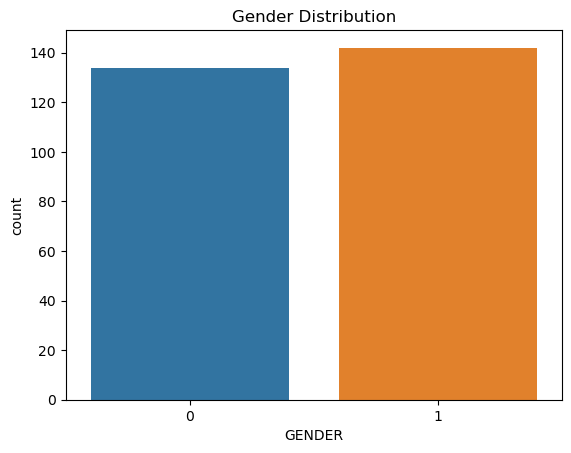

1    142
0    134
Name: GENDER, dtype: int64

In [7]:
# Count plot for Gender

sns.countplot(x='GENDER', data=df)
plt.title('Gender Distribution')
plt.show()
df.GENDER.value_counts()

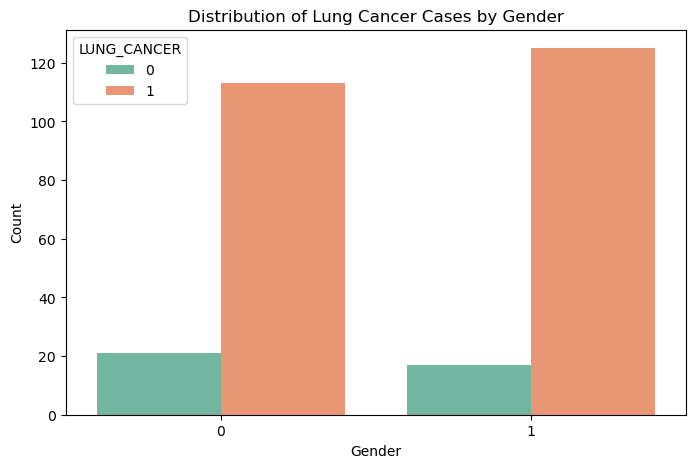

In [8]:
# Which Gender has More lung Cancer?

plt.figure(figsize=(8, 5))
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df, palette='Set2')
plt.title('Distribution of Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

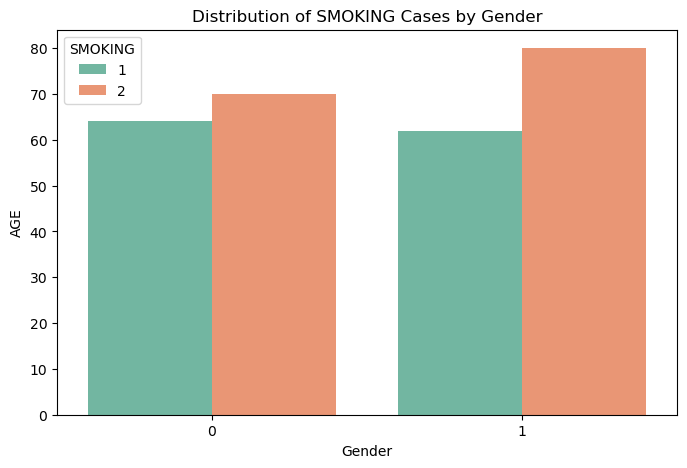

In [9]:
# Which Gender smokes more?

plt.figure(figsize=(8, 5))
sns.countplot(x='GENDER', hue='SMOKING', data=df, palette='Set2')
plt.title('Distribution of SMOKING Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('AGE')
plt.show()

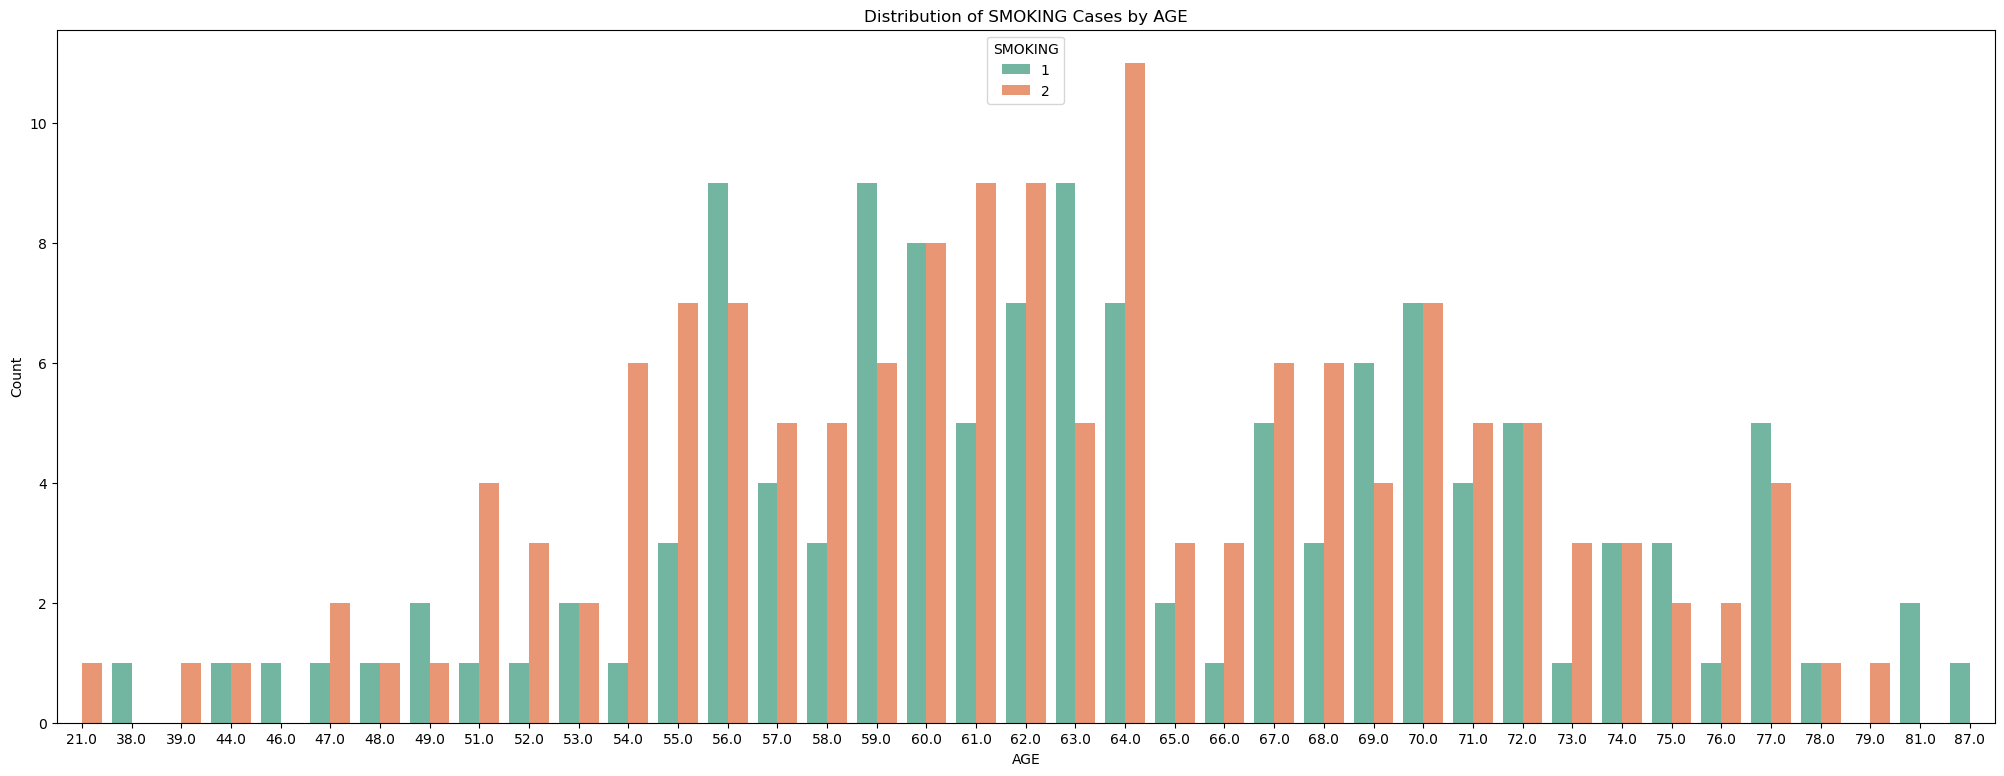

In [10]:
# Which Gender has More lung Cancer?

plt.figure(figsize=(25, 9))
sns.countplot(x='AGE', hue='SMOKING', data=df, palette='Set2')
plt.title('Distribution of SMOKING Cases by AGE')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.show()

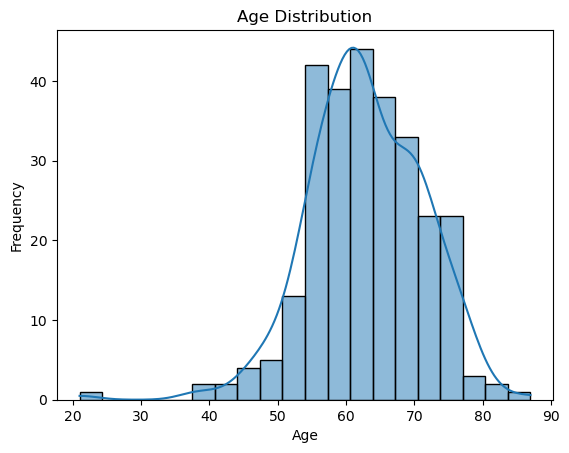

64.0    18
62.0    16
56.0    16
60.0    16
59.0    15
63.0    14
70.0    14
61.0    14
67.0    11
69.0    10
72.0    10
55.0    10
71.0     9
77.0     9
57.0     9
68.0     9
58.0     8
54.0     7
74.0     6
65.0     5
75.0     5
51.0     5
53.0     4
73.0     4
66.0     4
52.0     4
76.0     3
49.0     3
47.0     3
78.0     2
48.0     2
44.0     2
81.0     2
87.0     1
38.0     1
39.0     1
21.0     1
46.0     1
79.0     1
Name: AGE, dtype: int64

In [11]:
# Histogram for Age
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
df.AGE.value_counts()

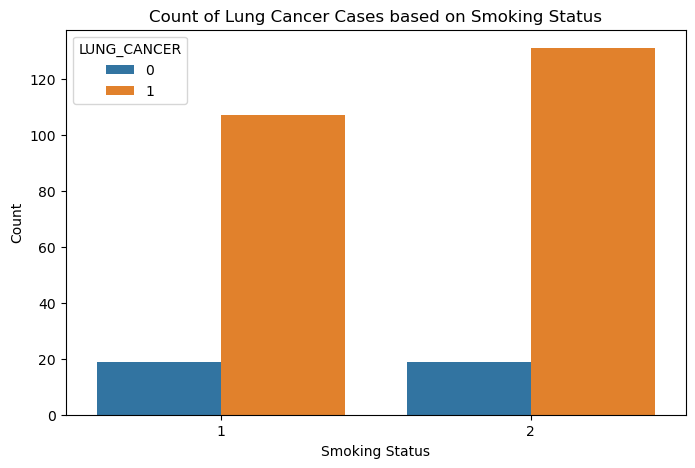

In [12]:
# Countplot for smoking
plt.figure(figsize=(8, 5))
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df)
plt.title('Count of Lung Cancer Cases based on Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

## Univariate Analysis

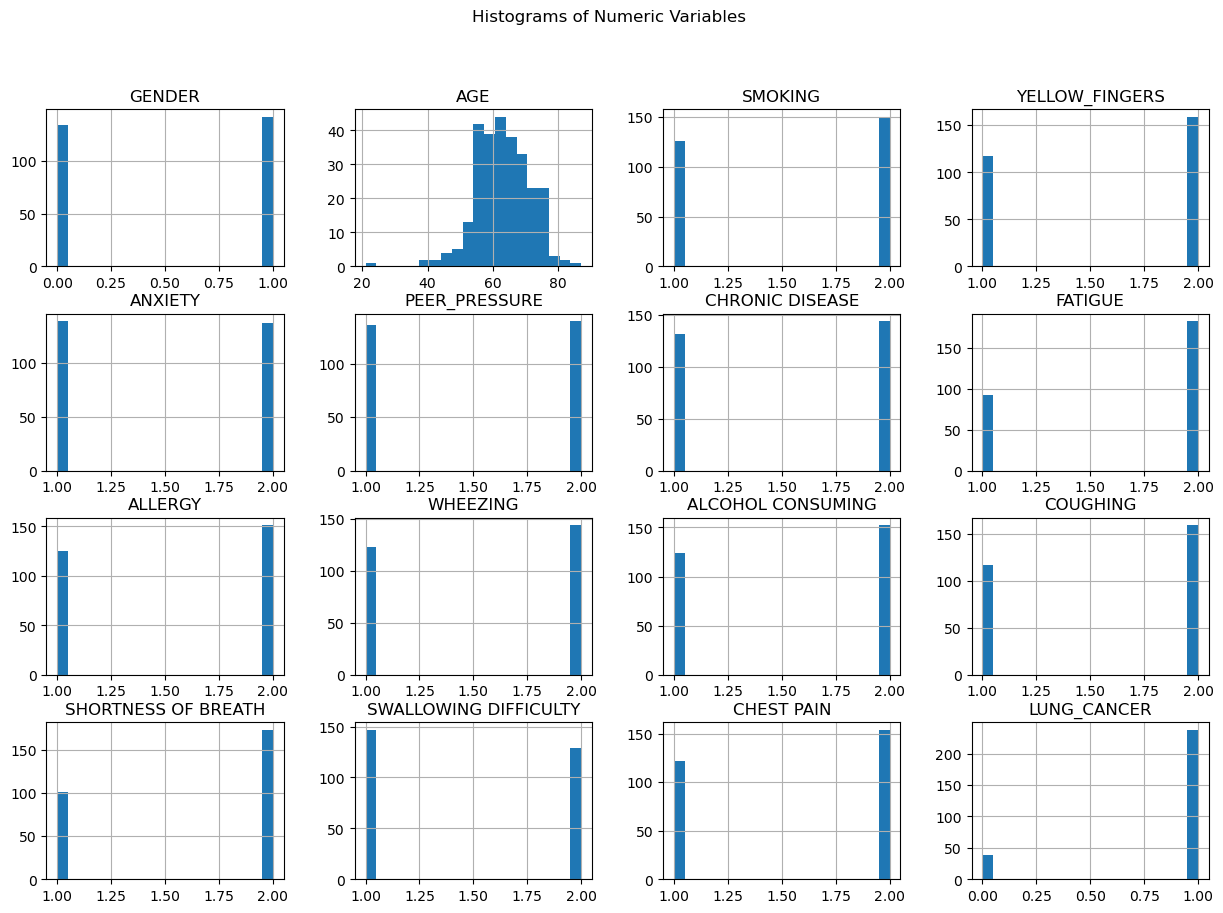

In [13]:
numeric_variables = df.select_dtypes(include='number').columns
df[numeric_variables].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Variables")
plt.show()

# Visualize counts for categorical variables
categorical_variables = df.select_dtypes(include='object').columns
for column in categorical_variables:
    plt.figure(figsize=(8, 5))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Count of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

# Bivariate Analysis

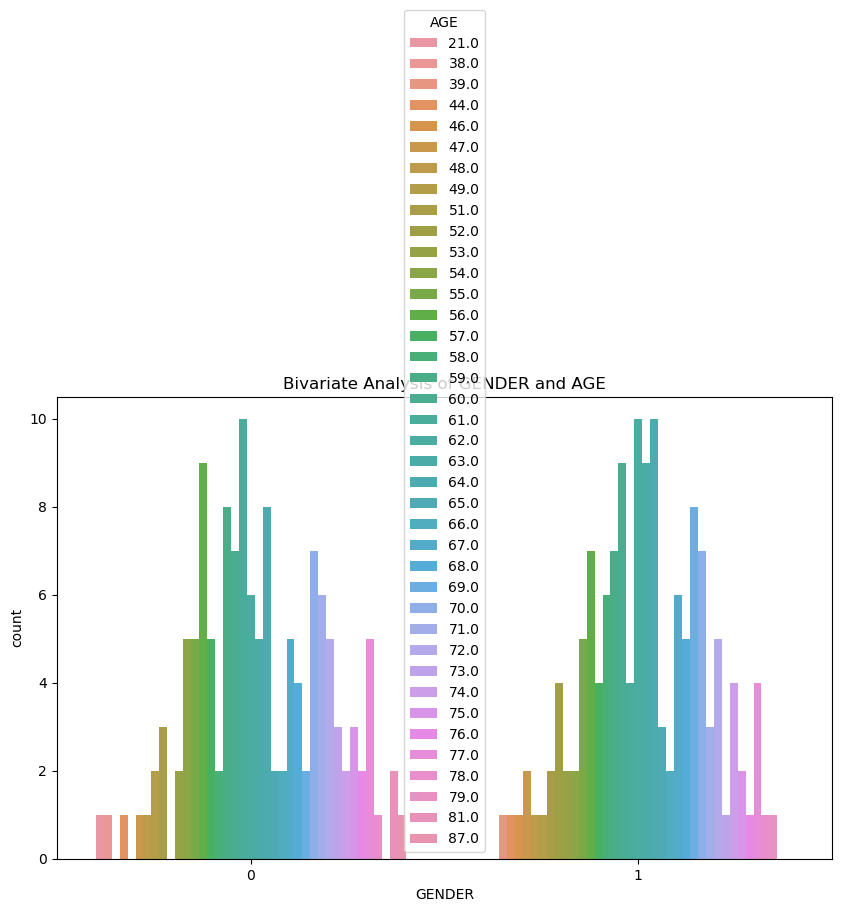

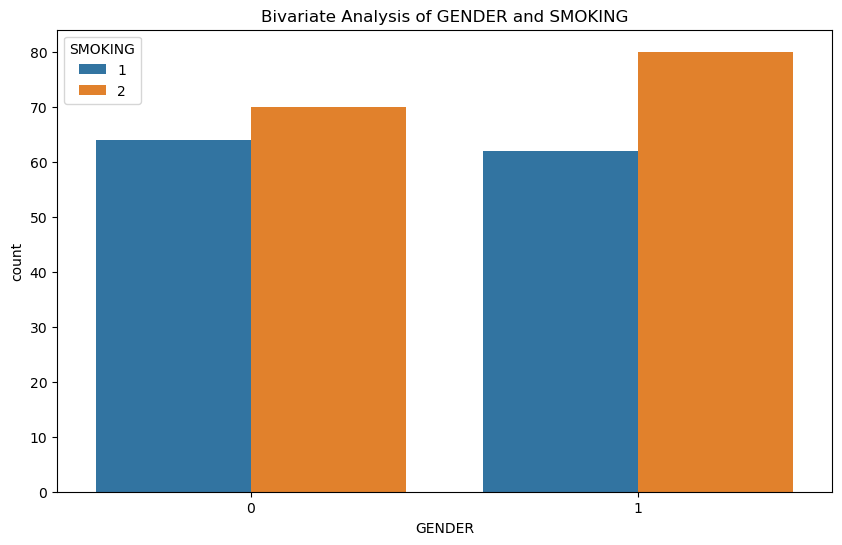

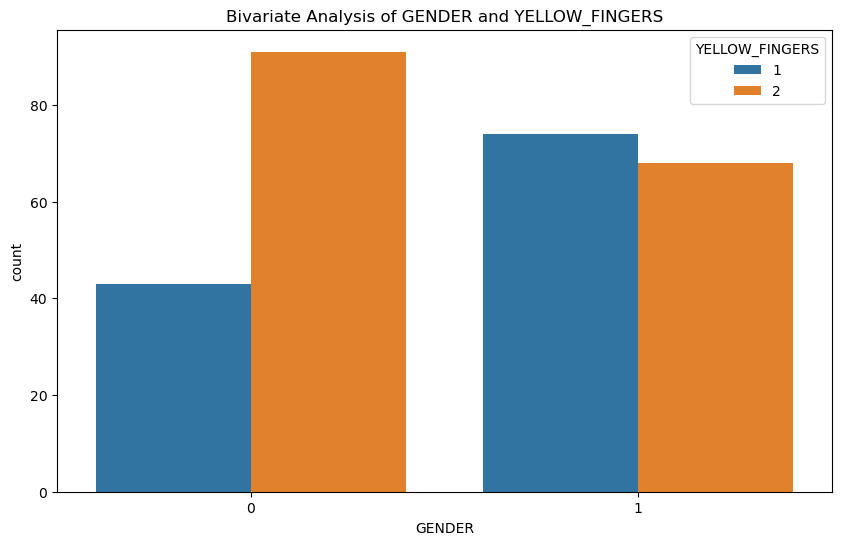

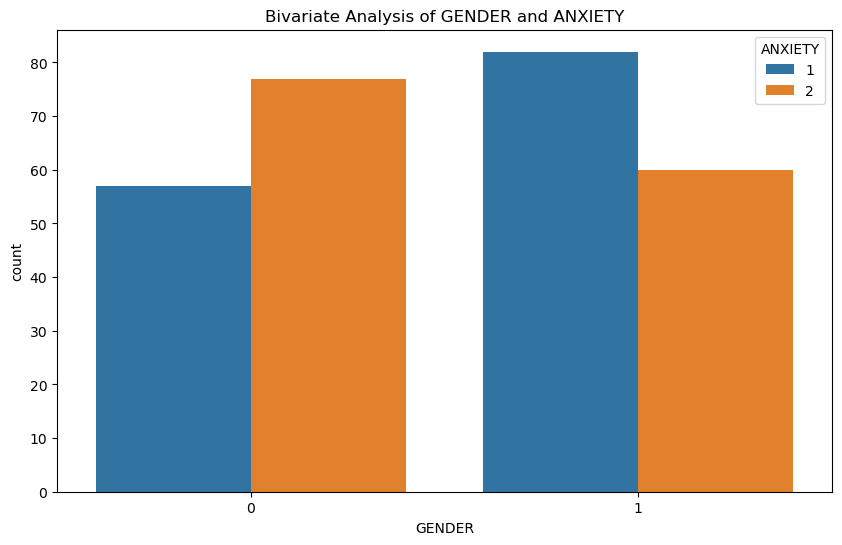

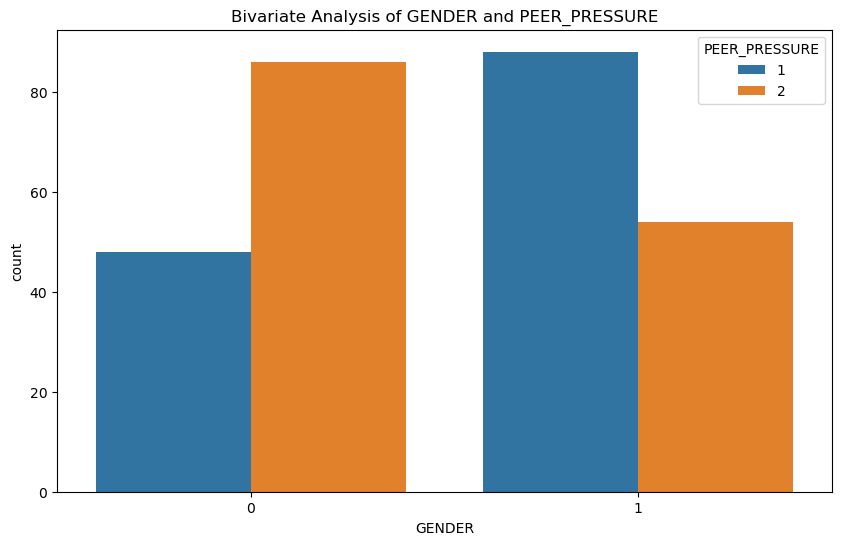

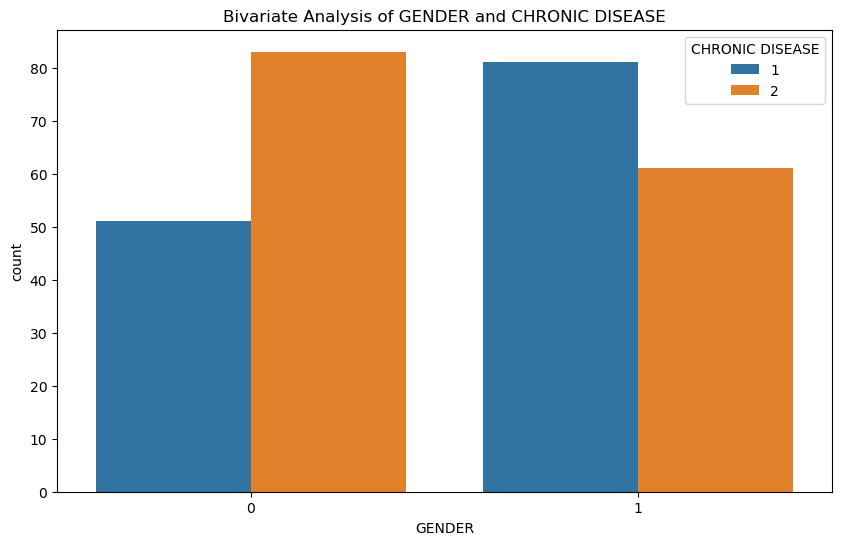

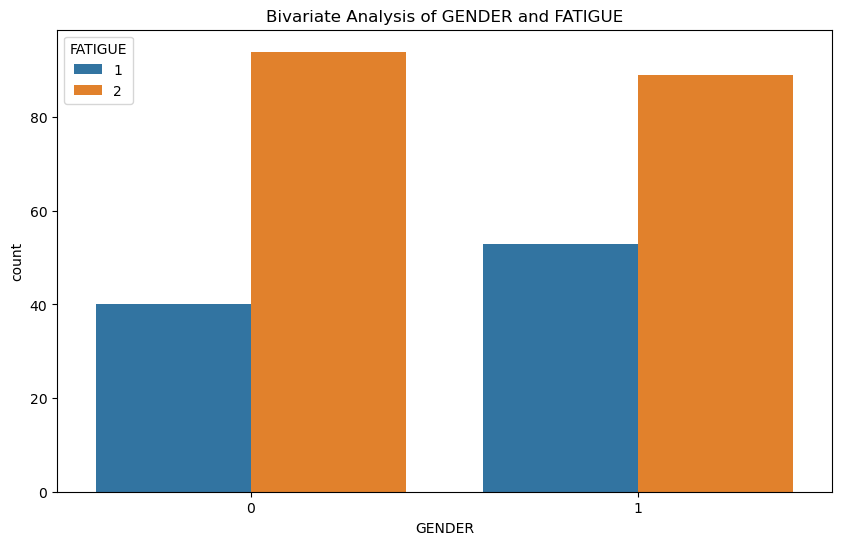

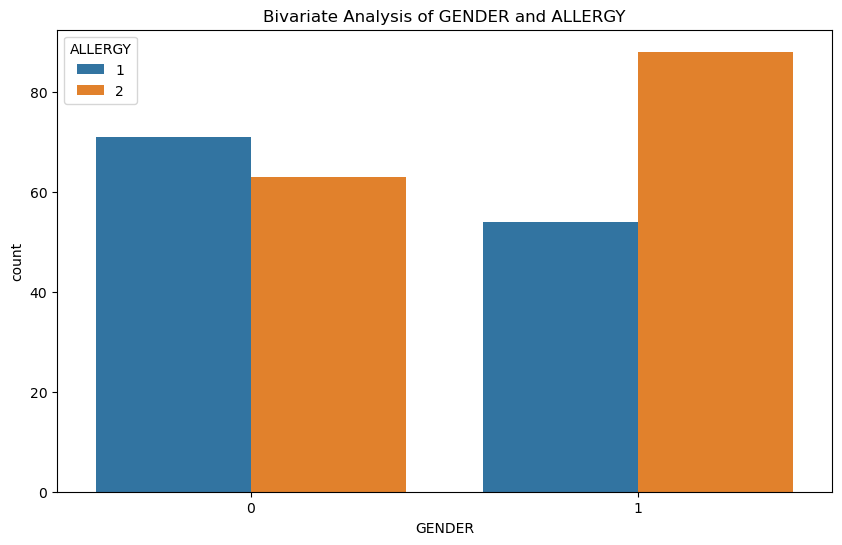

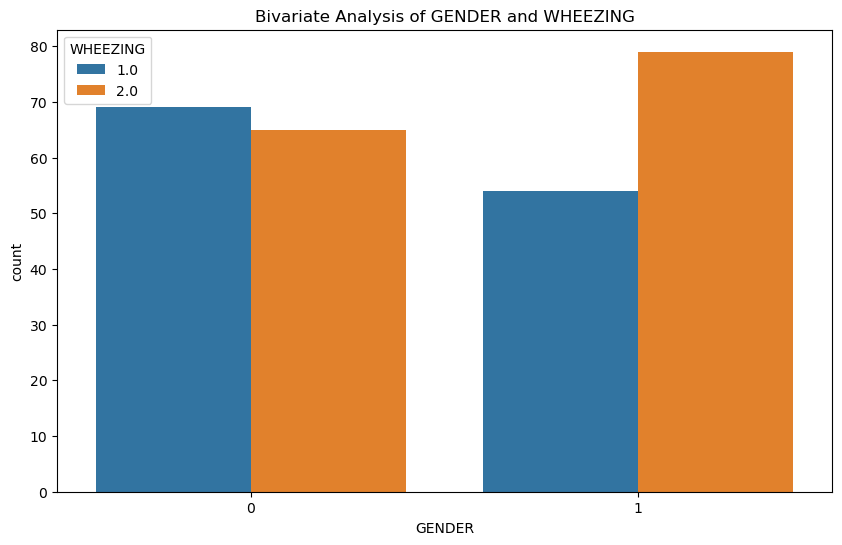

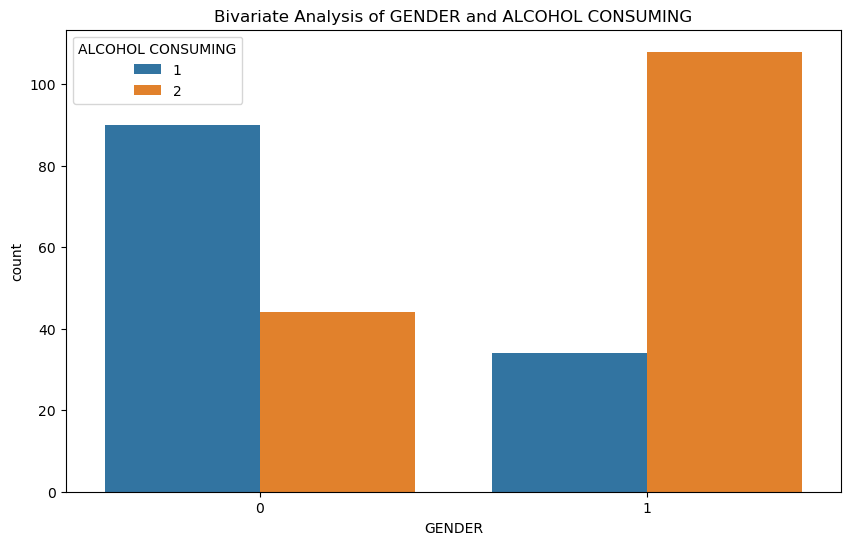

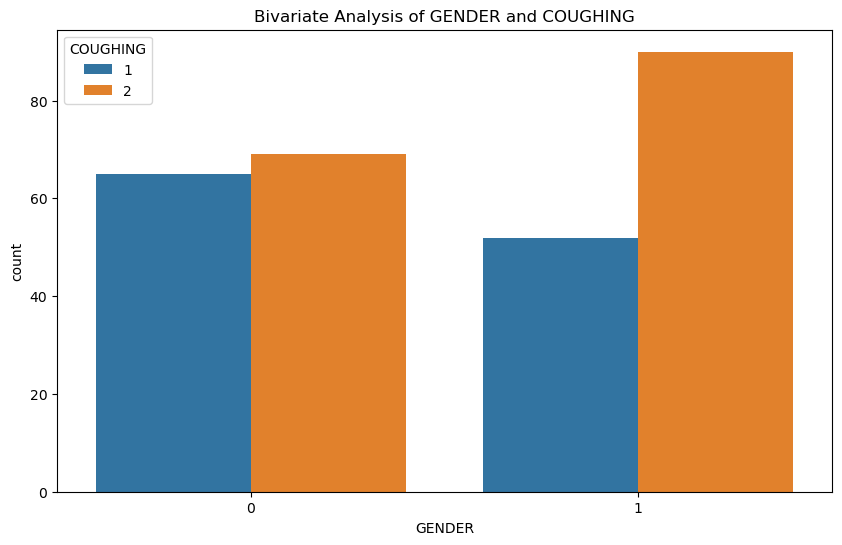

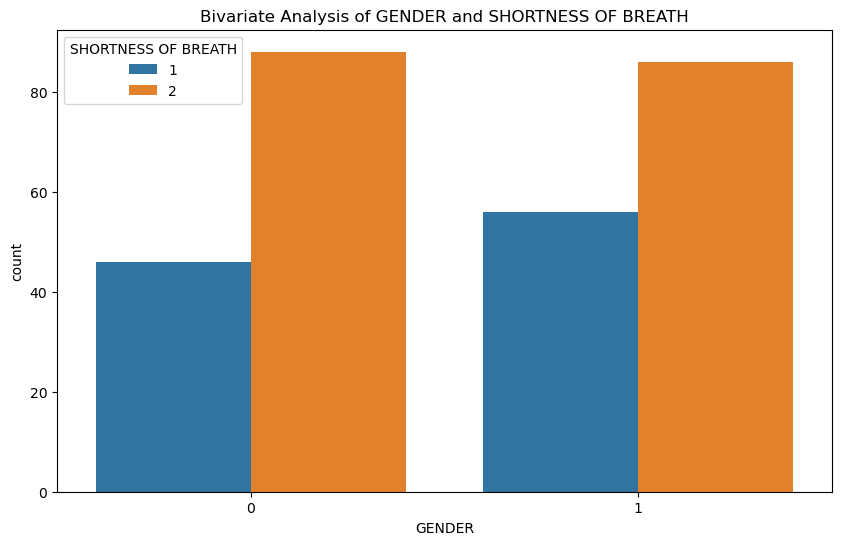

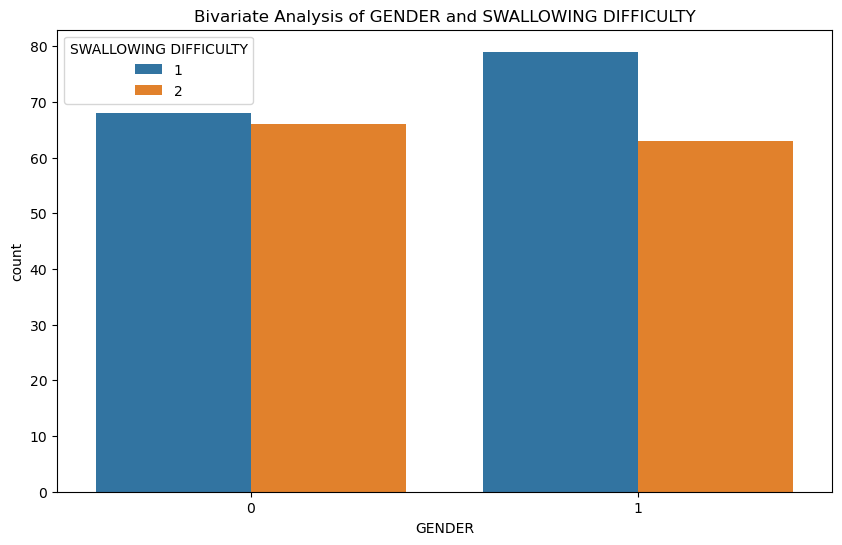

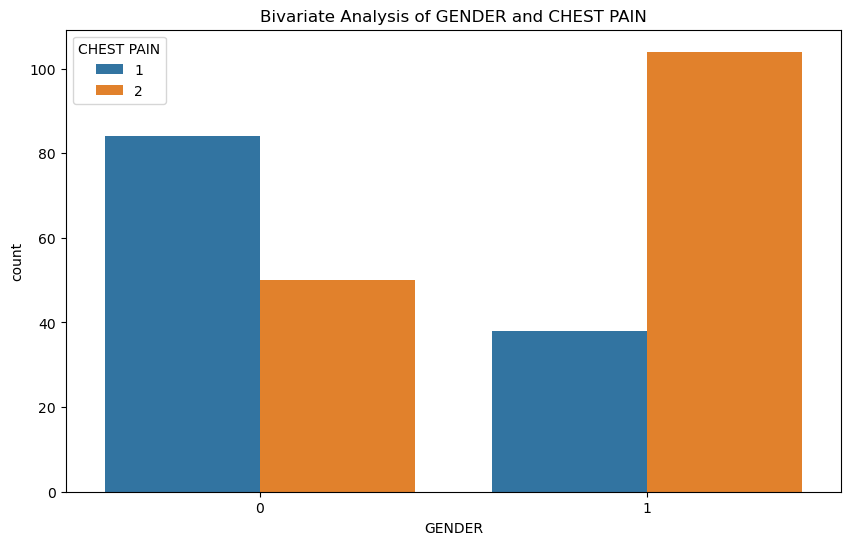

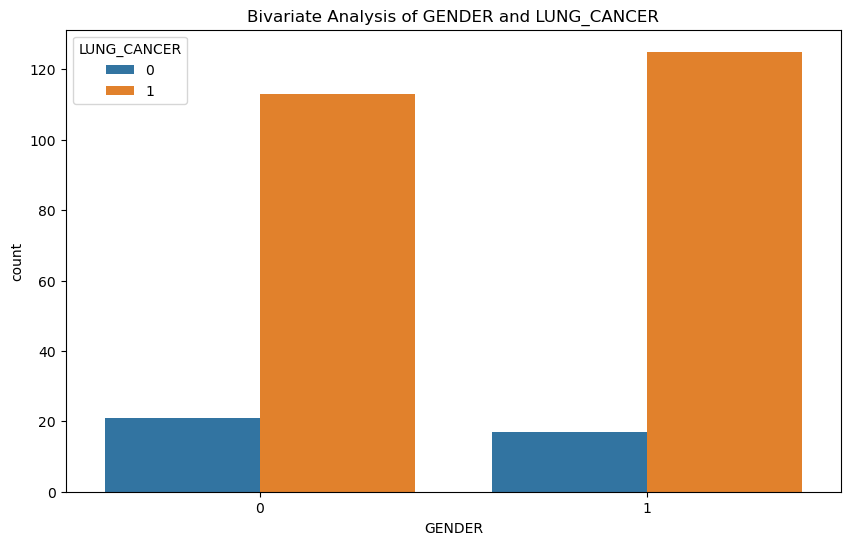

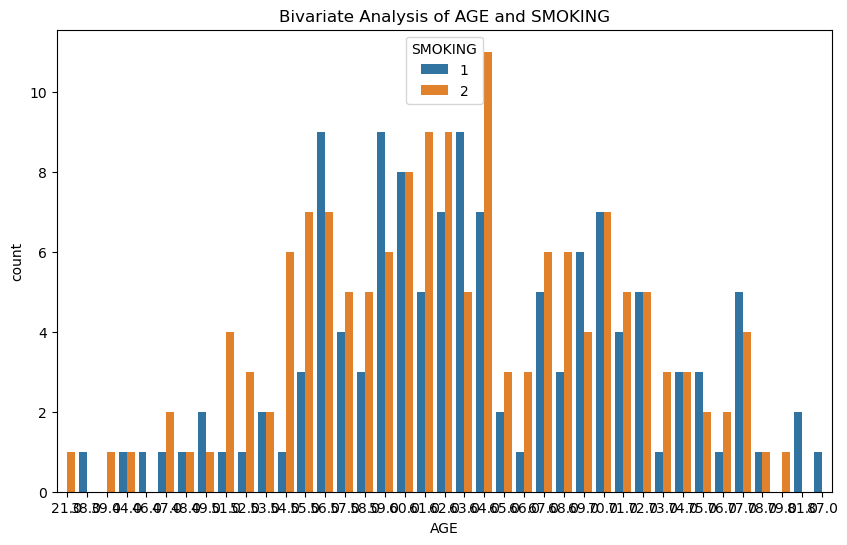

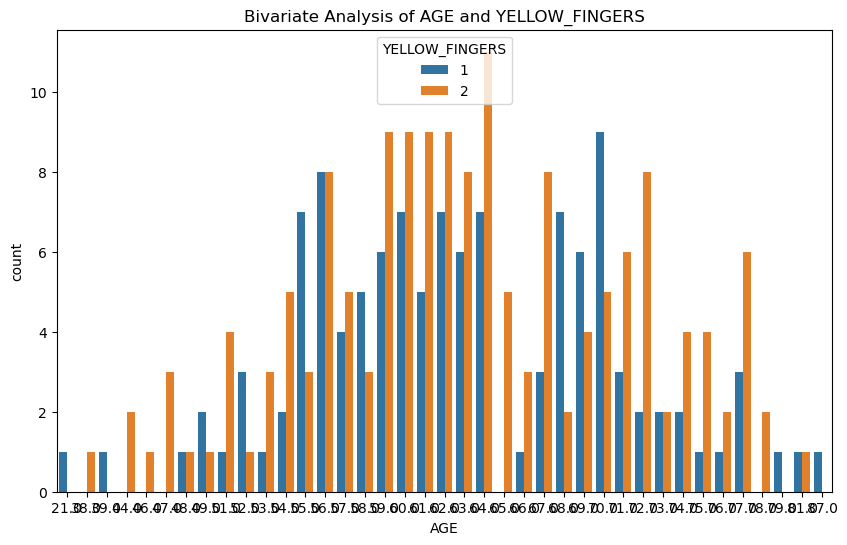

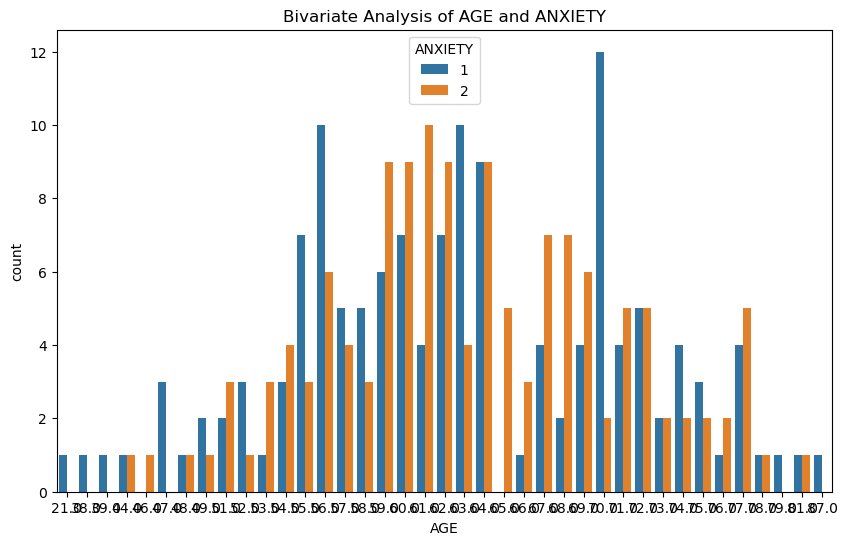

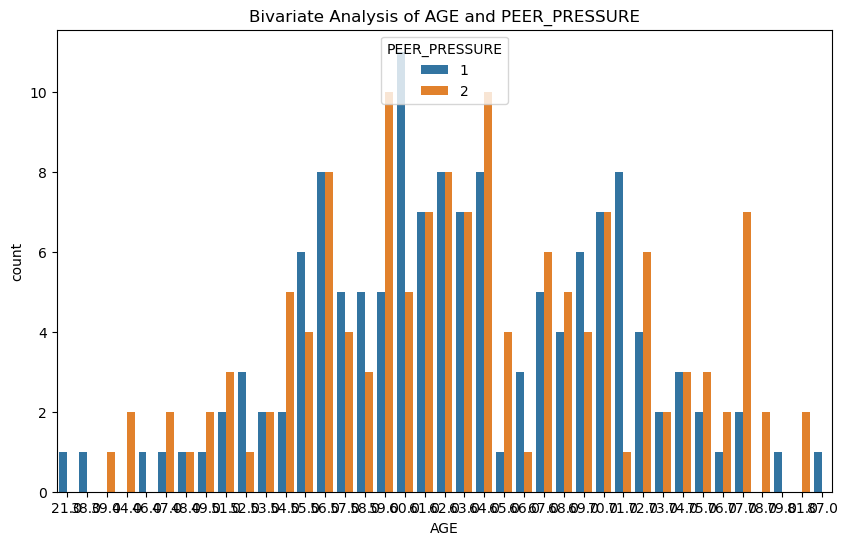

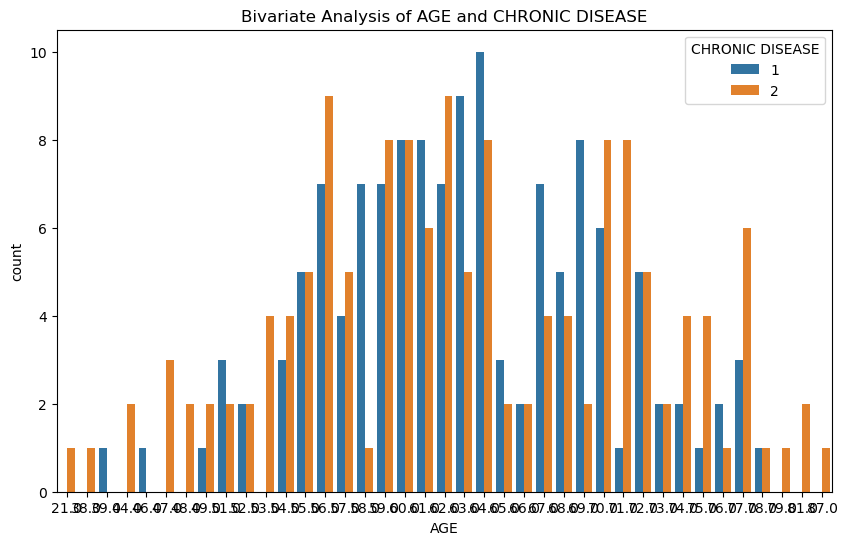

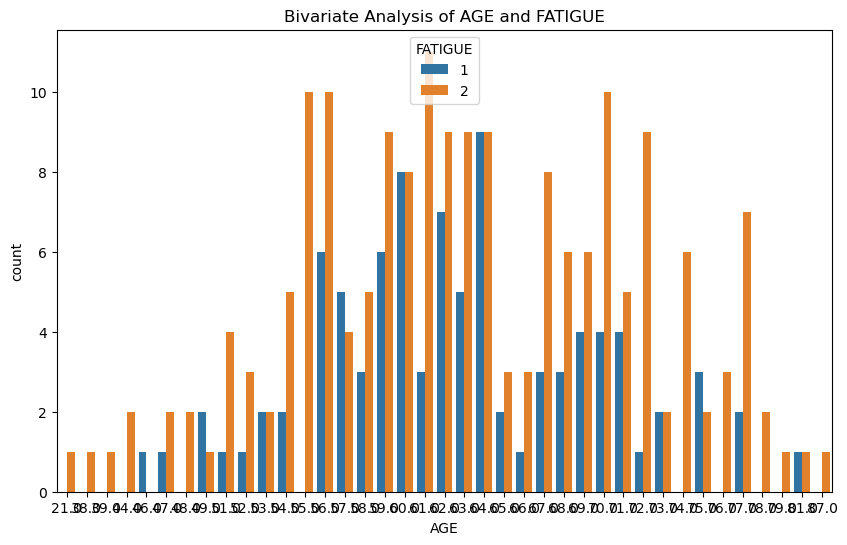

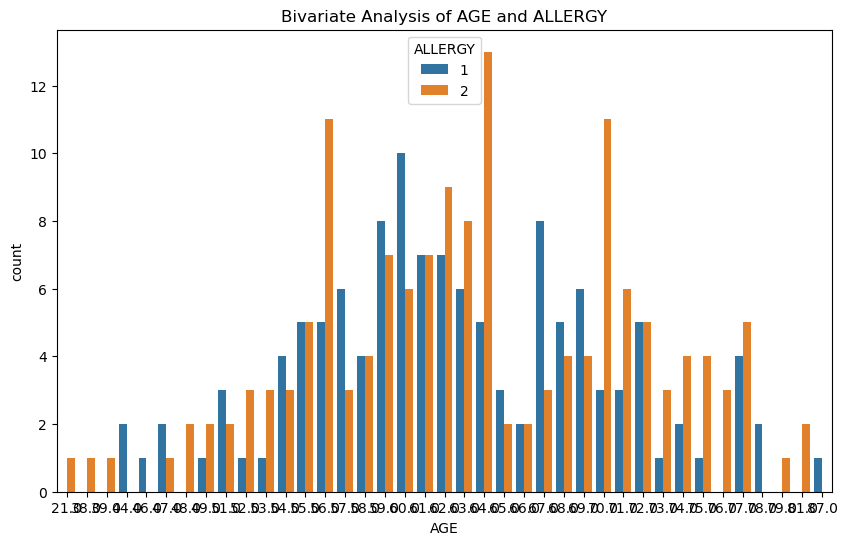

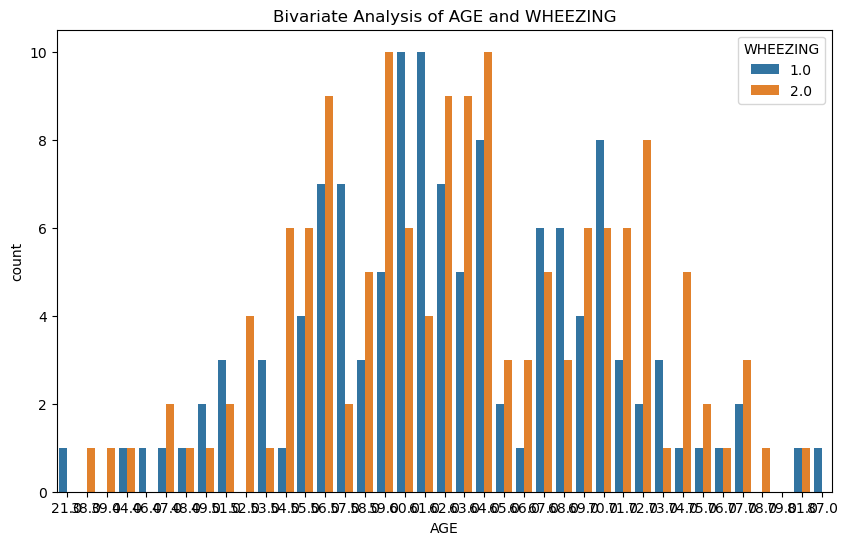

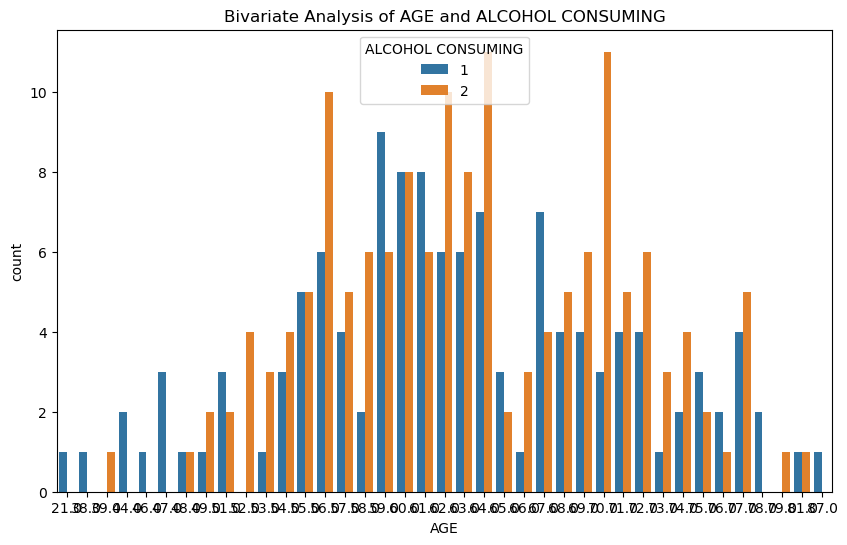

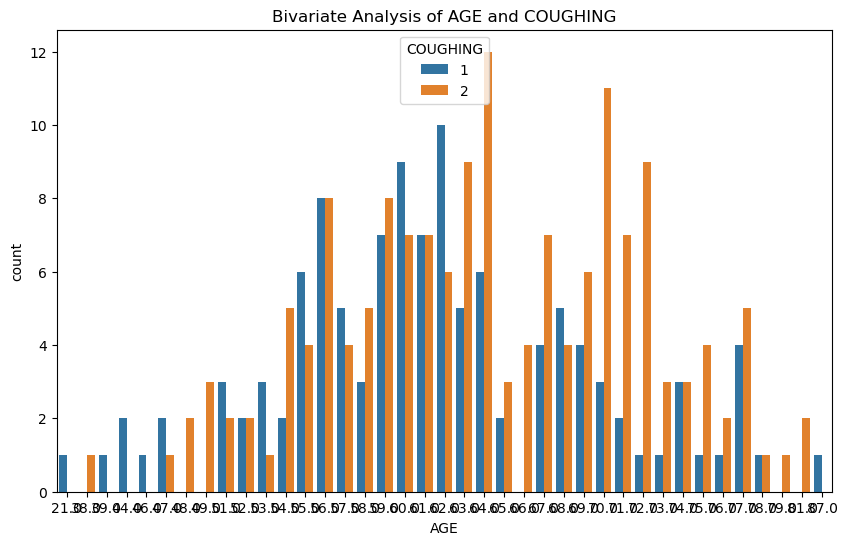

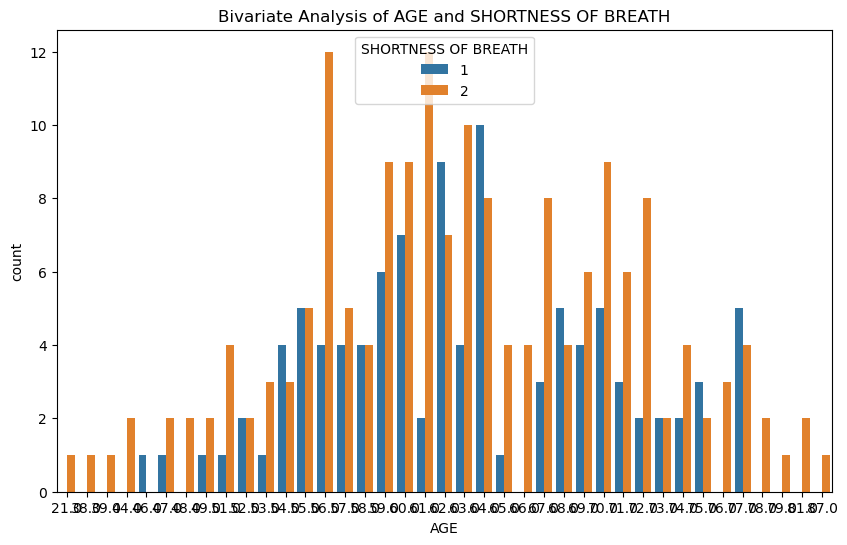

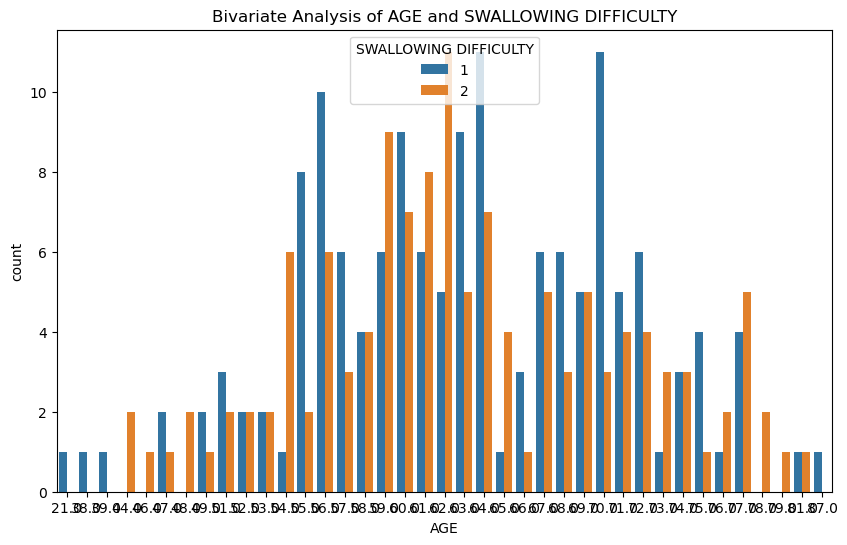

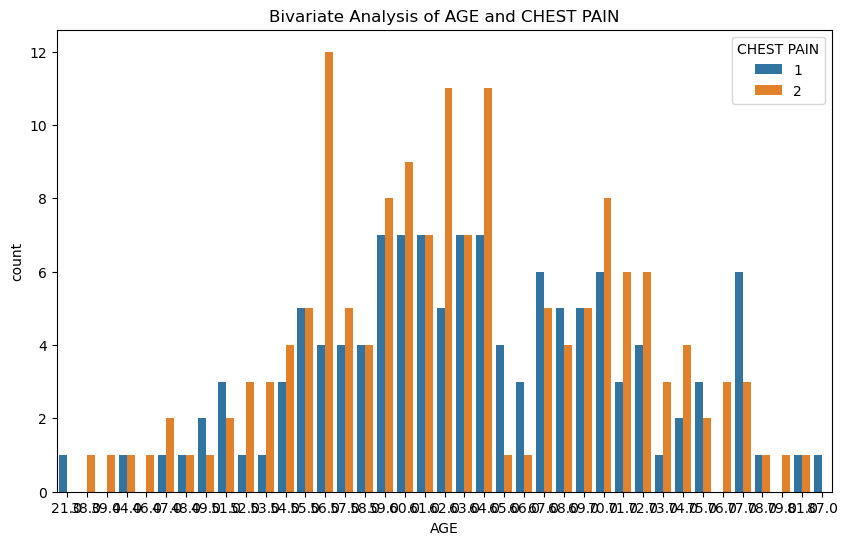

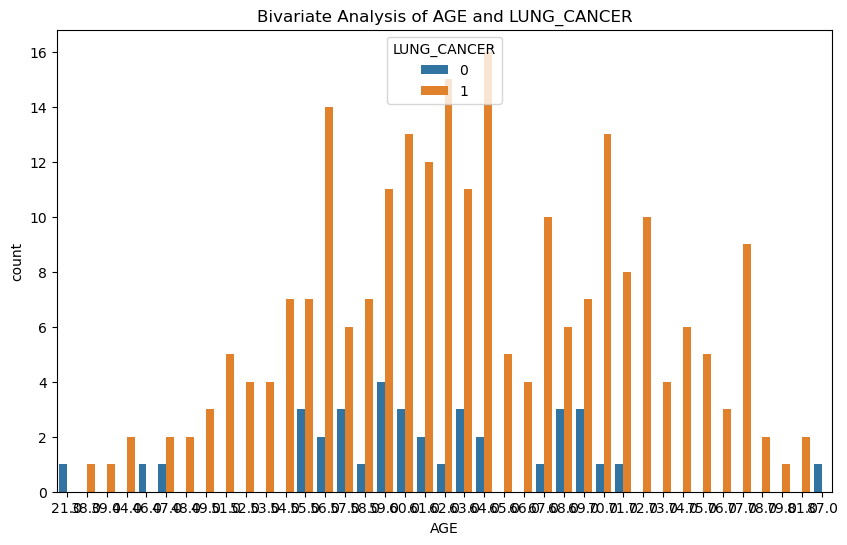

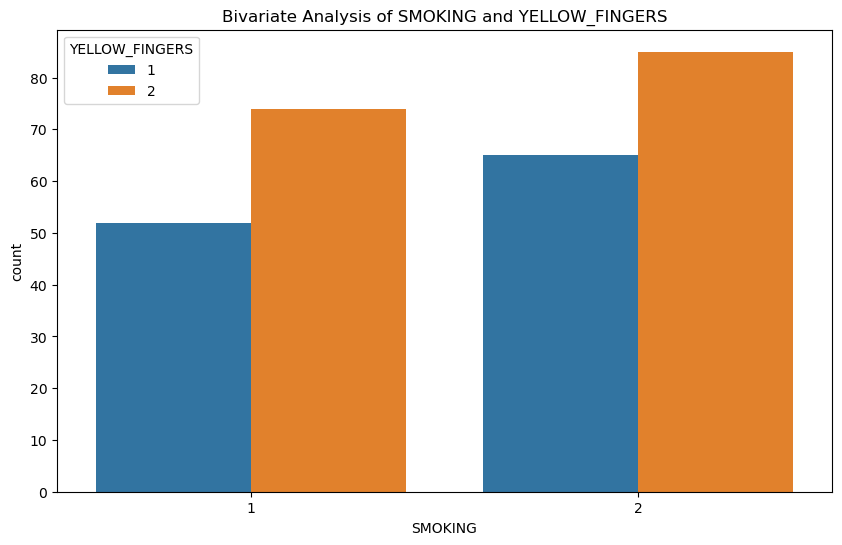

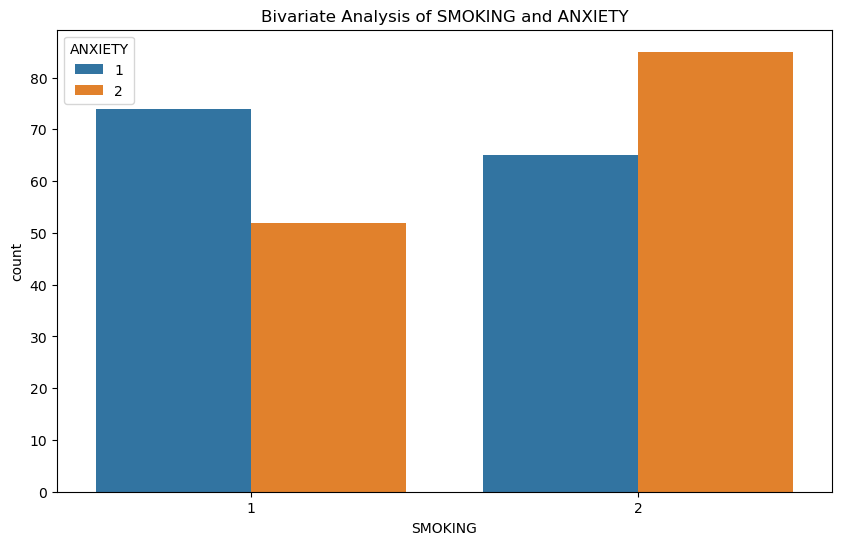

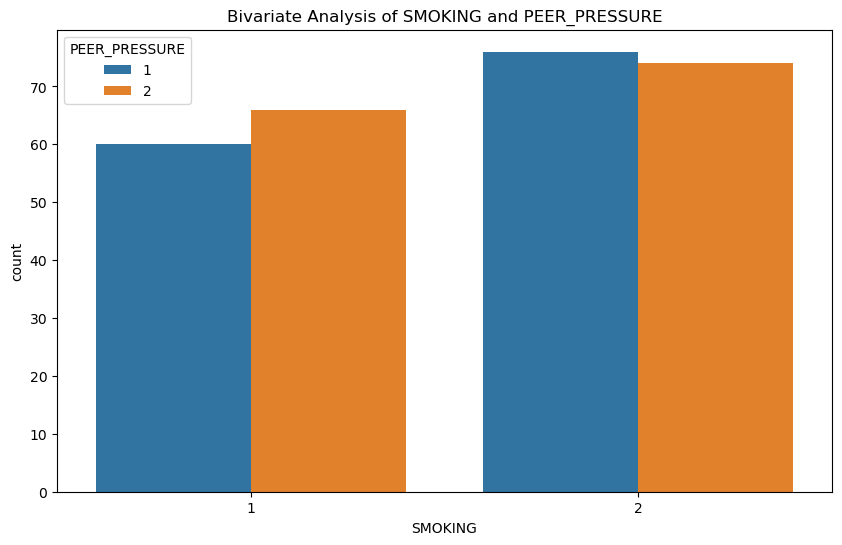

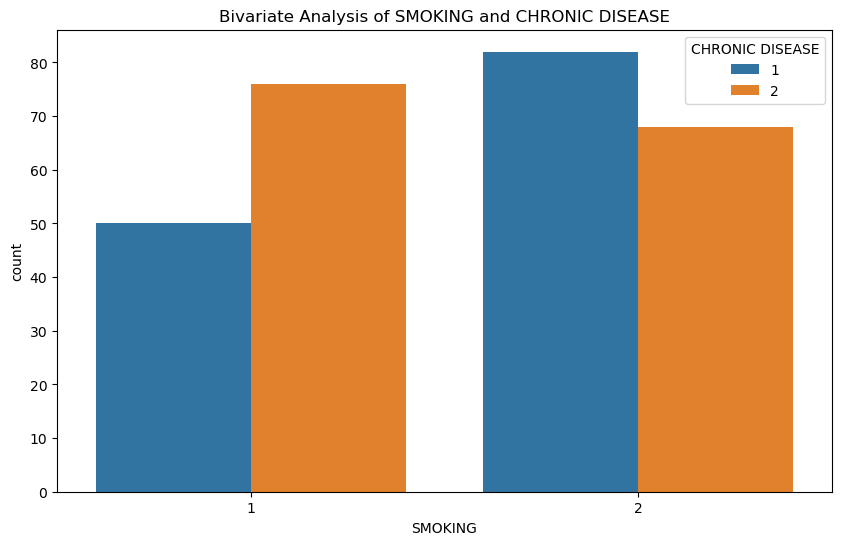

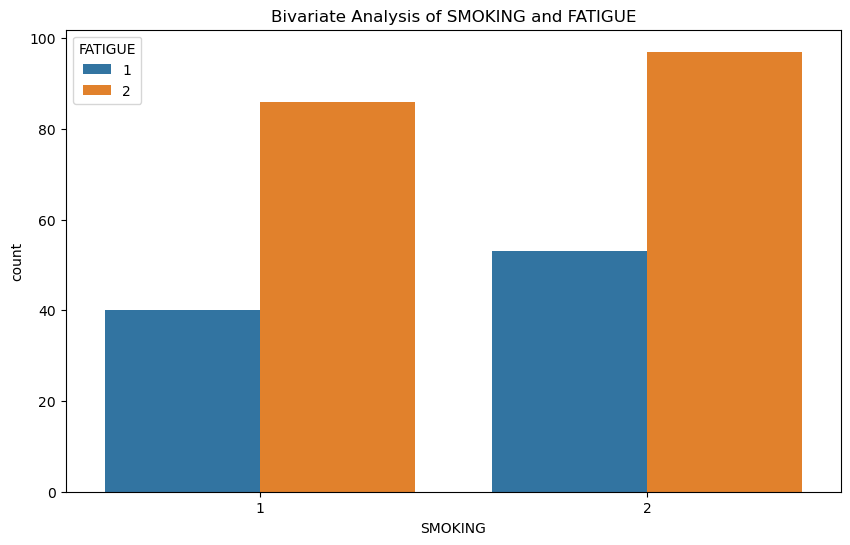

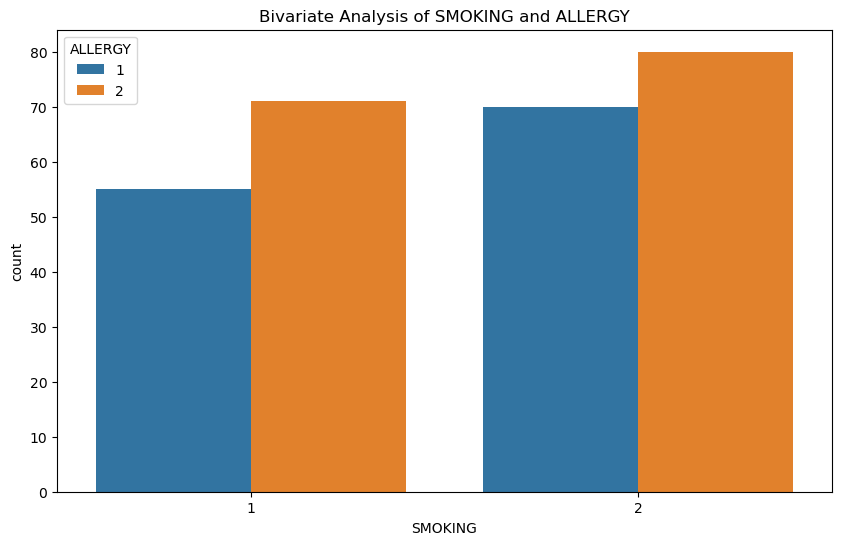

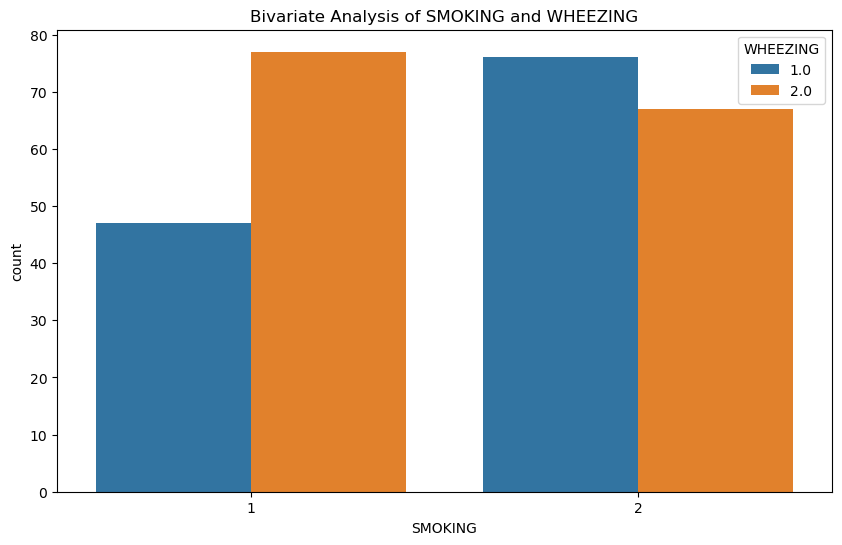

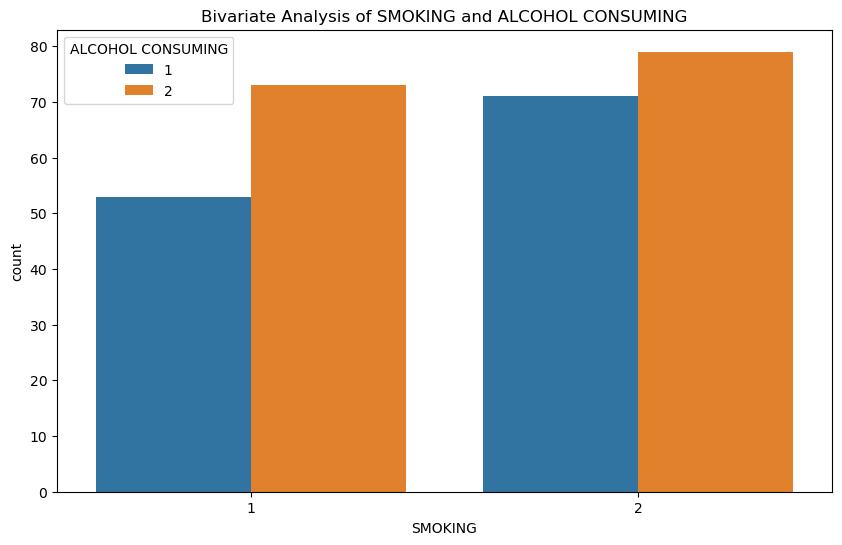

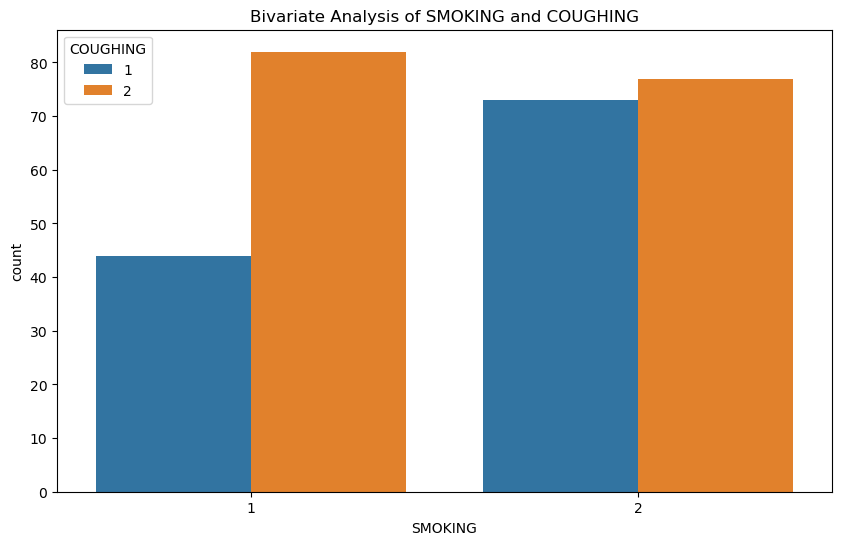

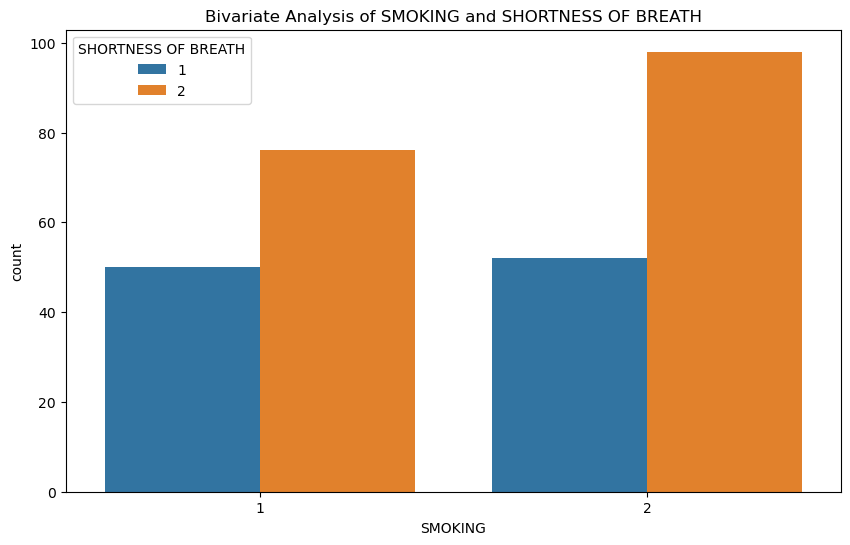

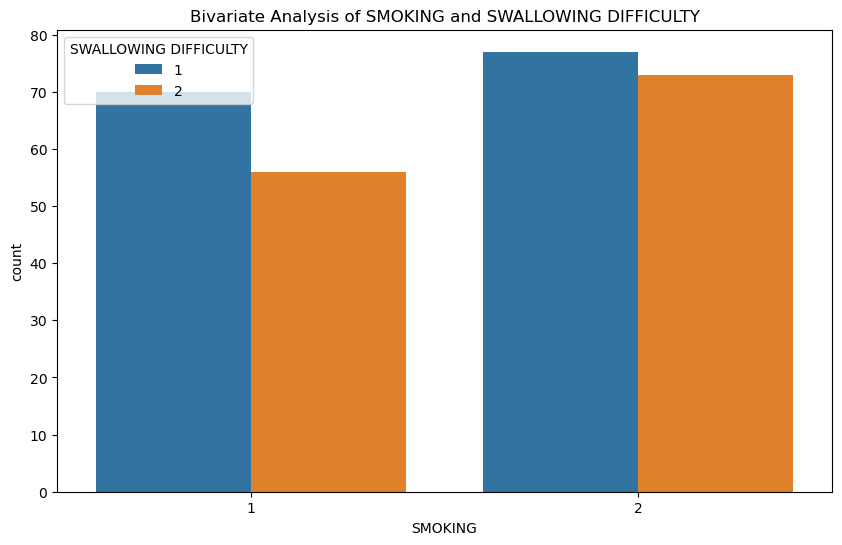

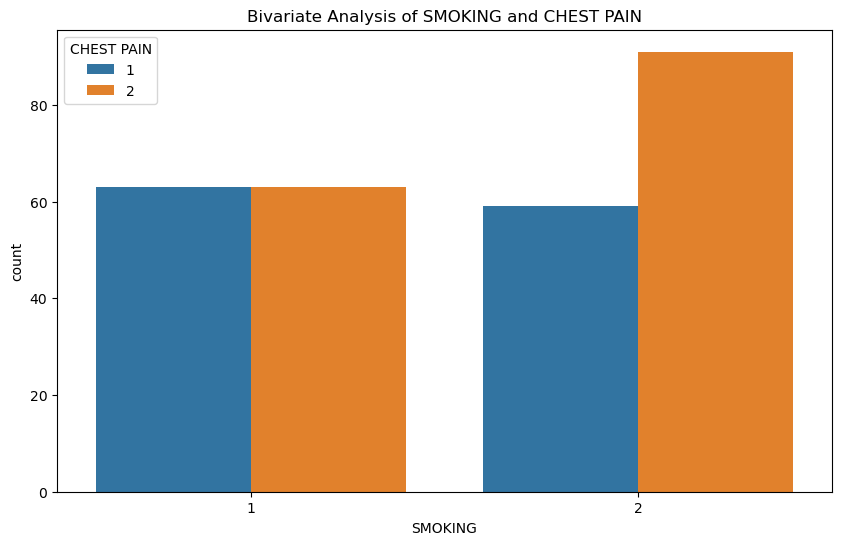

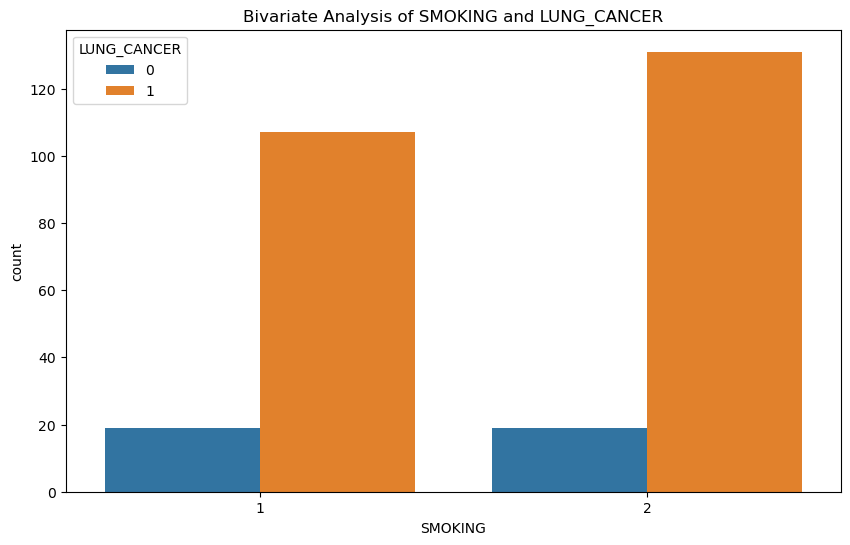

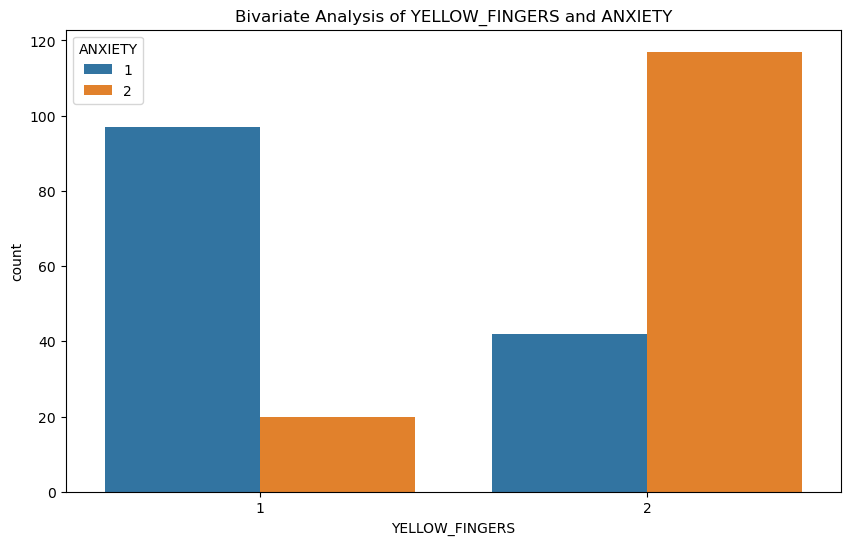

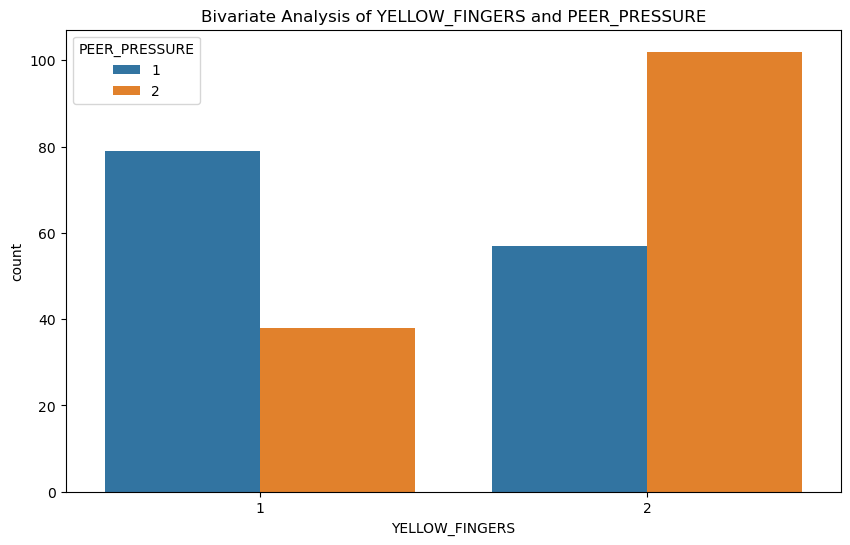

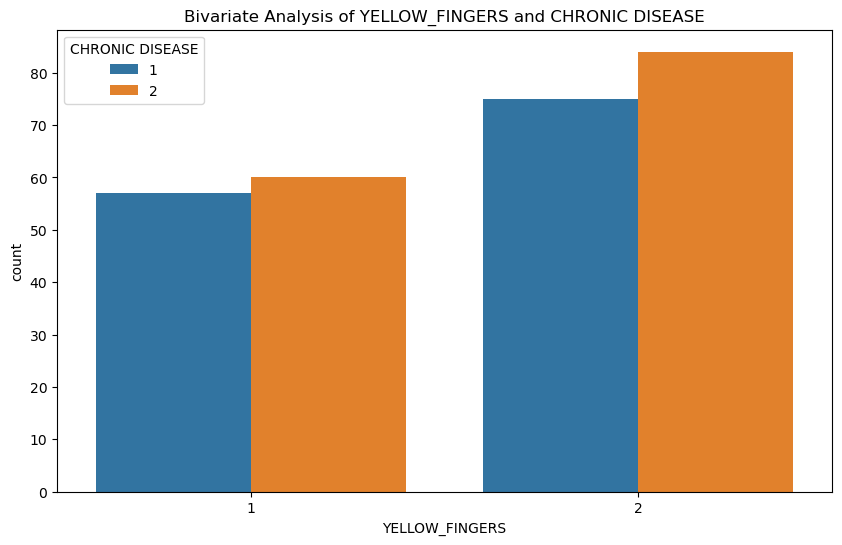

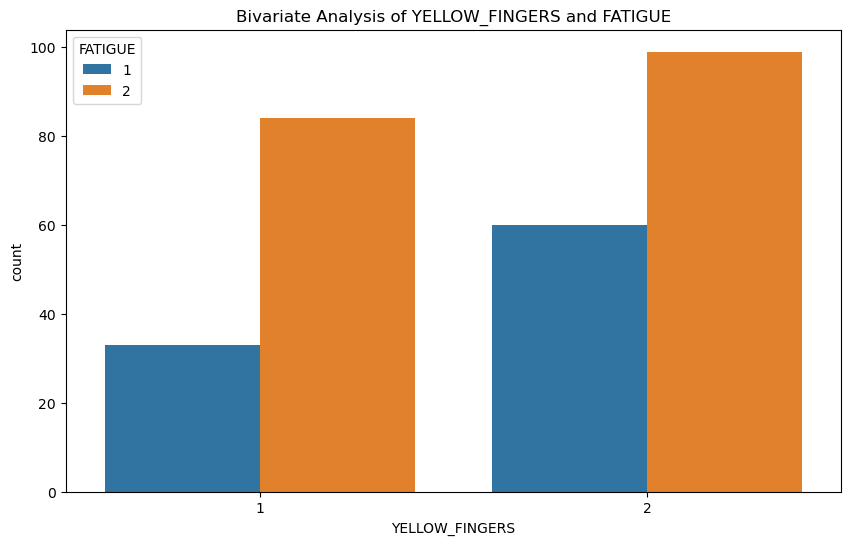

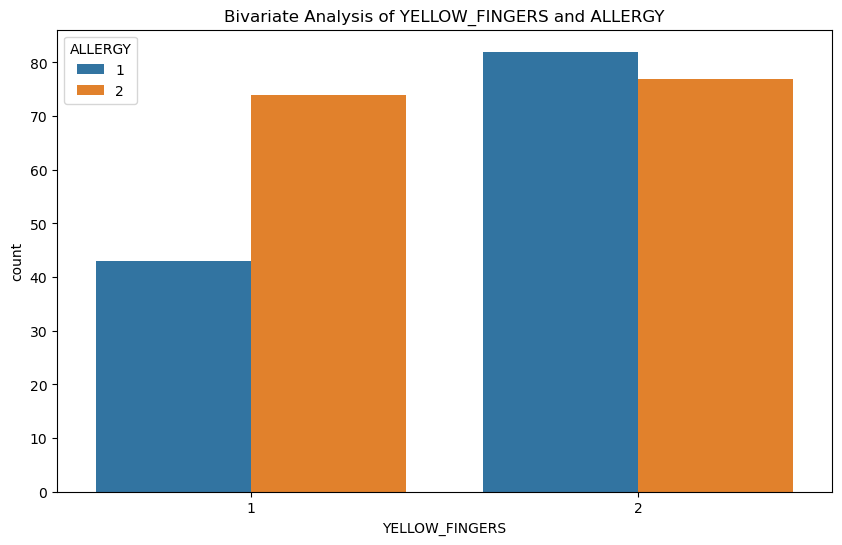

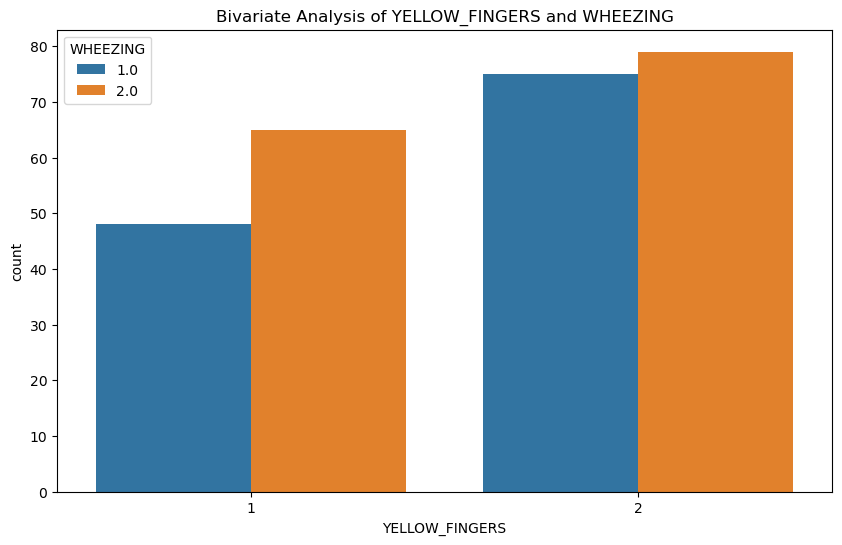

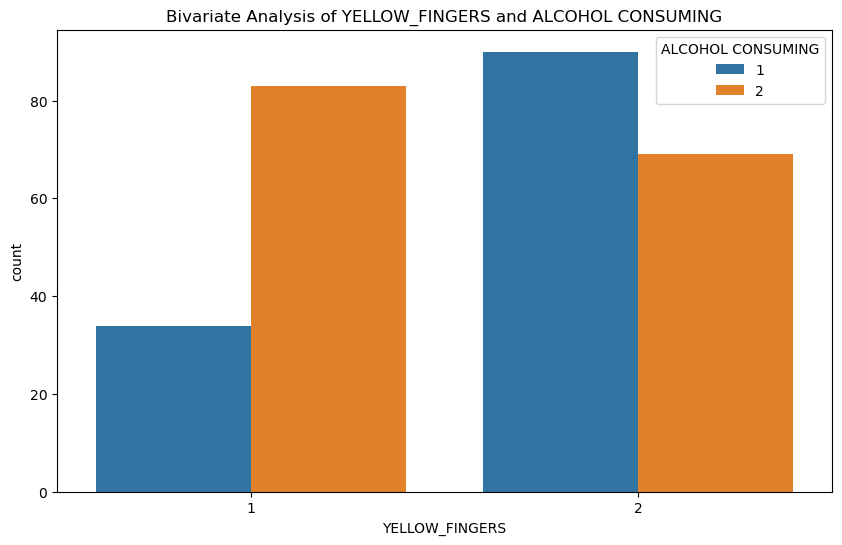

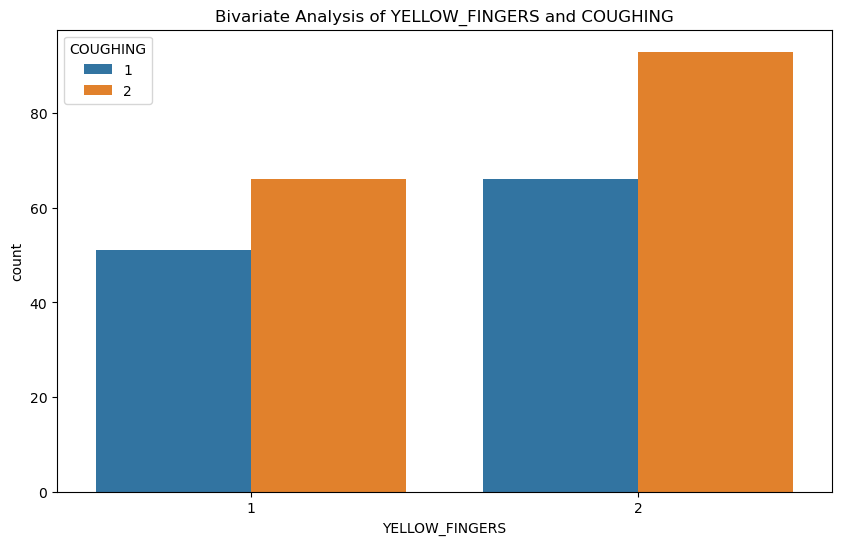

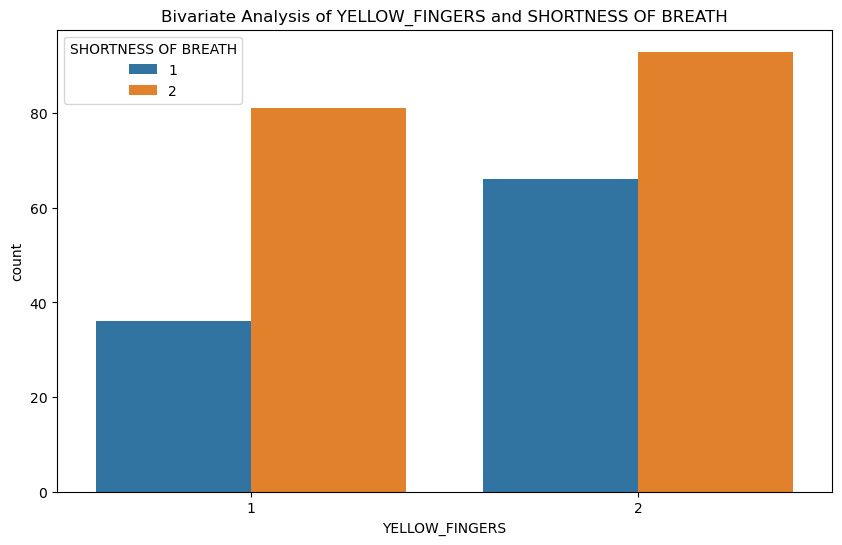

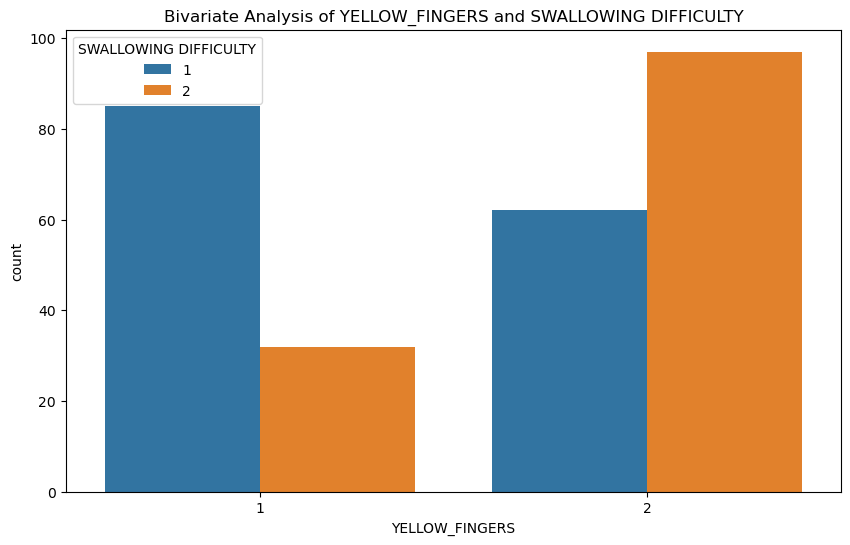

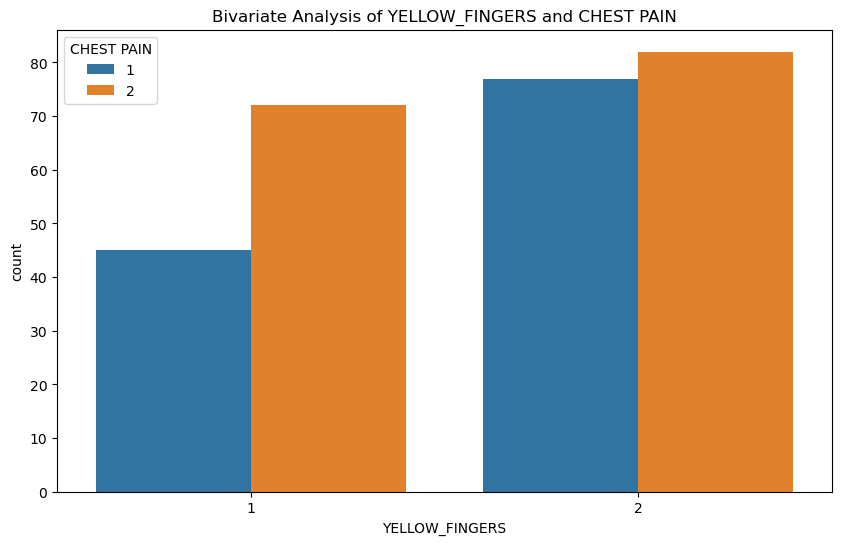

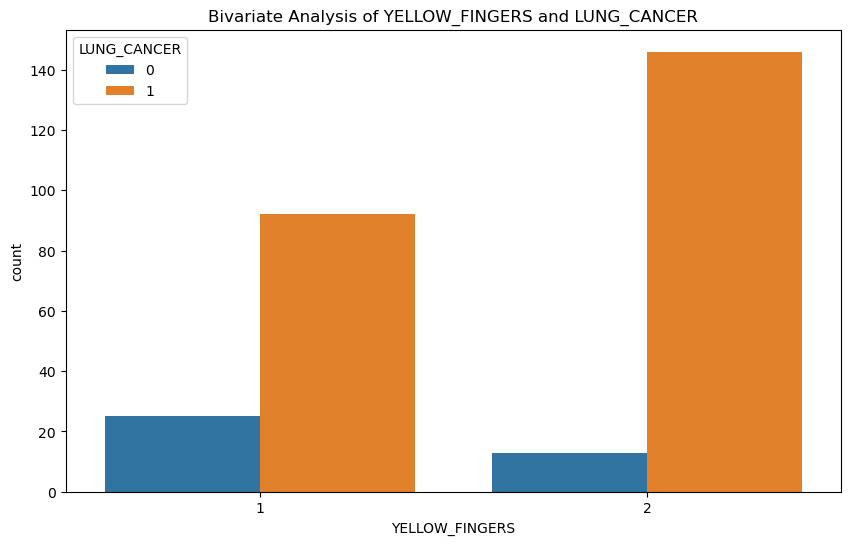

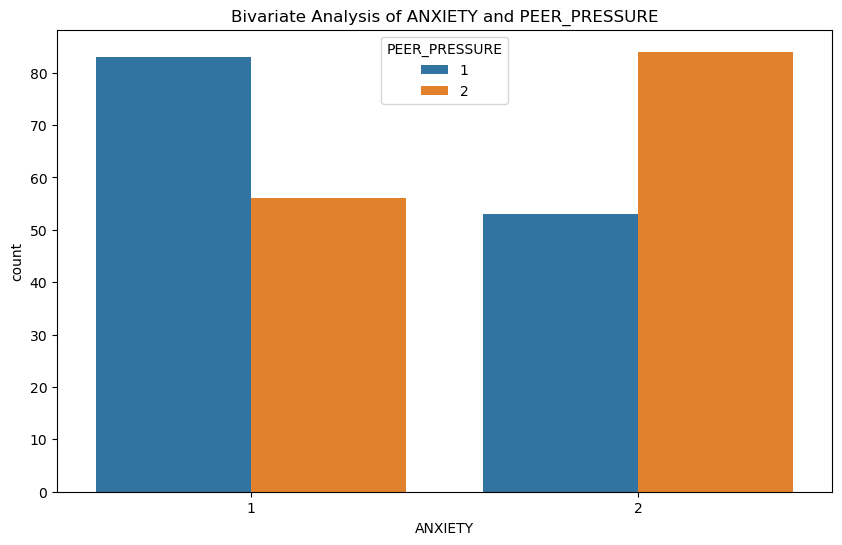

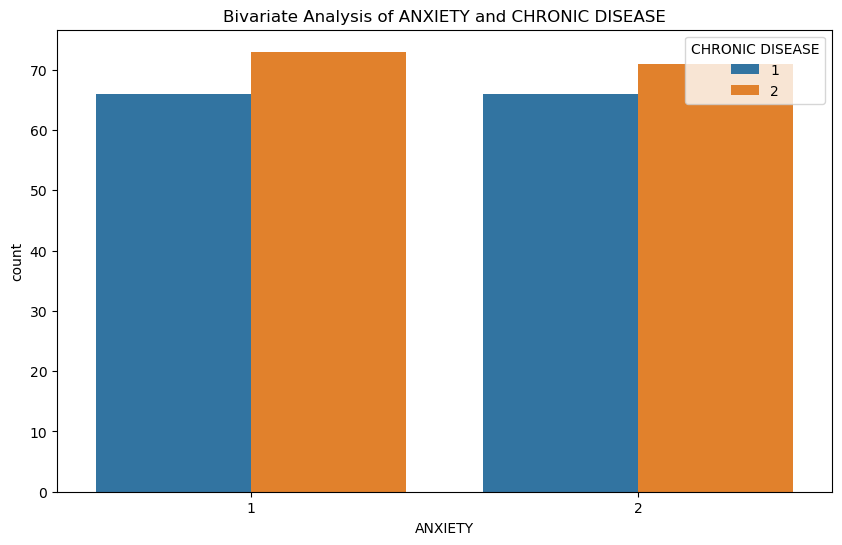

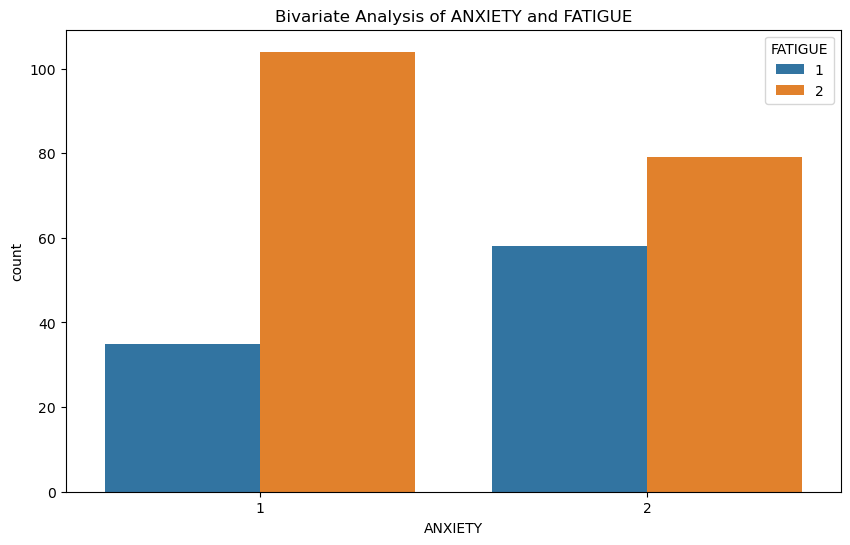

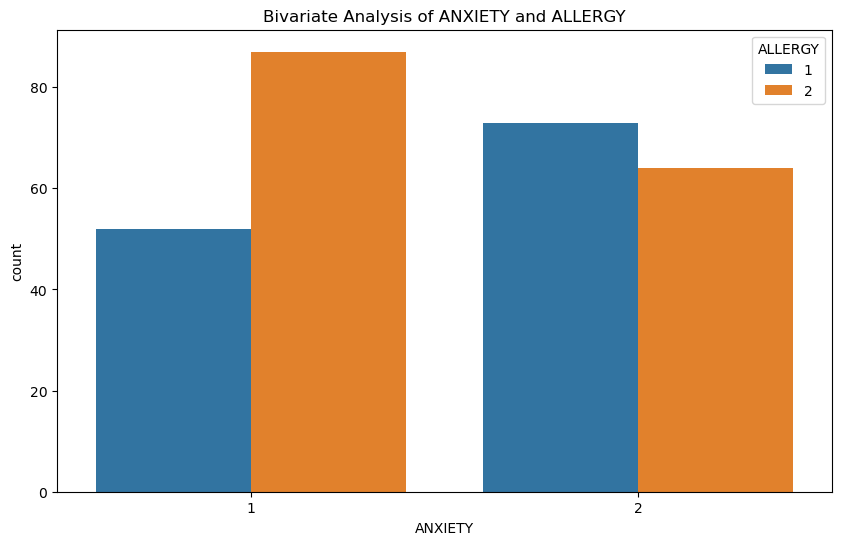

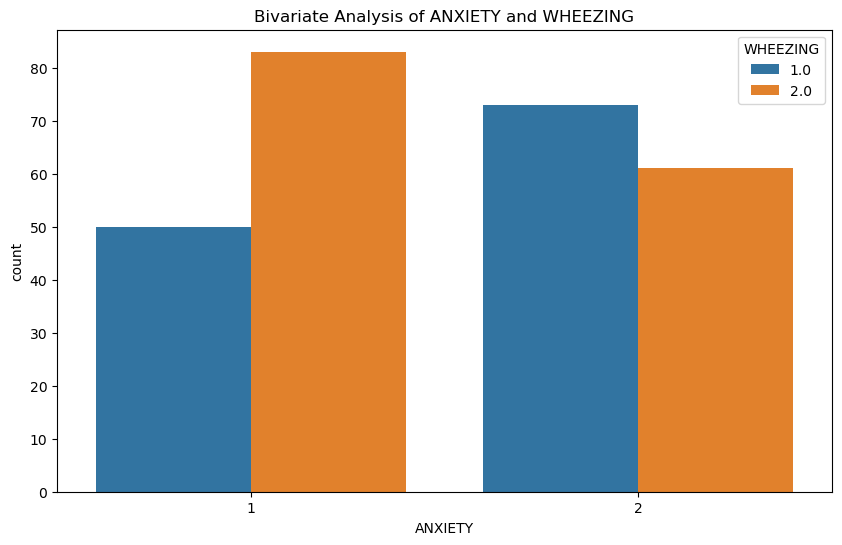

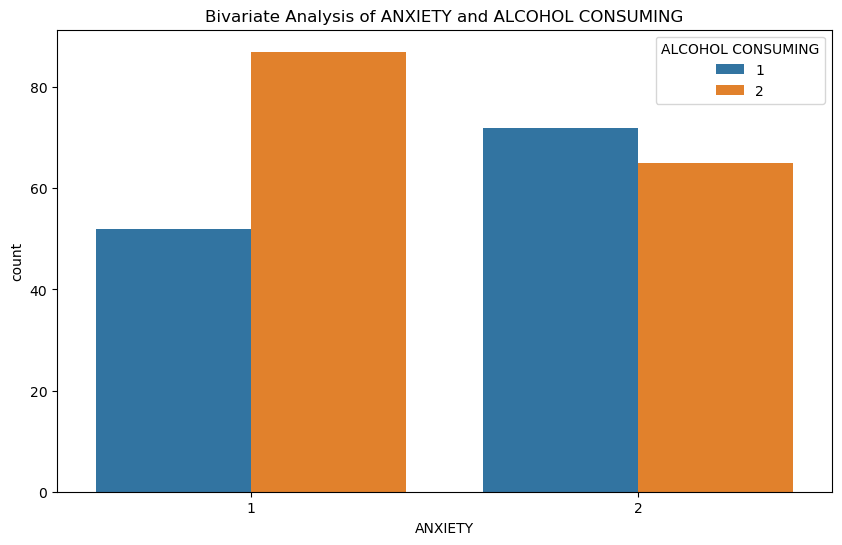

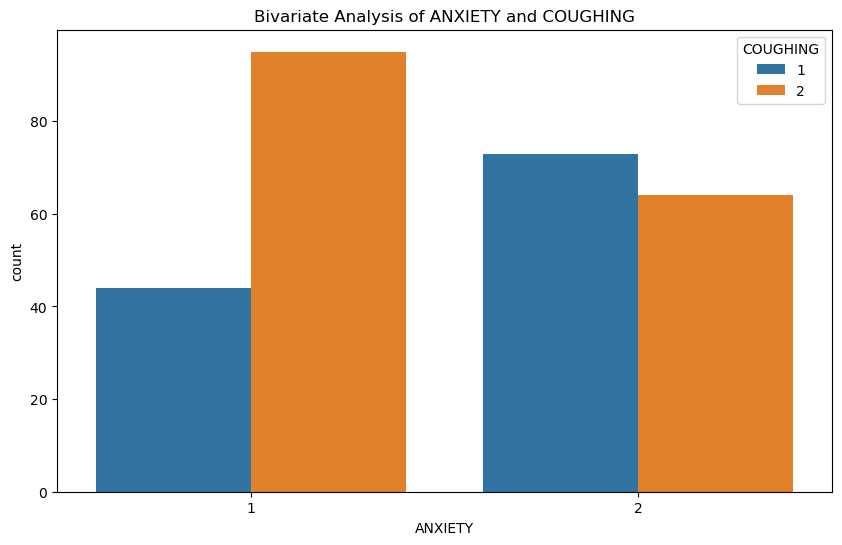

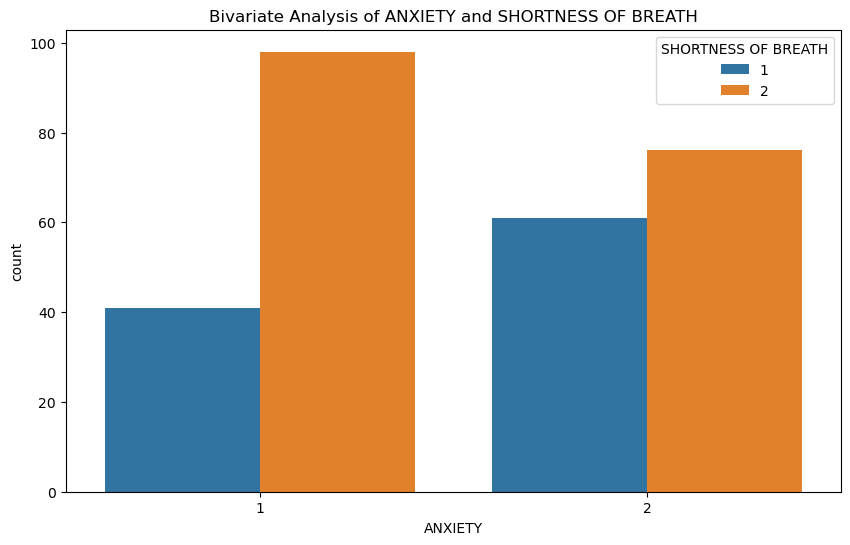

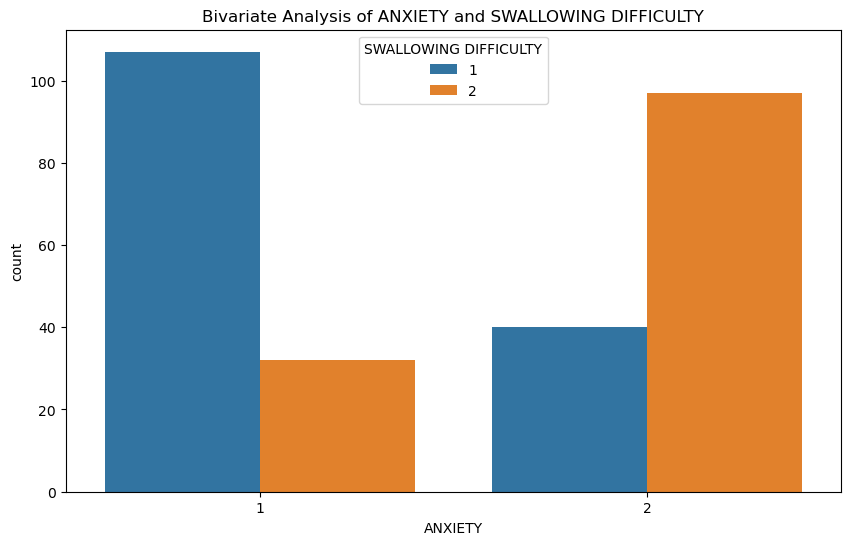

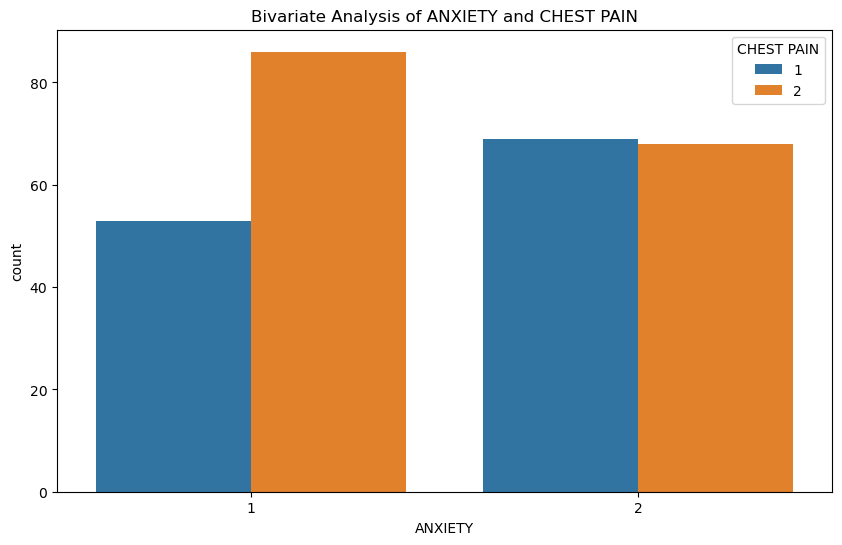

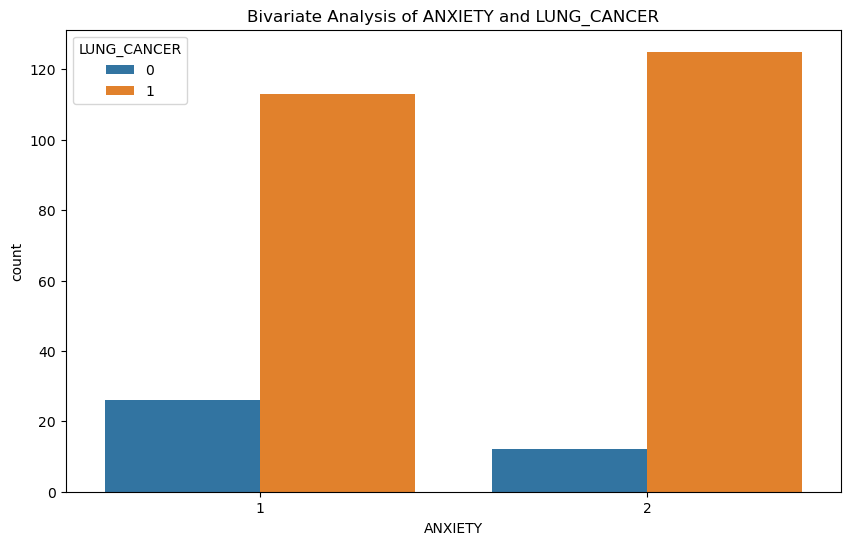

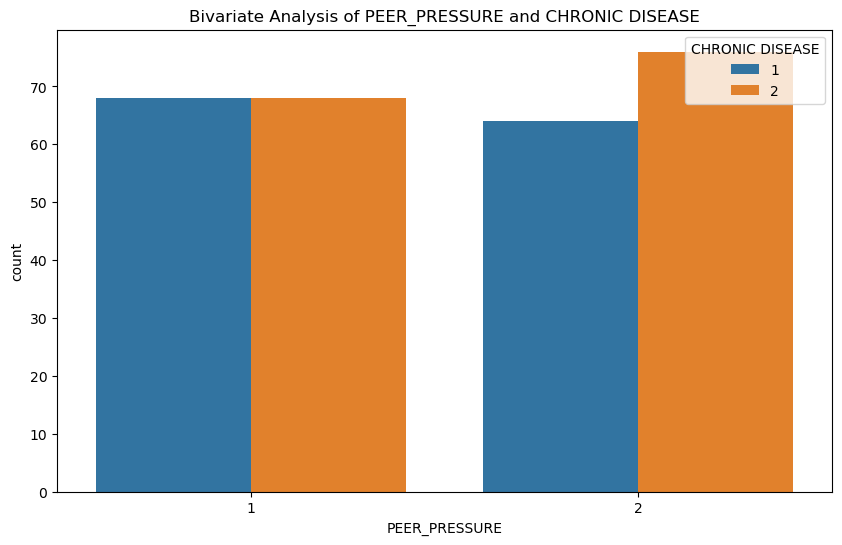

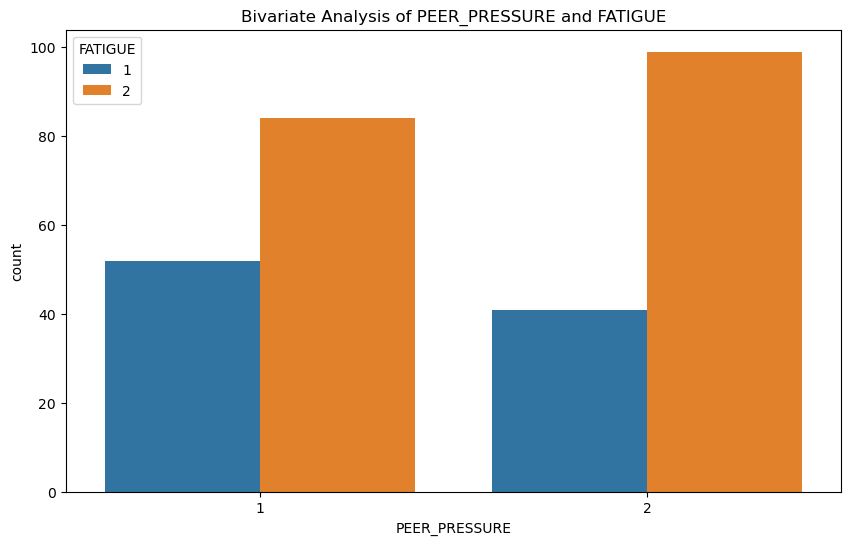

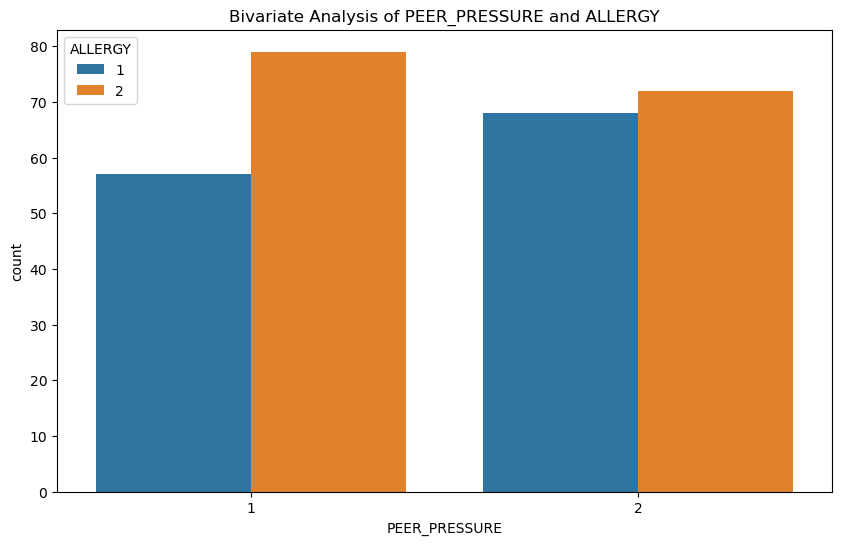

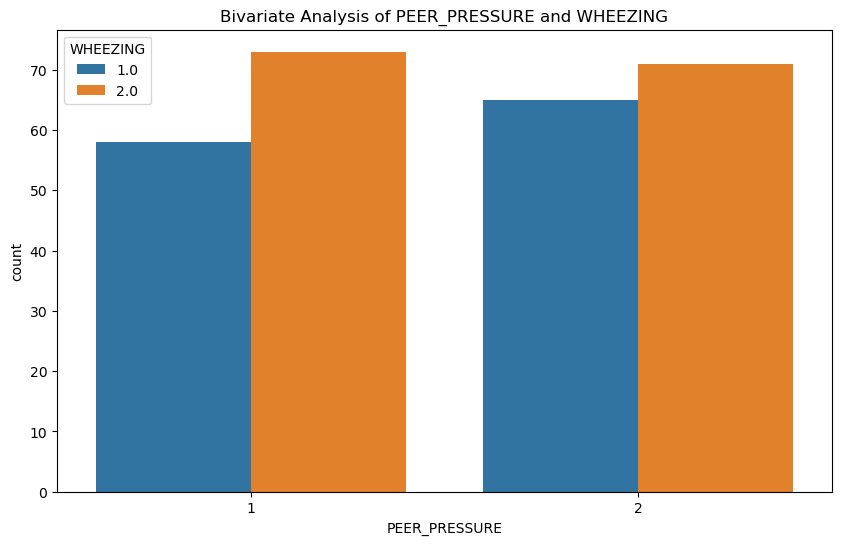

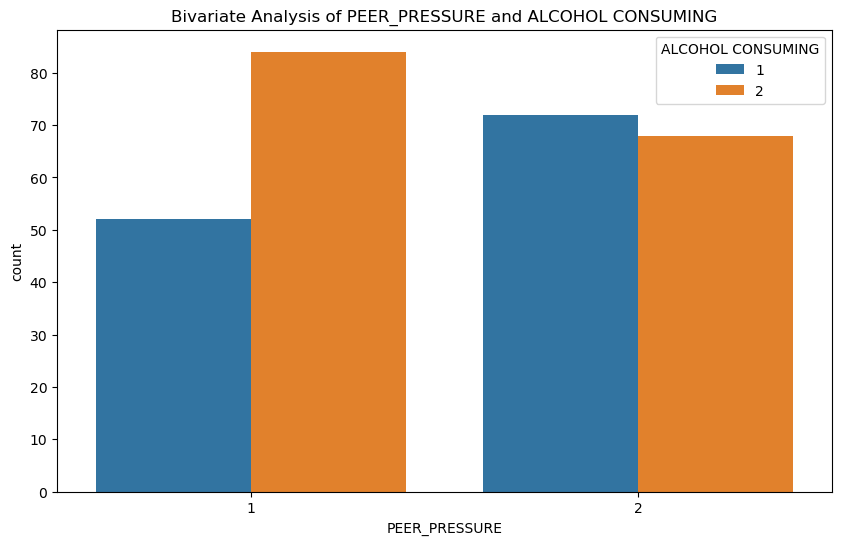

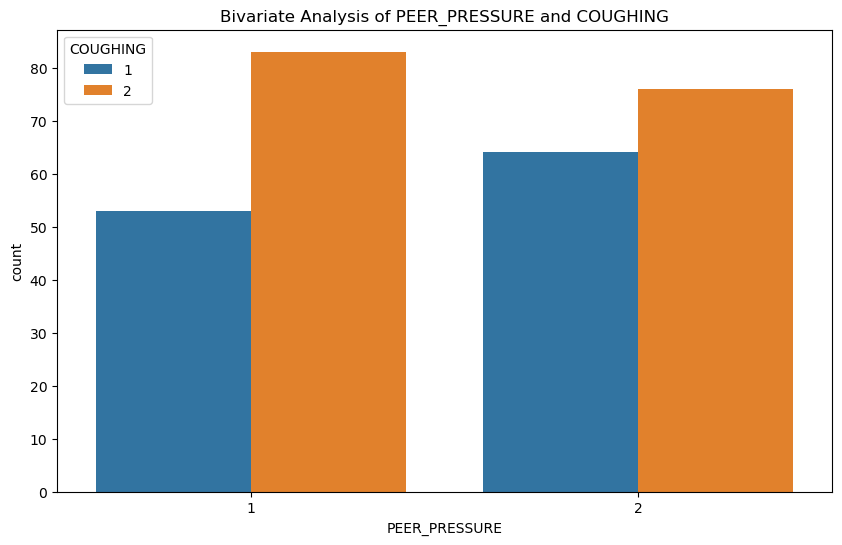

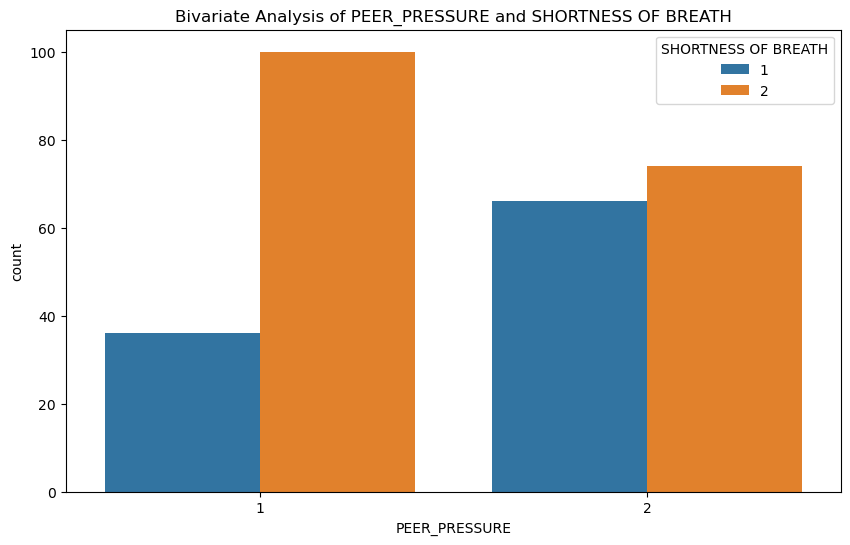

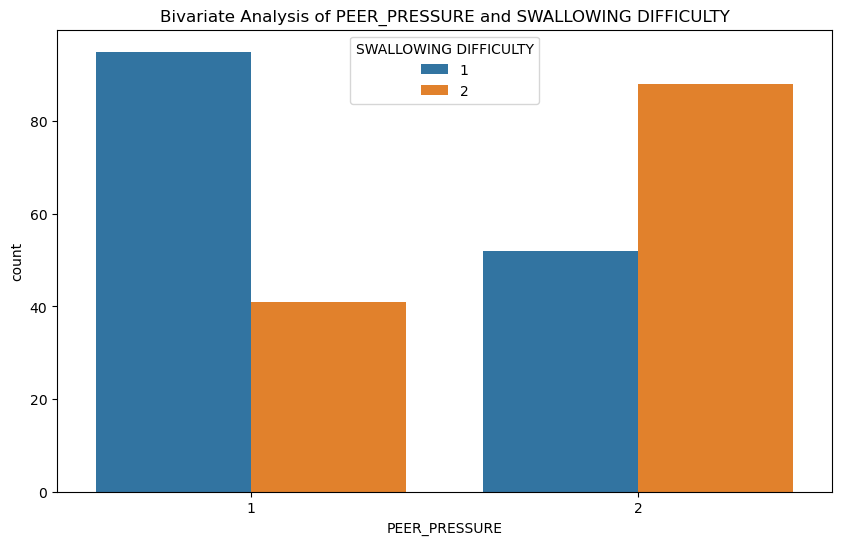

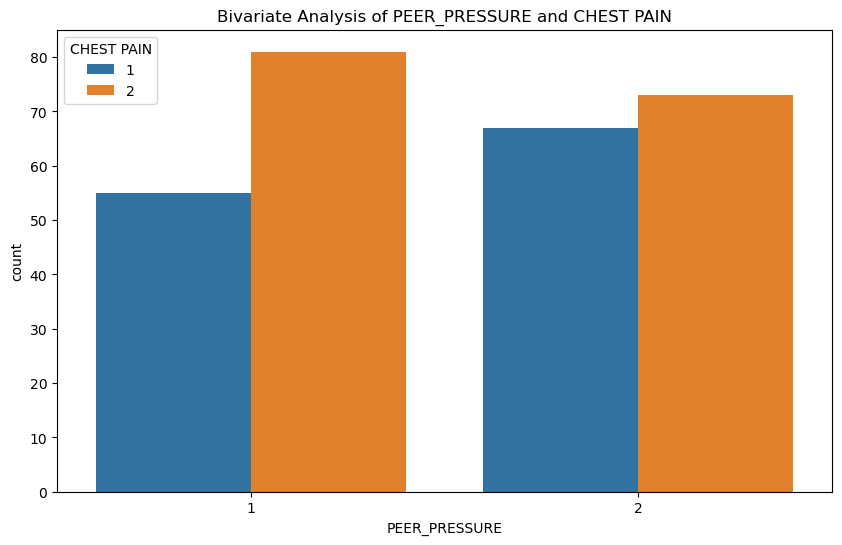

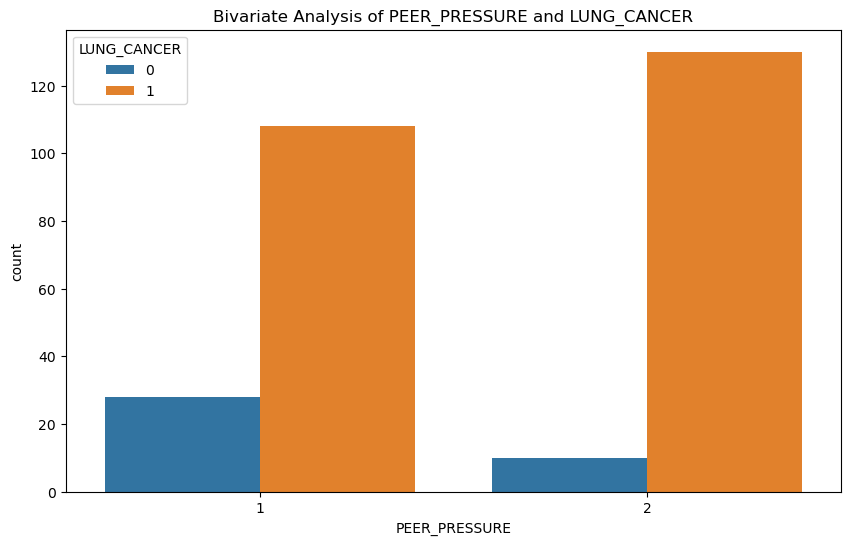

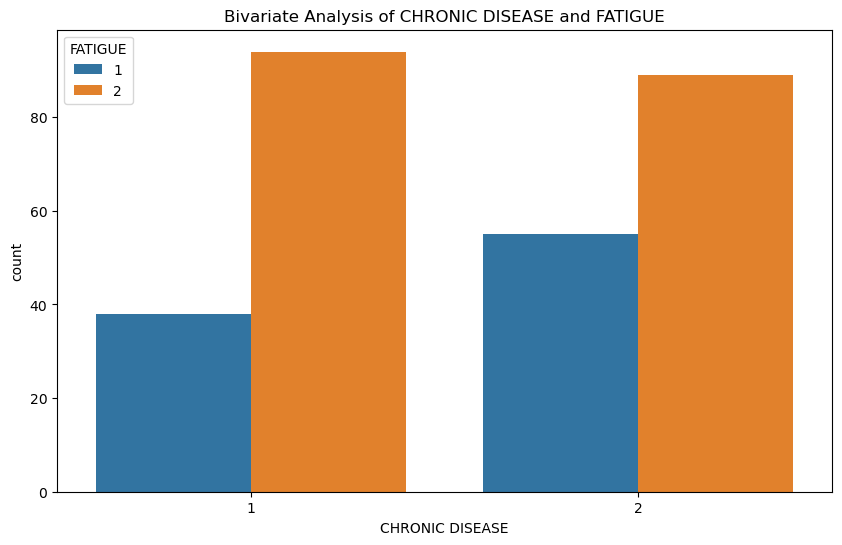

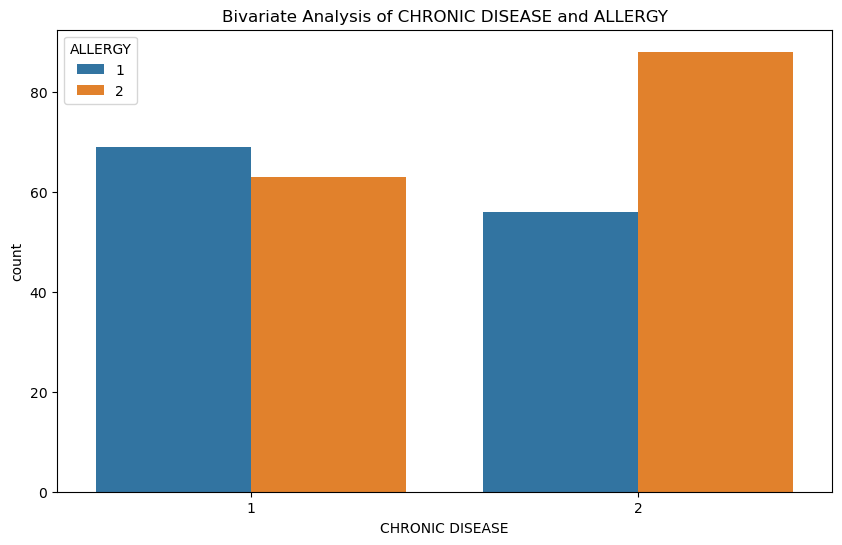

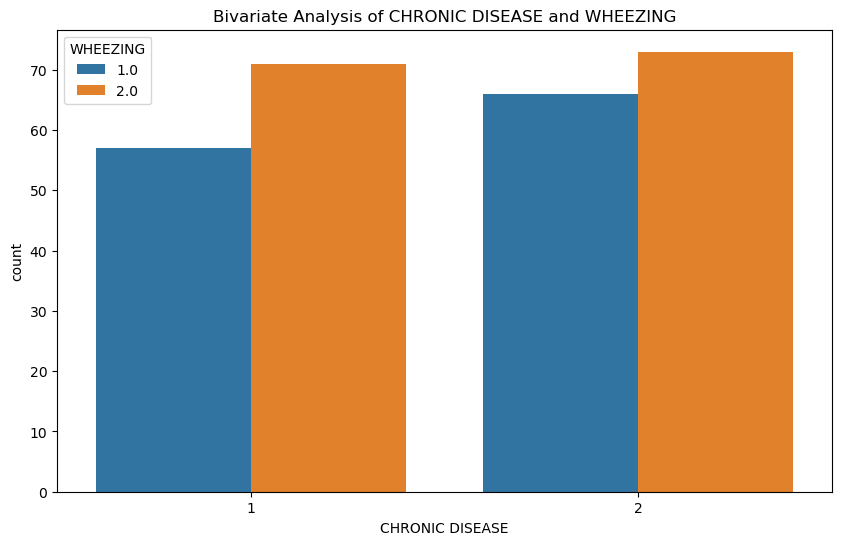

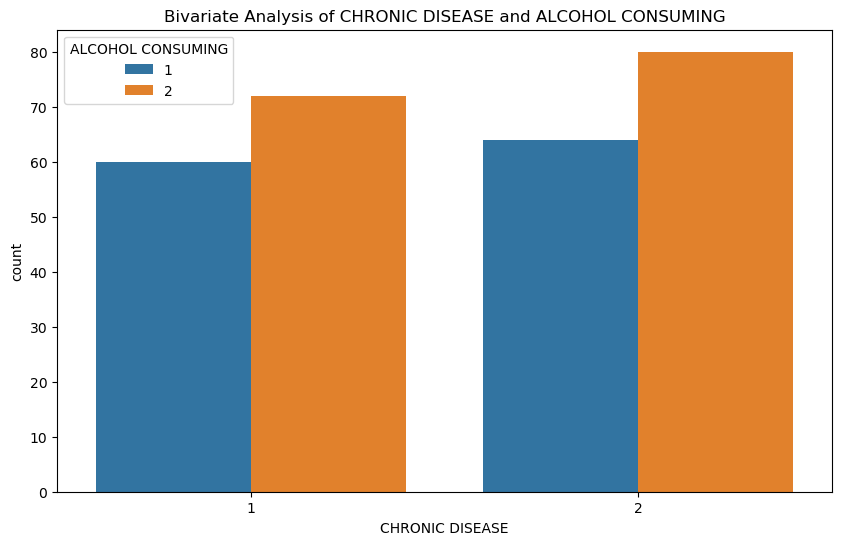

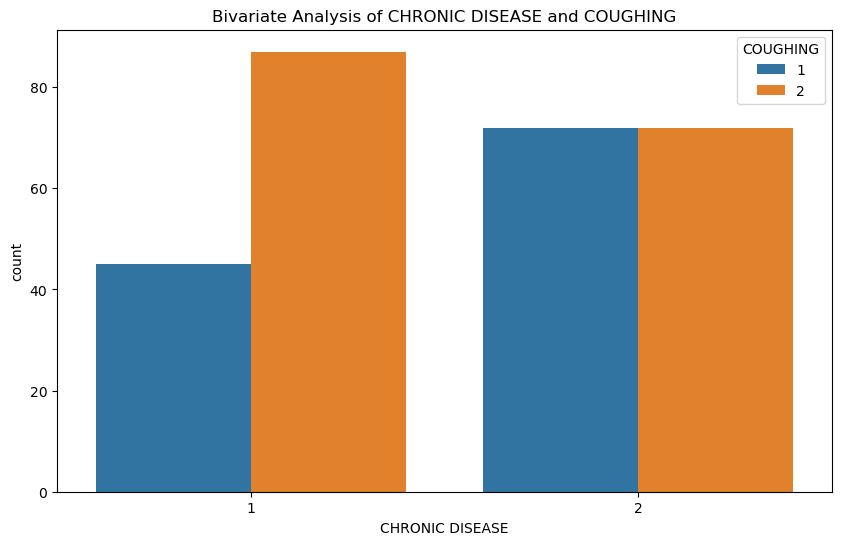

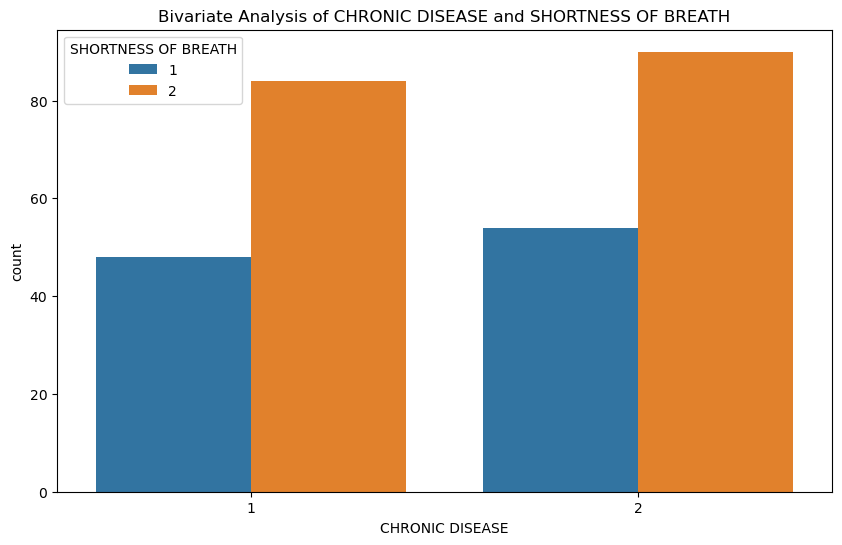

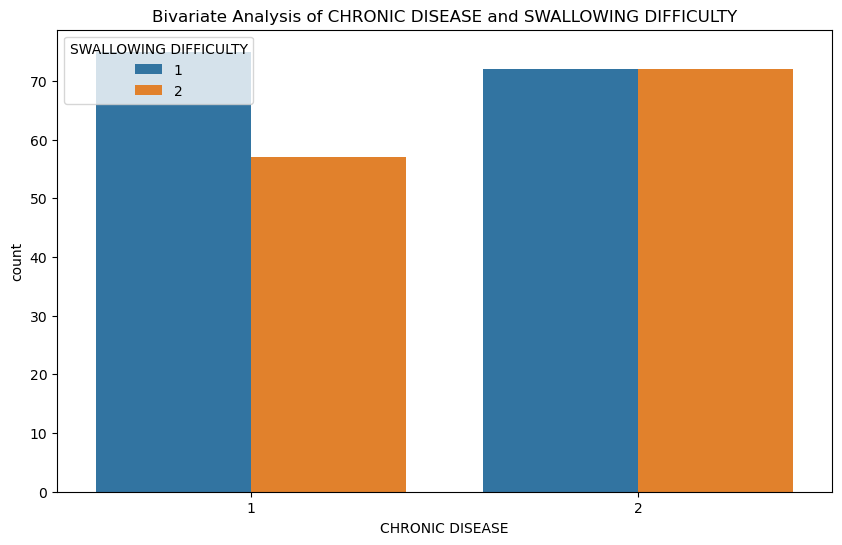

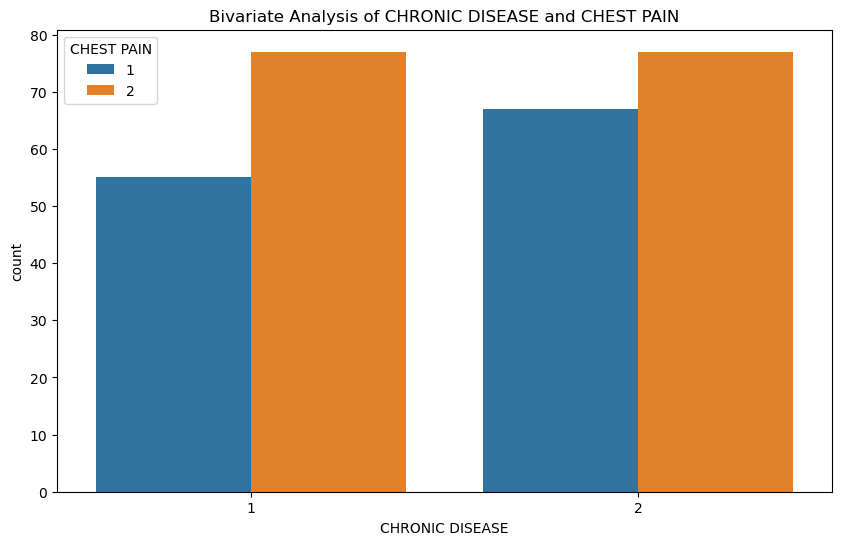

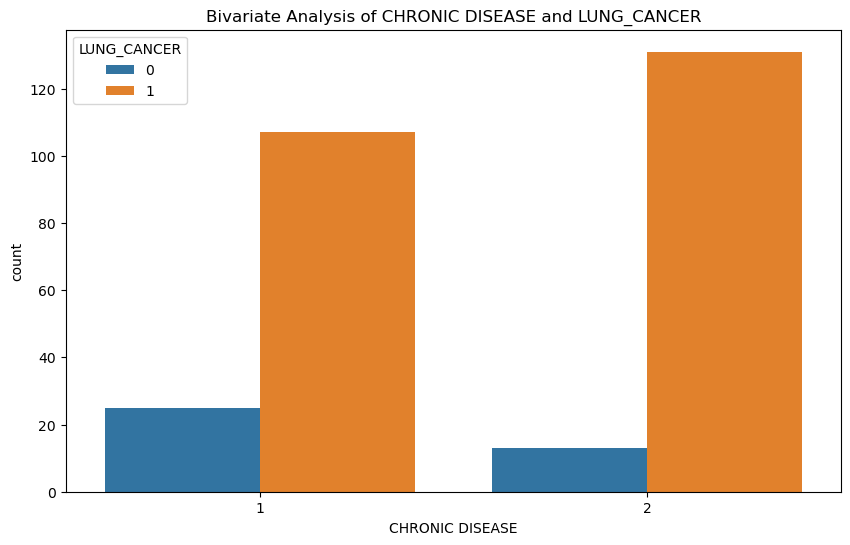

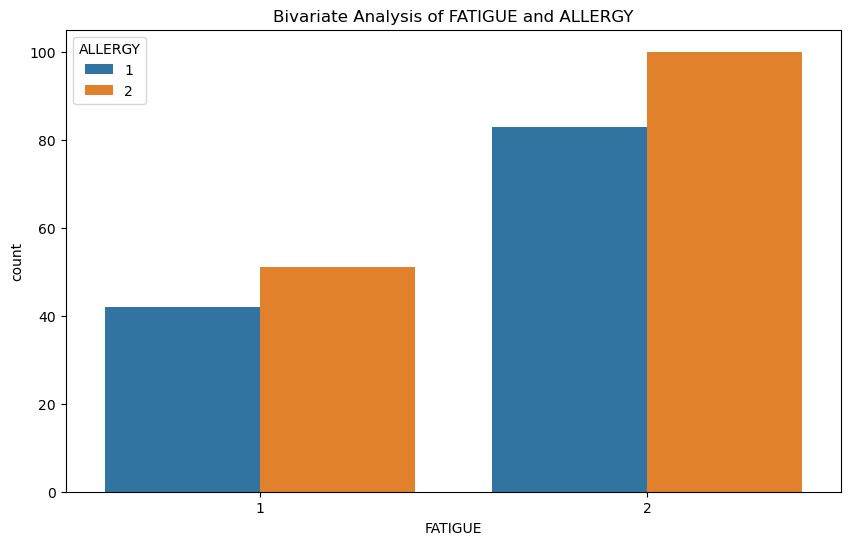

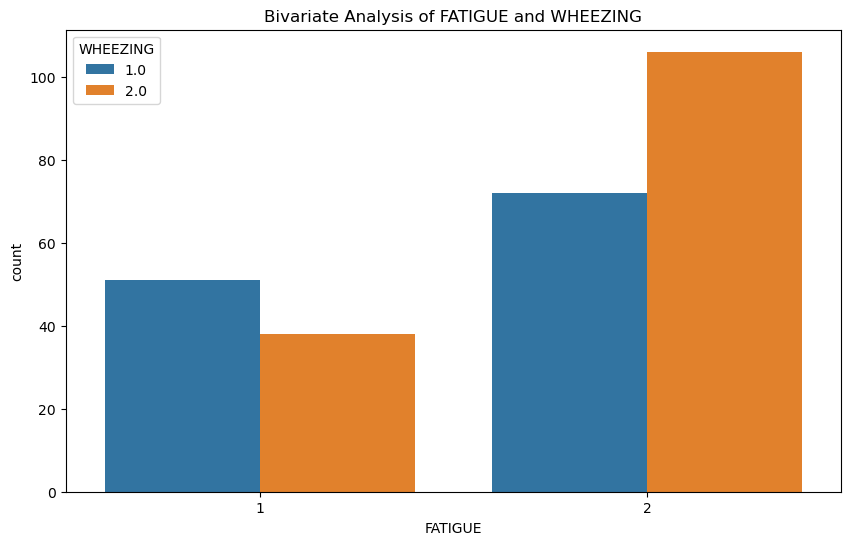

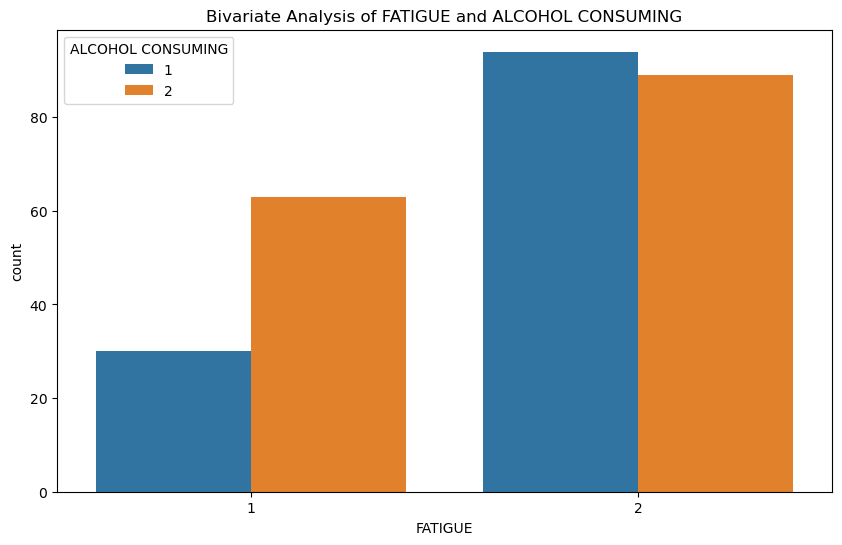

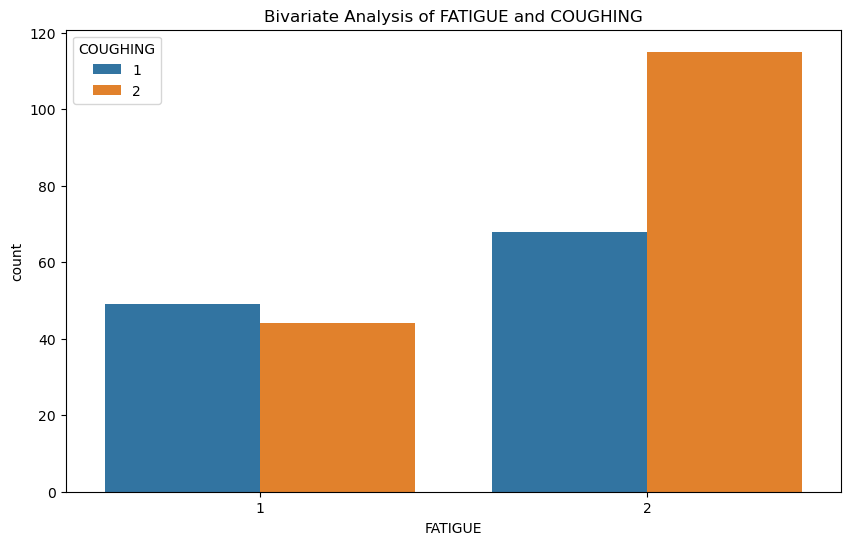

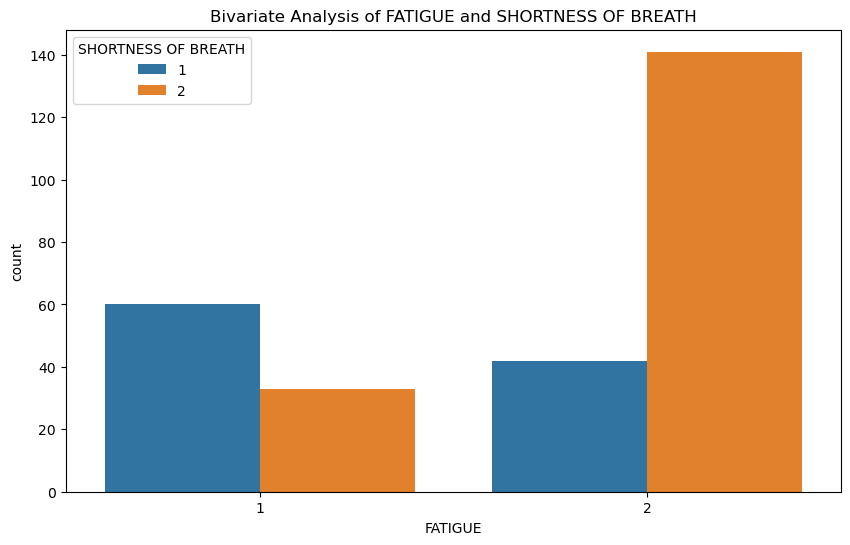

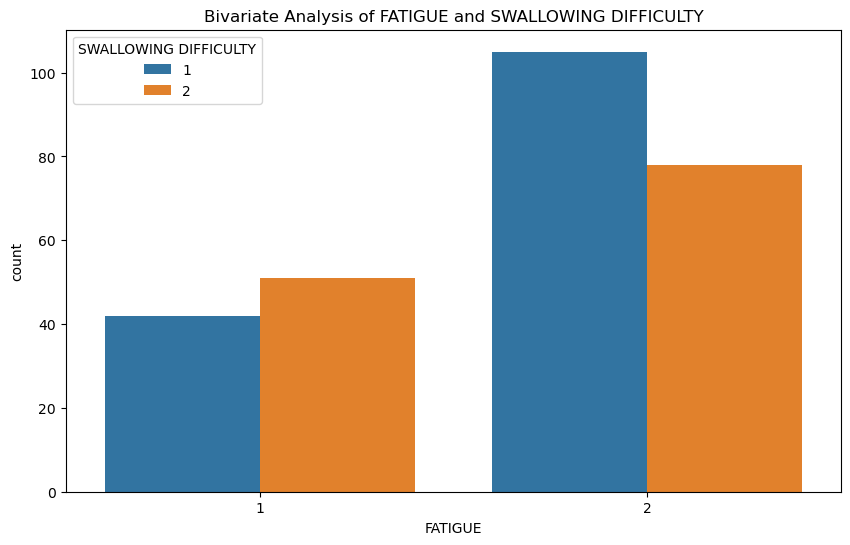

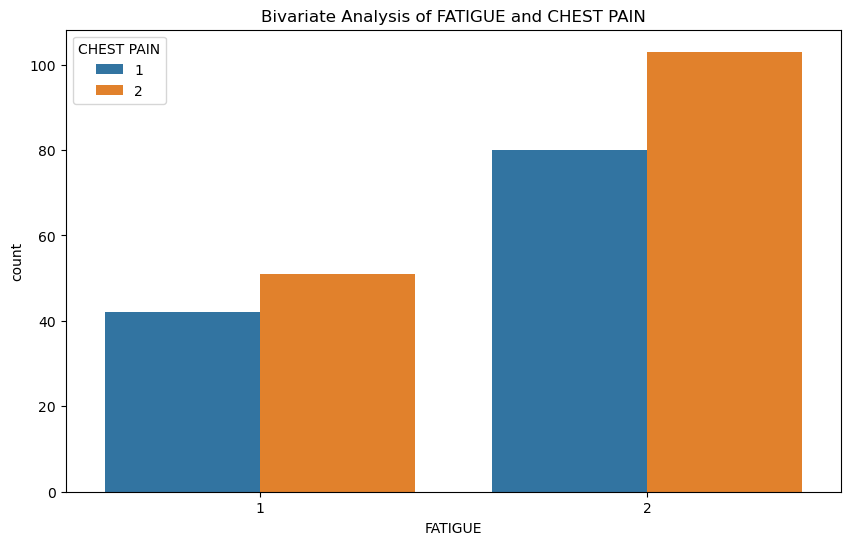

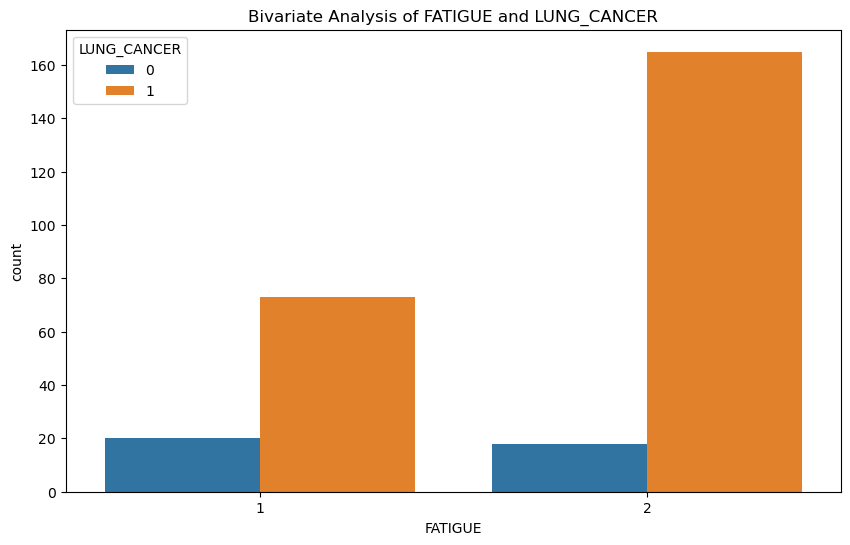

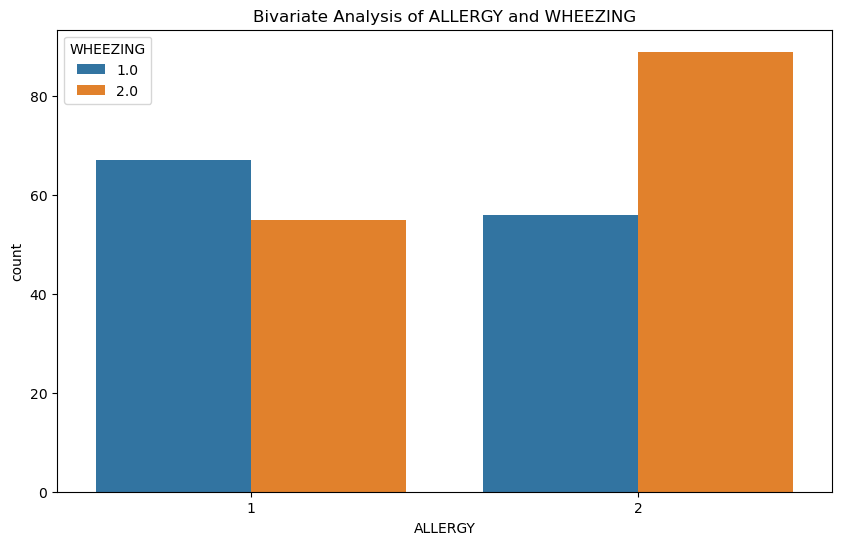

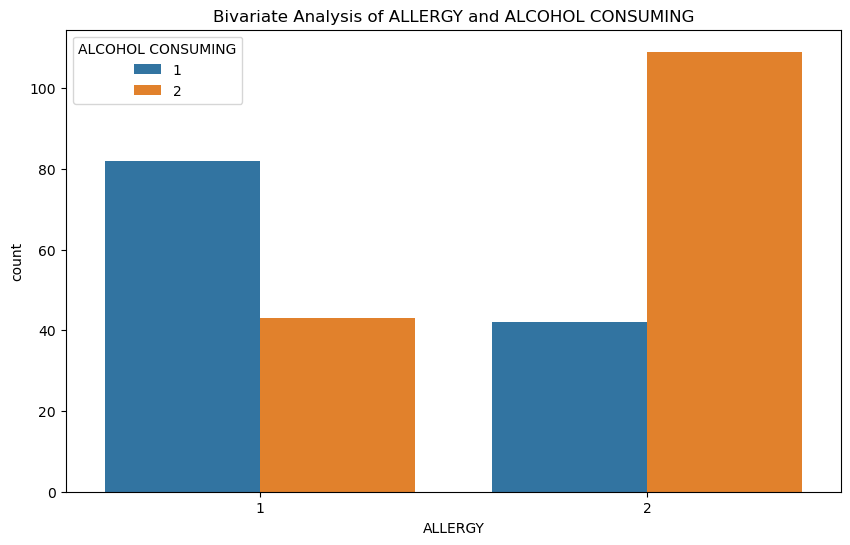

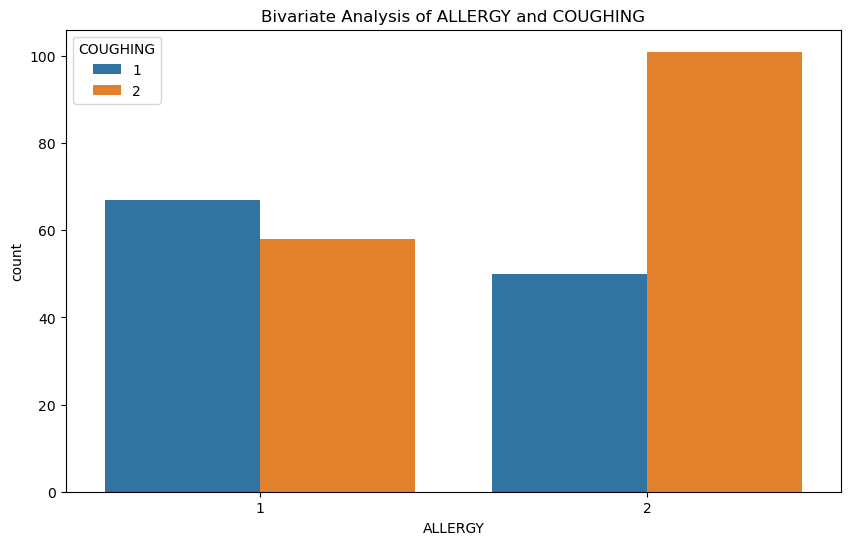

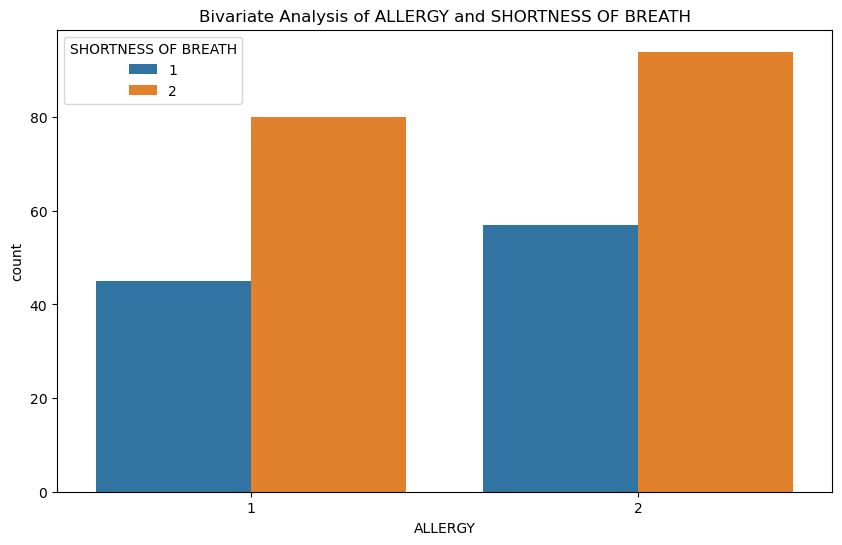

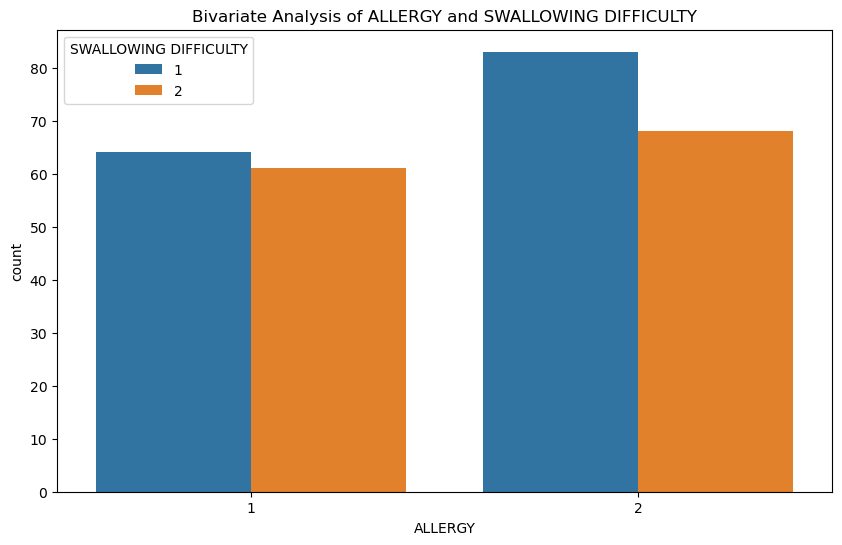

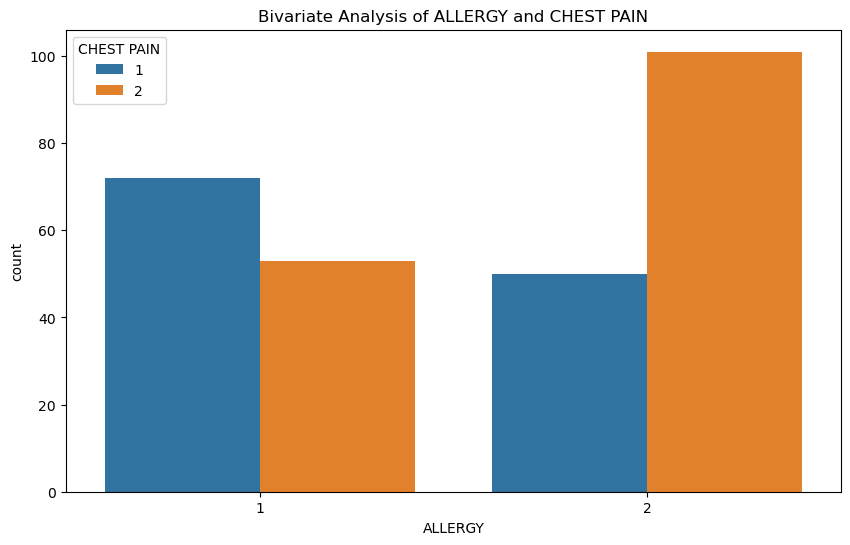

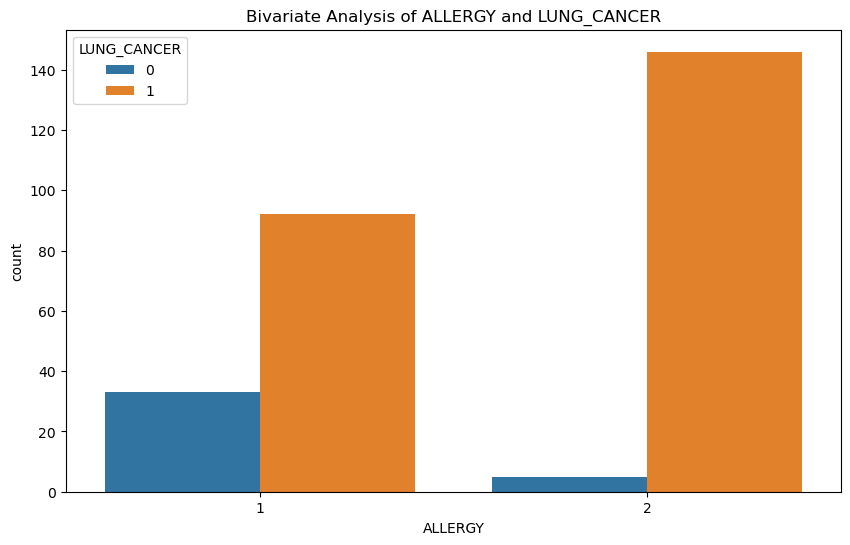

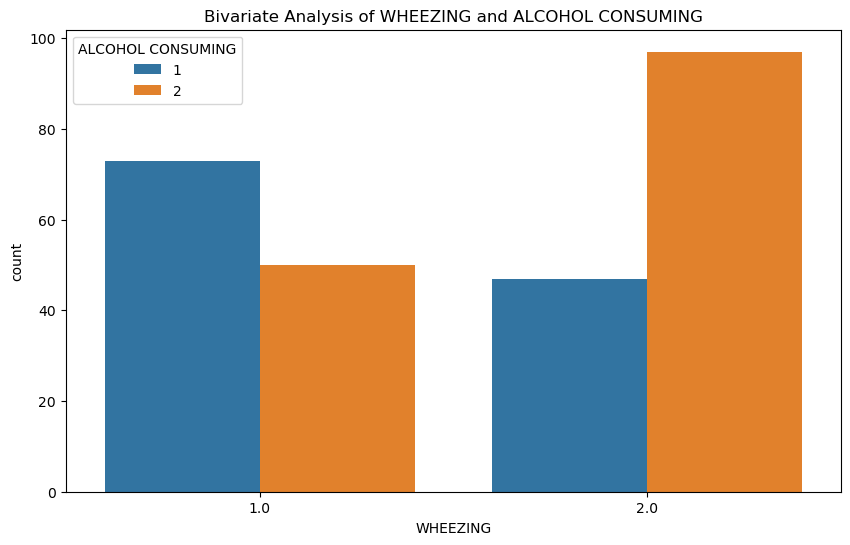

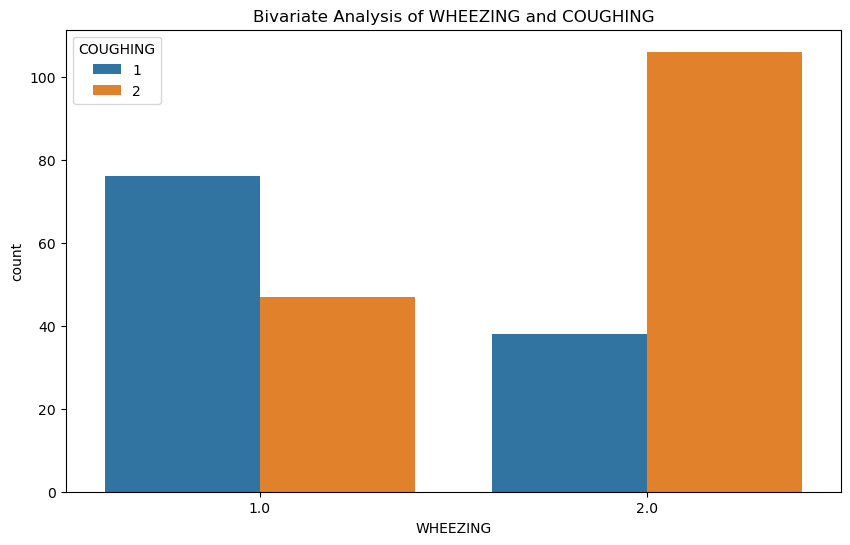

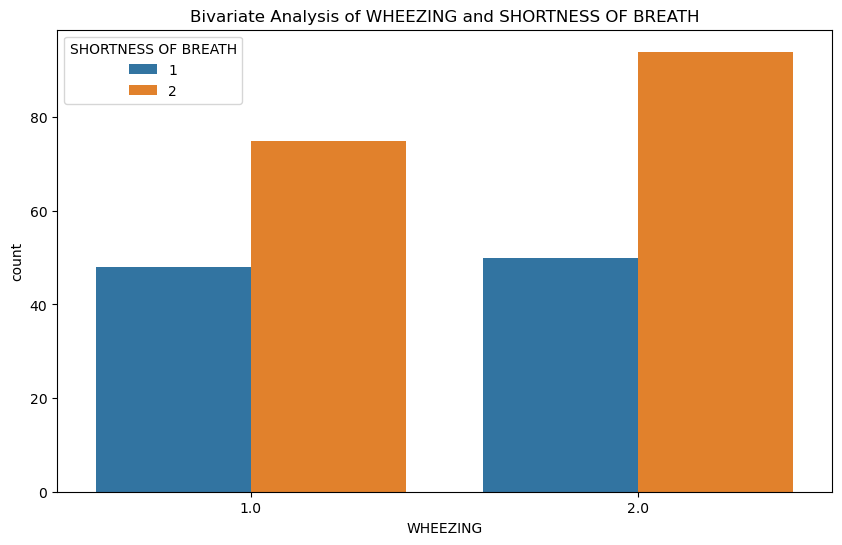

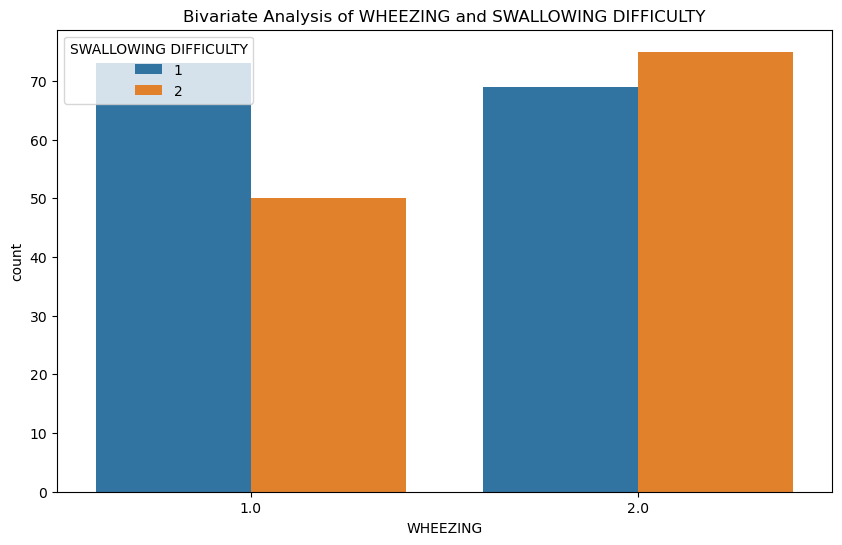

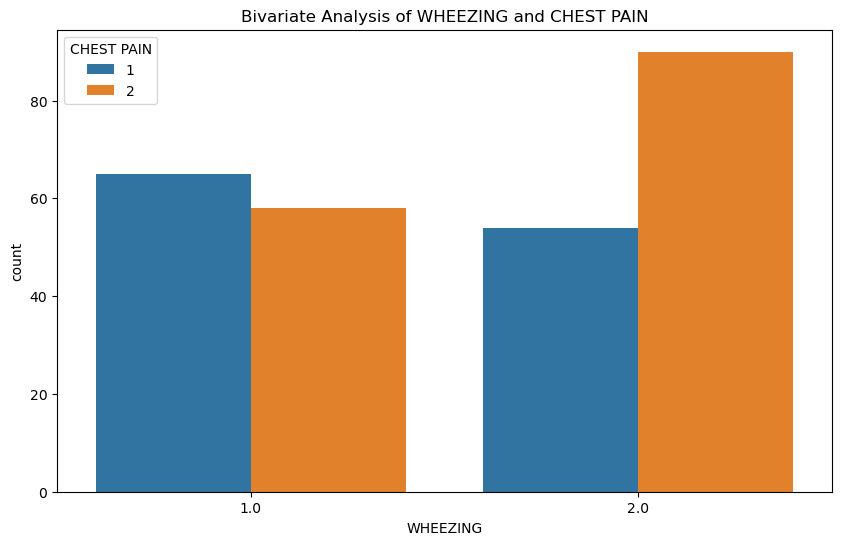

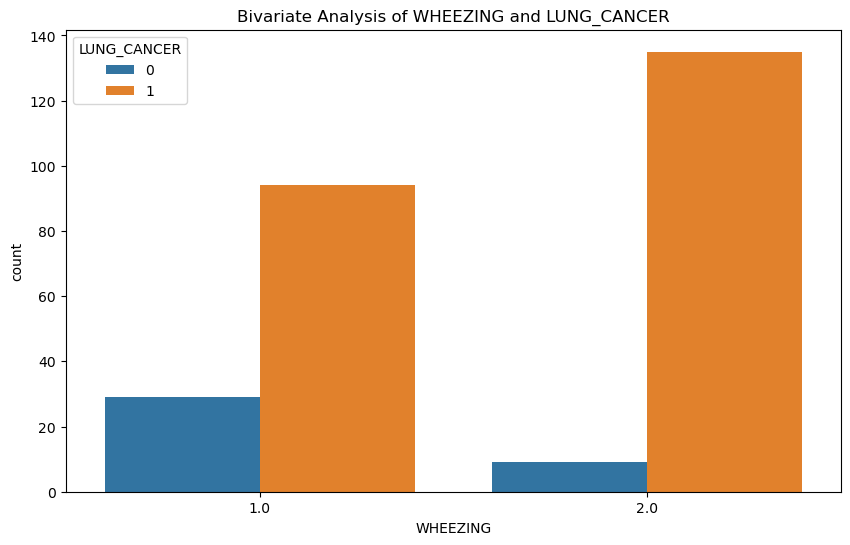

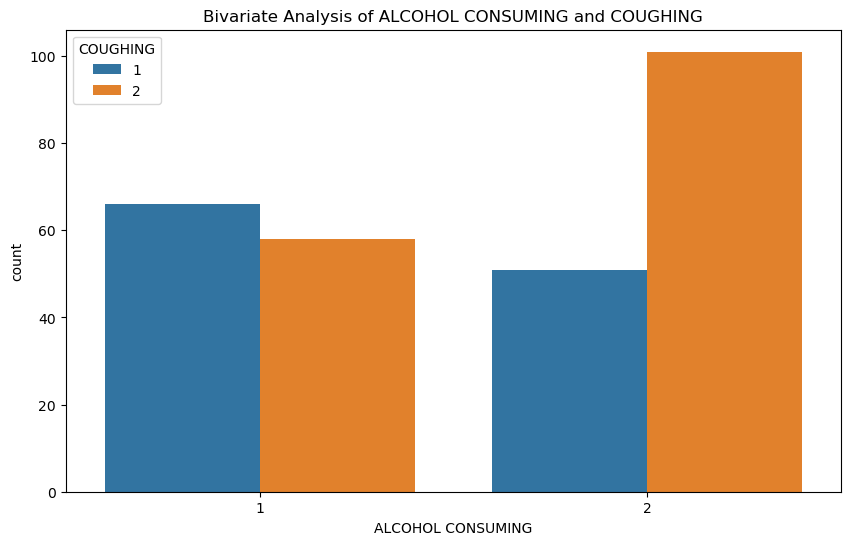

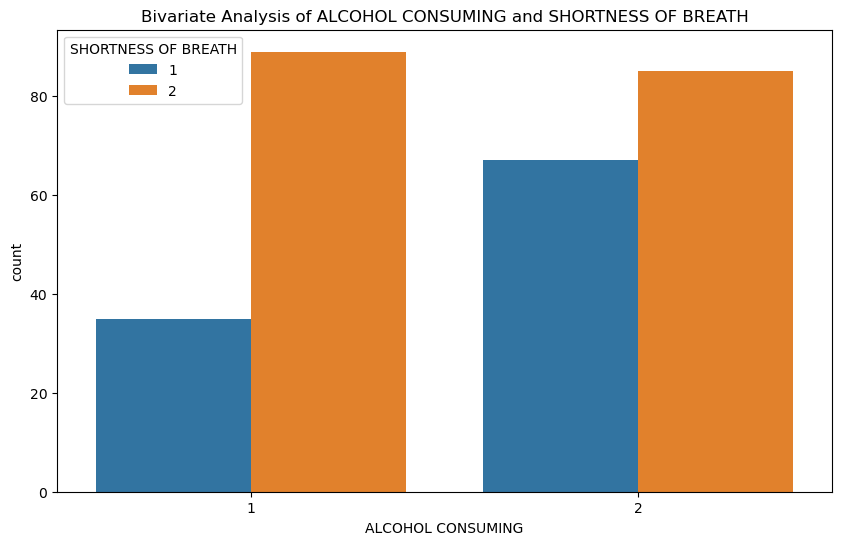

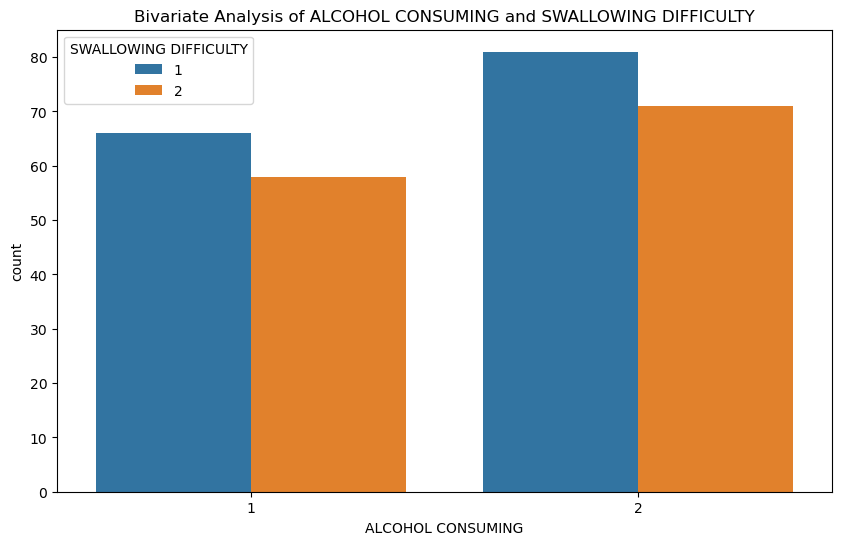

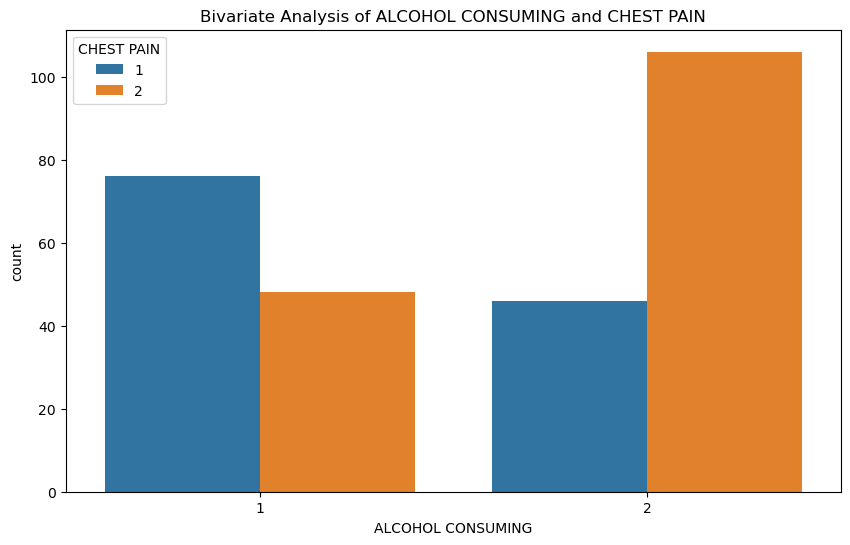

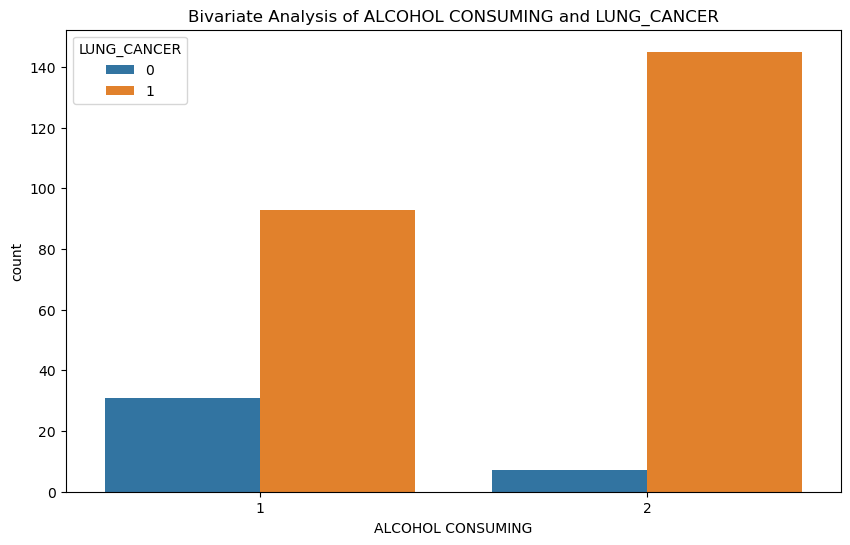

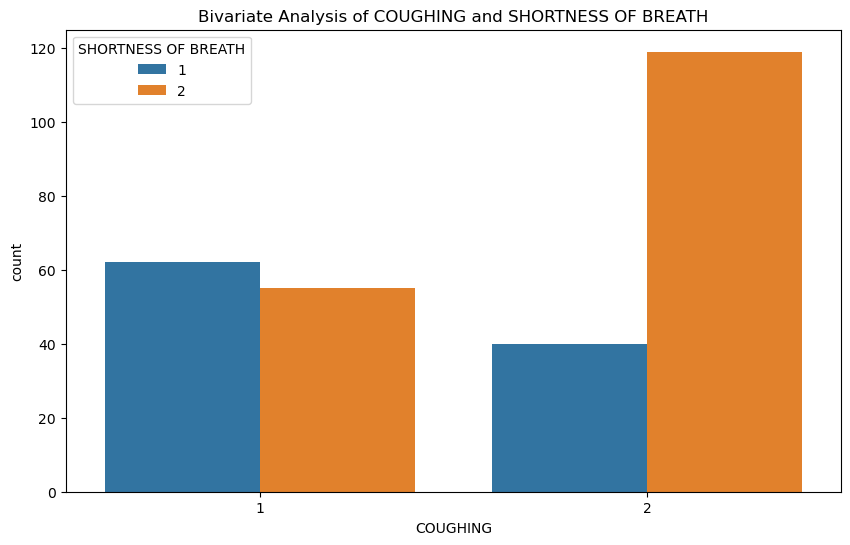

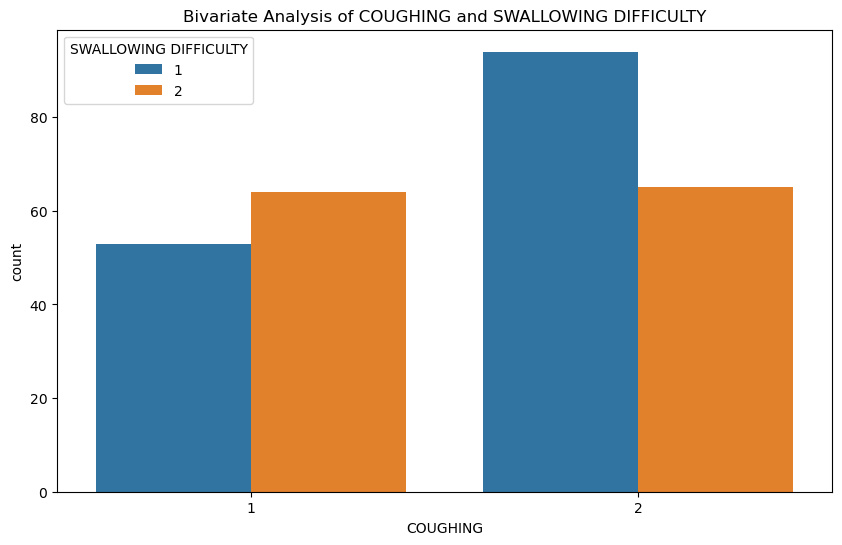

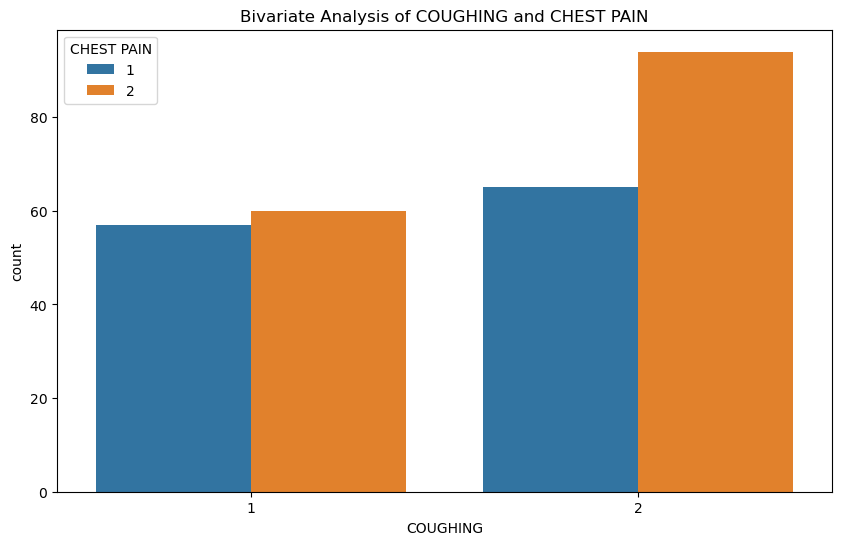

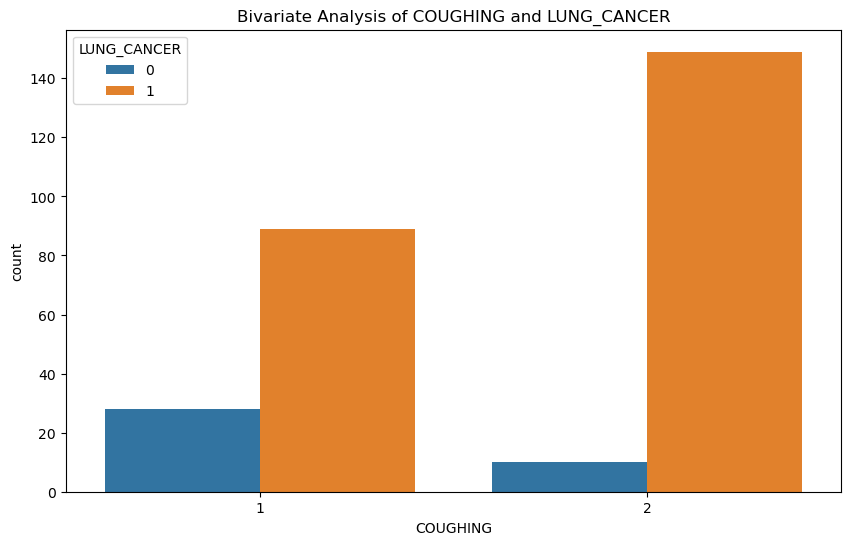

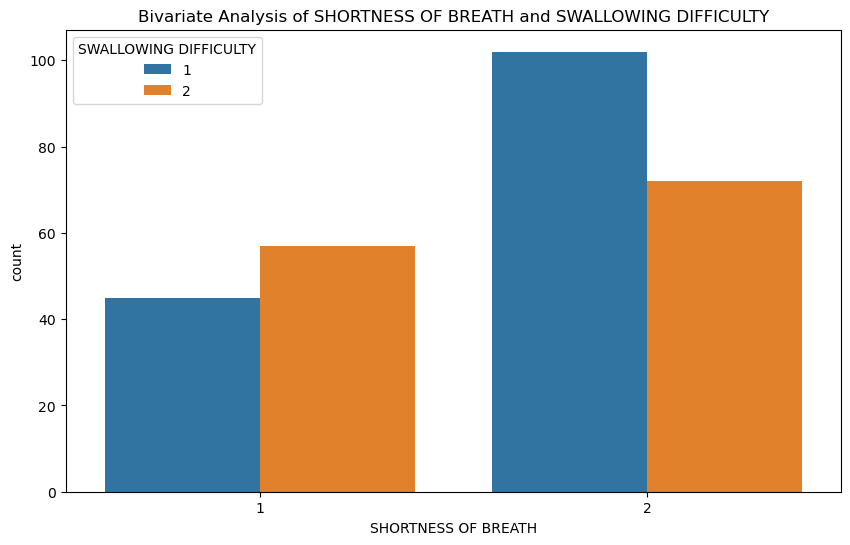

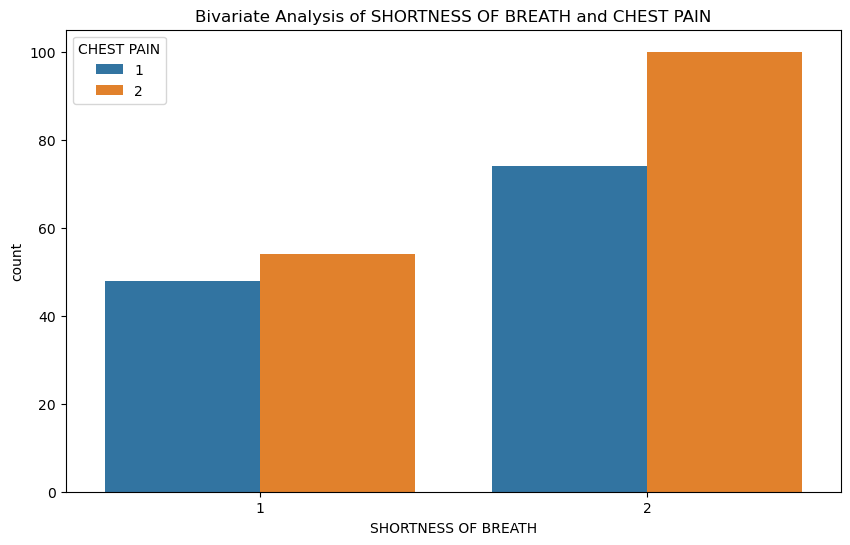

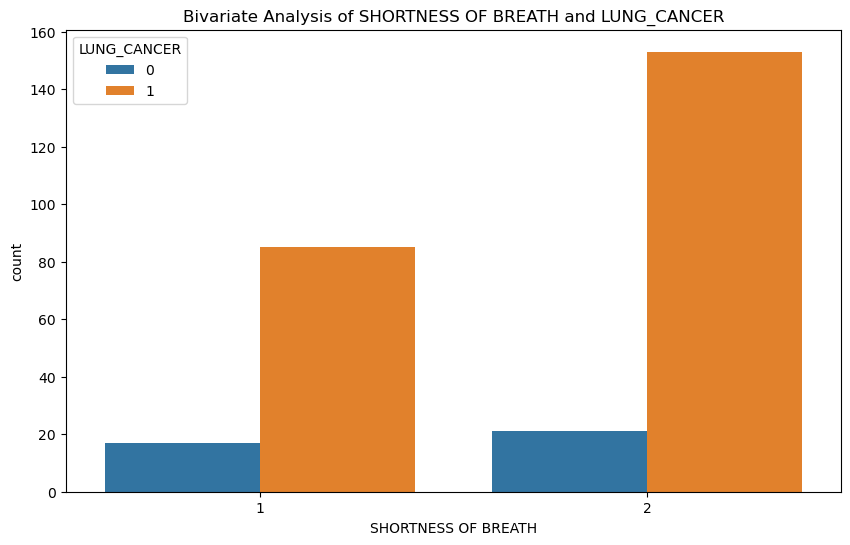

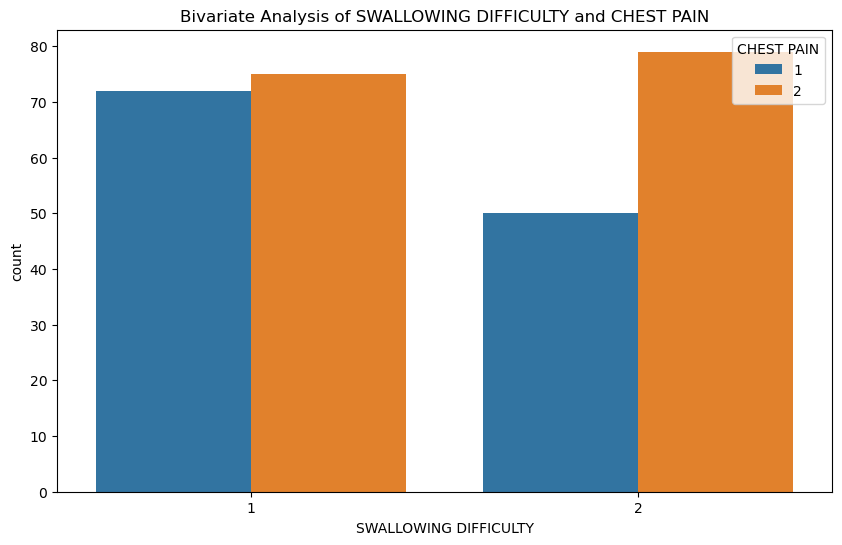

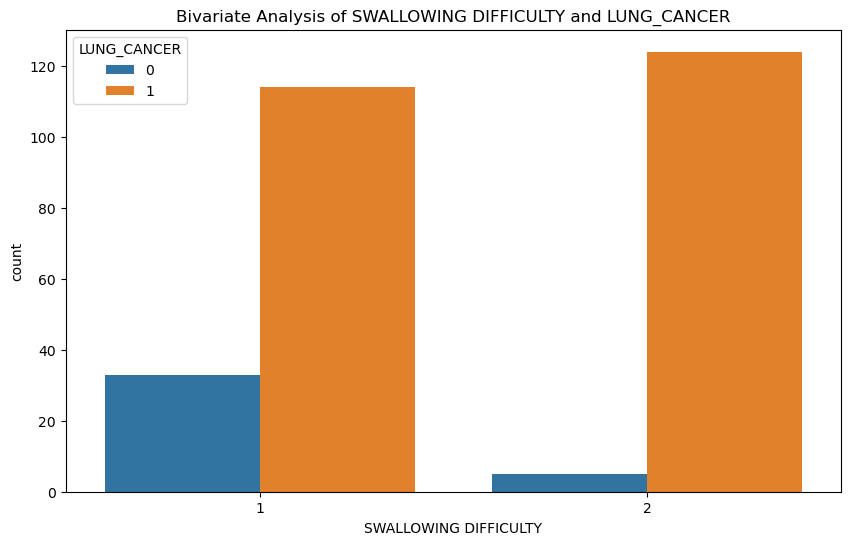

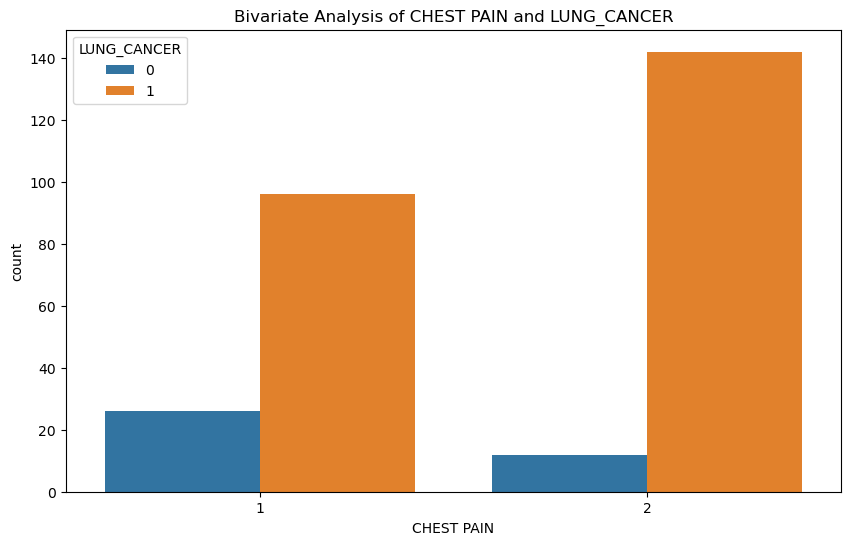

In [14]:
columns = df.columns

# Create bar plots for bivariate analysis of all columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[columns[i]], hue=df[columns[j]])
        plt.title(f'Bivariate Analysis of {columns[i]} and {columns[j]}')
        plt.show()

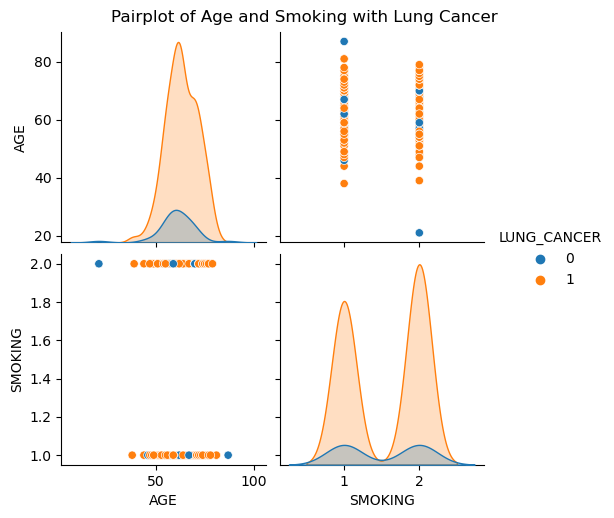

In [15]:
# pairplot for numerical variables
pairplot = sns.pairplot(df, vars=['AGE', 'SMOKING'], hue='LUNG_CANCER')
pairplot.fig.suptitle('Pairplot of Age and Smoking with Lung Cancer', y=1.02)
plt.show()

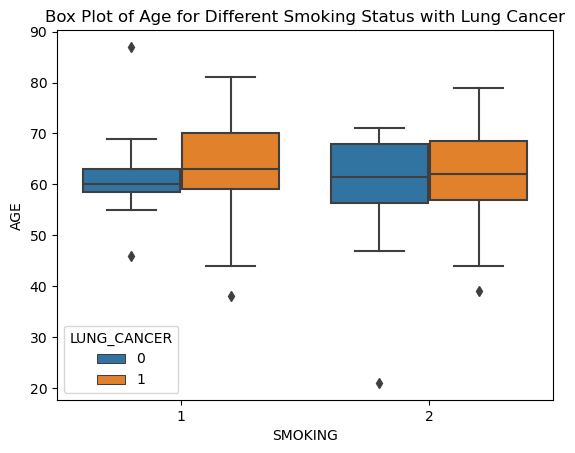

In [16]:
# Box plot for smoking
sns.boxplot(x='SMOKING', y='AGE', hue='LUNG_CANCER', data=df)
plt.title('Box Plot of Age for Different Smoking Status with Lung Cancer')
plt.show()

## Handling Missing Values -

In [17]:
# Check for missing values
missing_values = df.isnull().sum()

# Print columns with missing values
columns_with_missing_values = missing_values[missing_values > 0].index
if not columns_with_missing_values.empty:
    print("Columns with missing values:")
    for column in columns_with_missing_values:
        print(column)
else:
    print("No missing values in the dataset.")
    
missing_values

Columns with missing values:
AGE
WHEEZING


GENDER                   0
AGE                      1
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 9
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [18]:
# % of Missing Values

mis_value_percent = 100 * df.isnull().sum() / len(df)
print(mis_value_percent)

GENDER                   0.000000
AGE                      0.362319
SMOKING                  0.000000
YELLOW_FINGERS           0.000000
ANXIETY                  0.000000
PEER_PRESSURE            0.000000
CHRONIC DISEASE          0.000000
FATIGUE                  0.000000
ALLERGY                  0.000000
WHEEZING                 3.260870
ALCOHOL CONSUMING        0.000000
COUGHING                 0.000000
SHORTNESS OF BREATH      0.000000
SWALLOWING DIFFICULTY    0.000000
CHEST PAIN               0.000000
LUNG_CANCER              0.000000
dtype: float64


<AxesSubplot:>

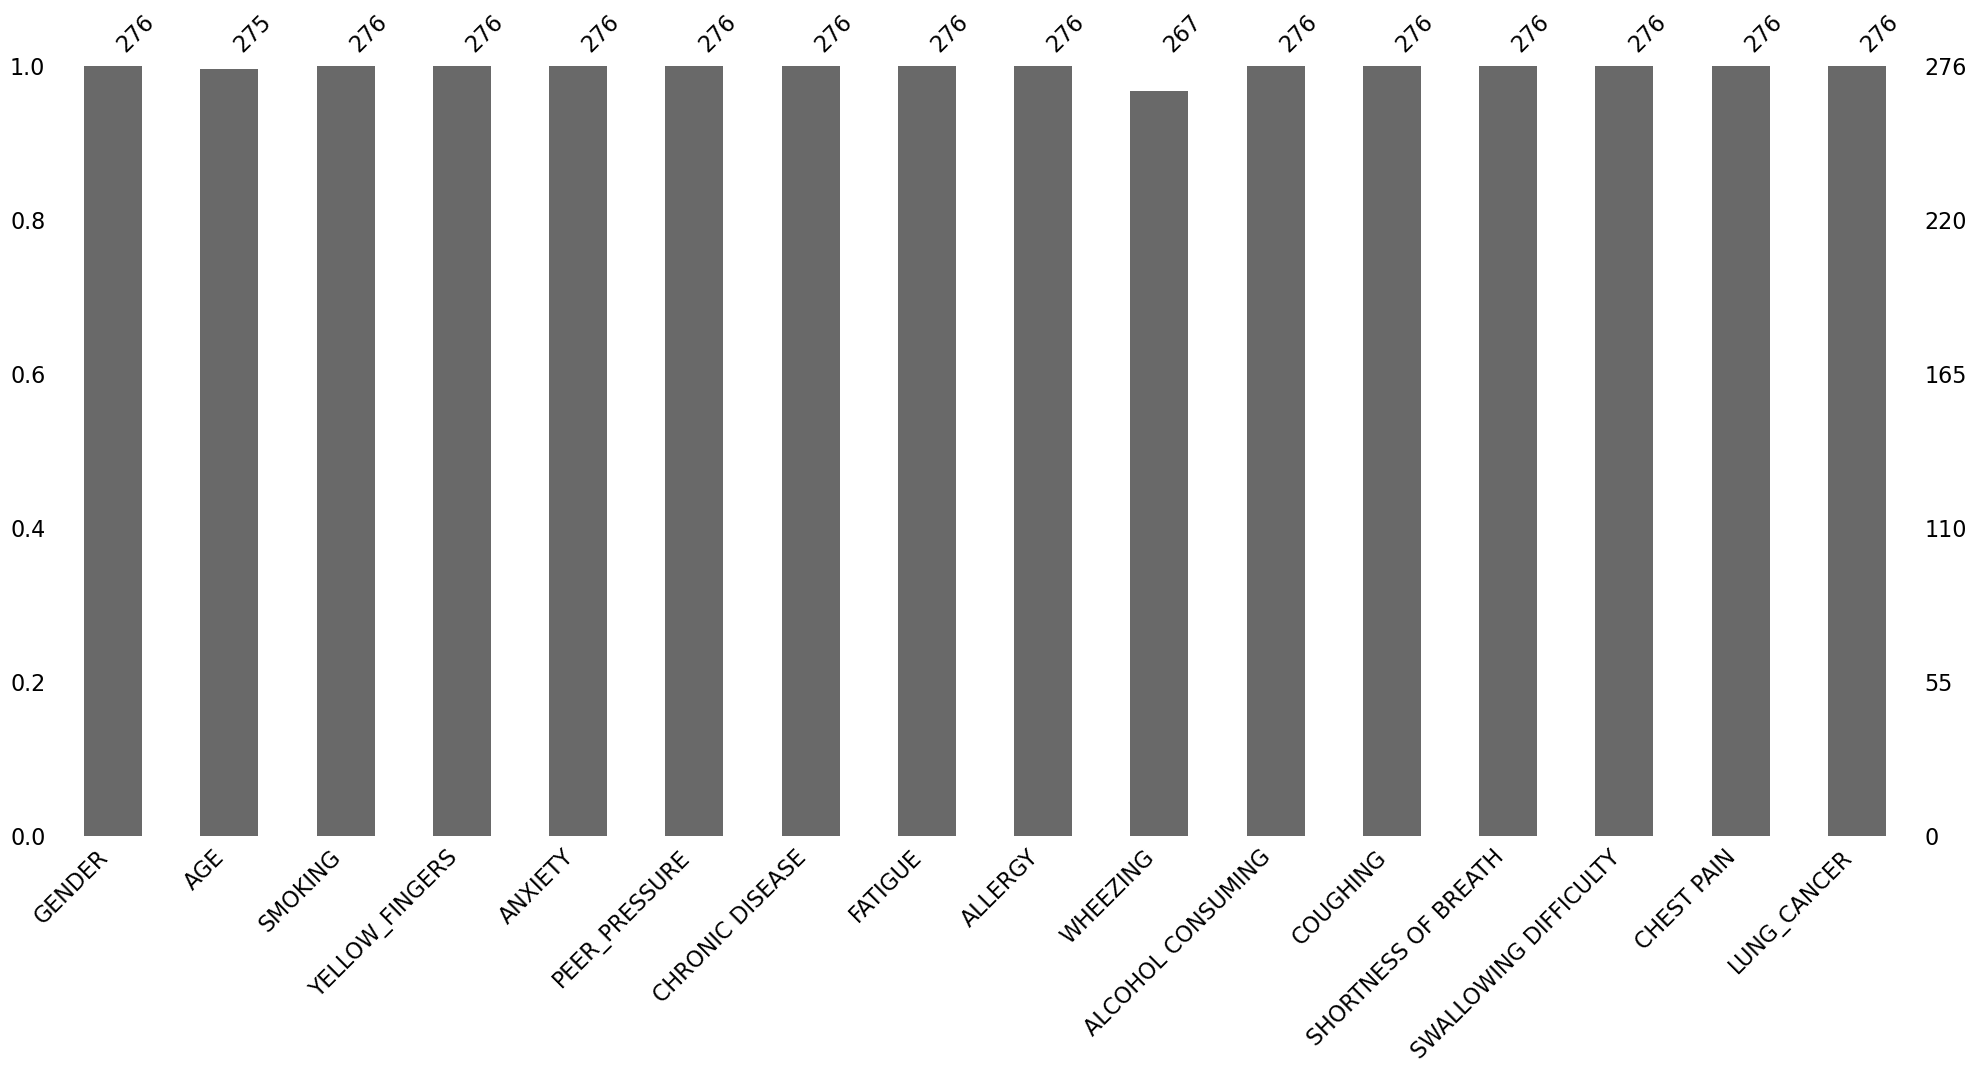

In [19]:
# Create a bar to visualize the missing values

msno.bar(df)

<AxesSubplot:>

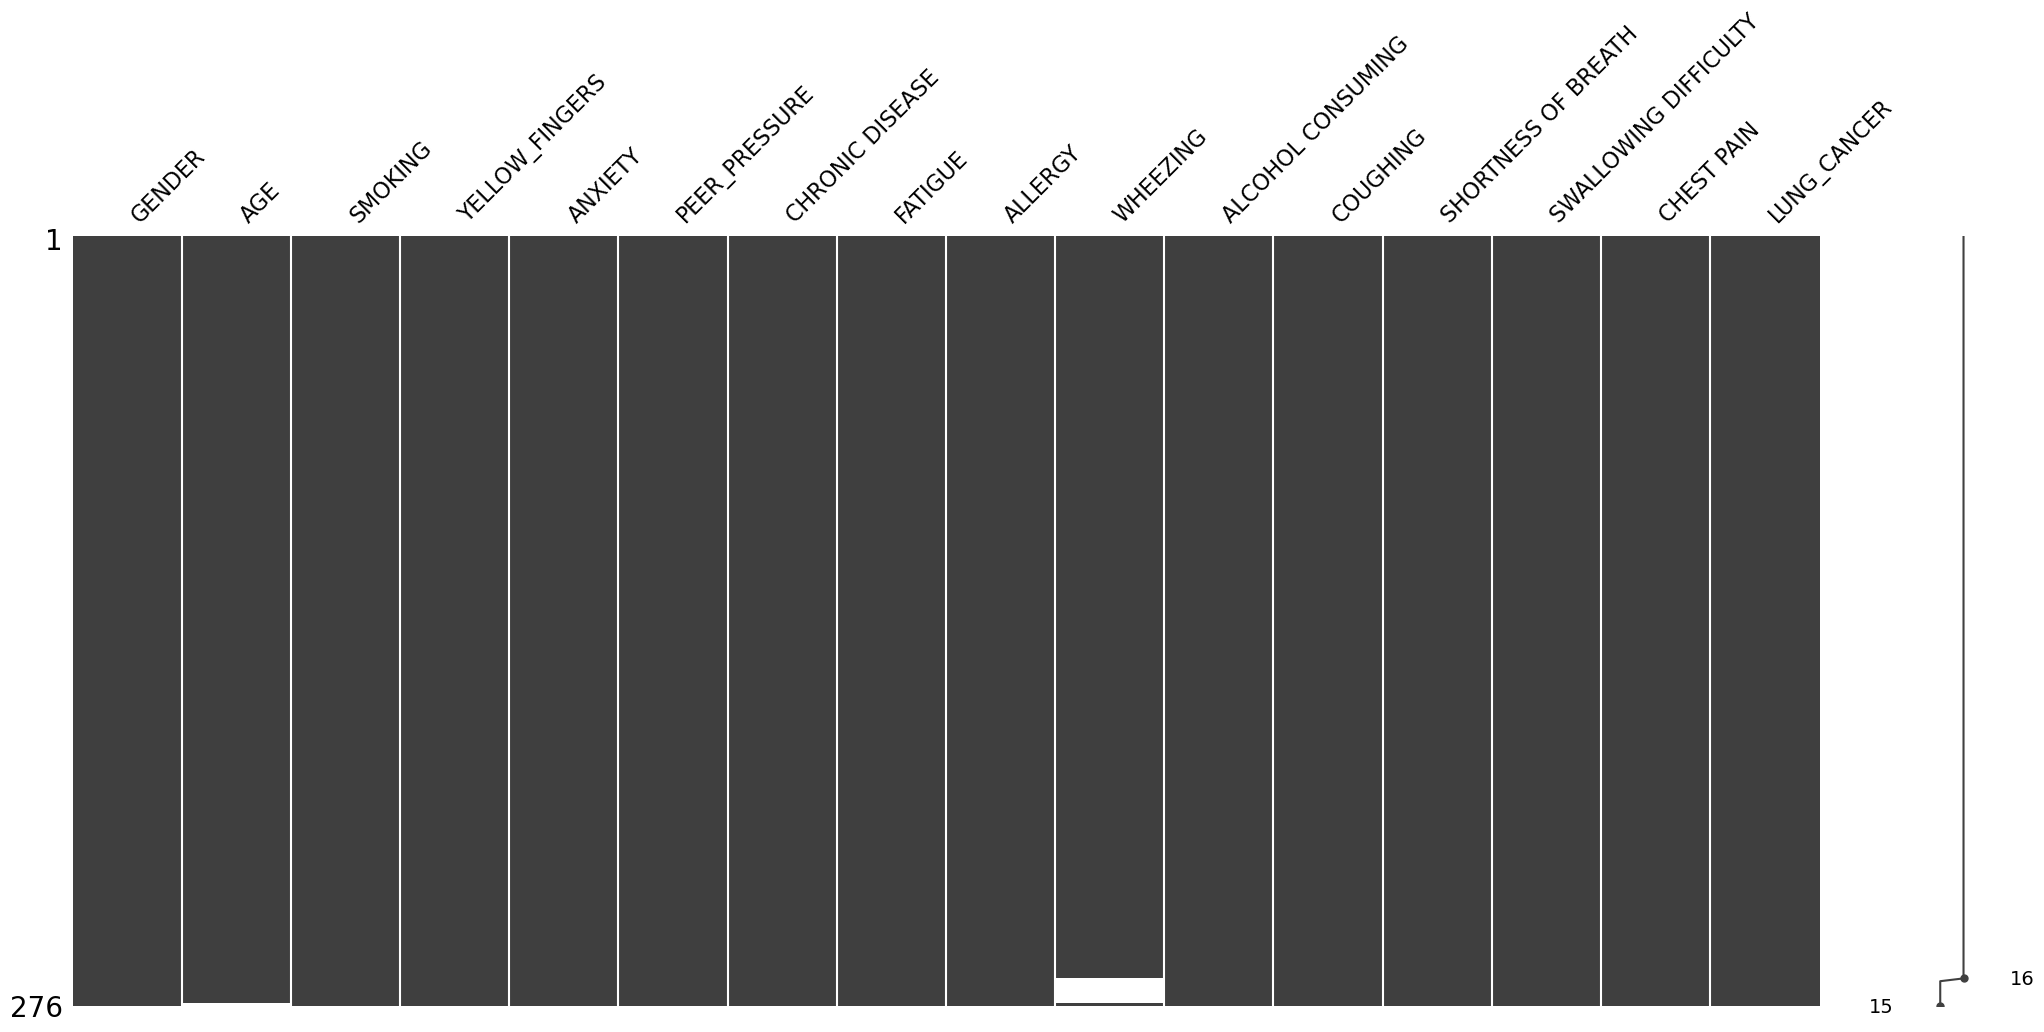

In [20]:
#Where are the Missing Values
msno.matrix(df)

<AxesSubplot:>

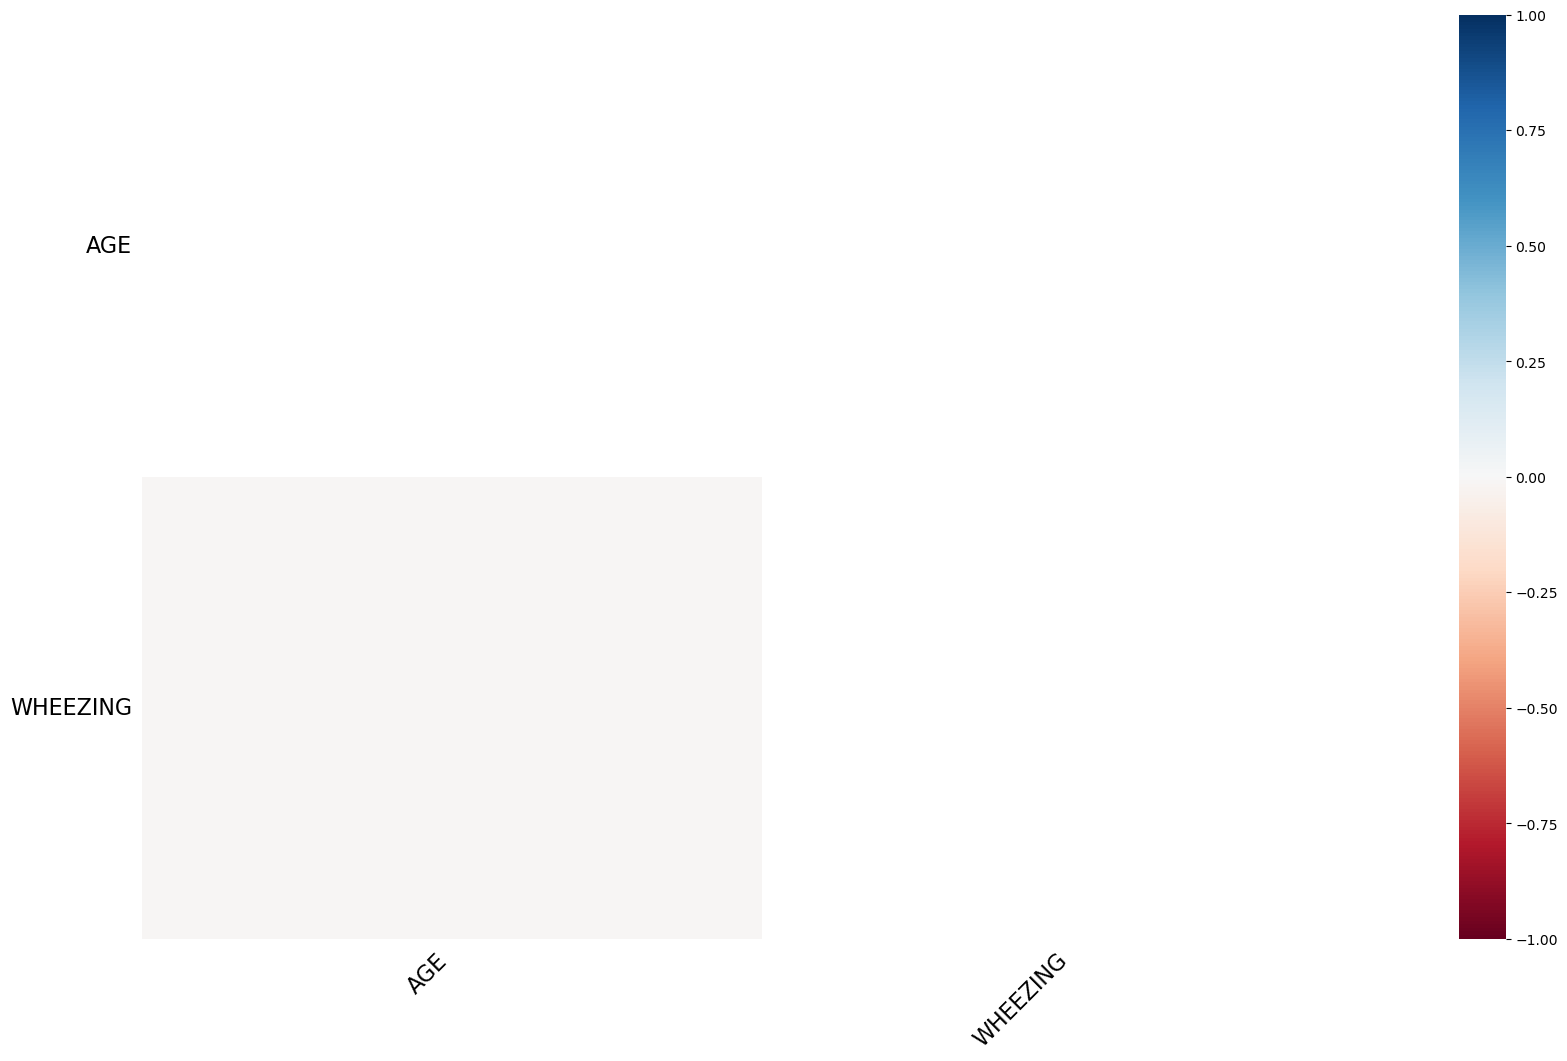

In [21]:
#Nullity correlation ranges from 
# -1 (if one variable appears the other definitely does not) to 
#  0 (variables appearing or not appearing have no effect on one another) to 
#  1 (if one variable appears the other definitely also does).


msno.heatmap(df)

<AxesSubplot:>

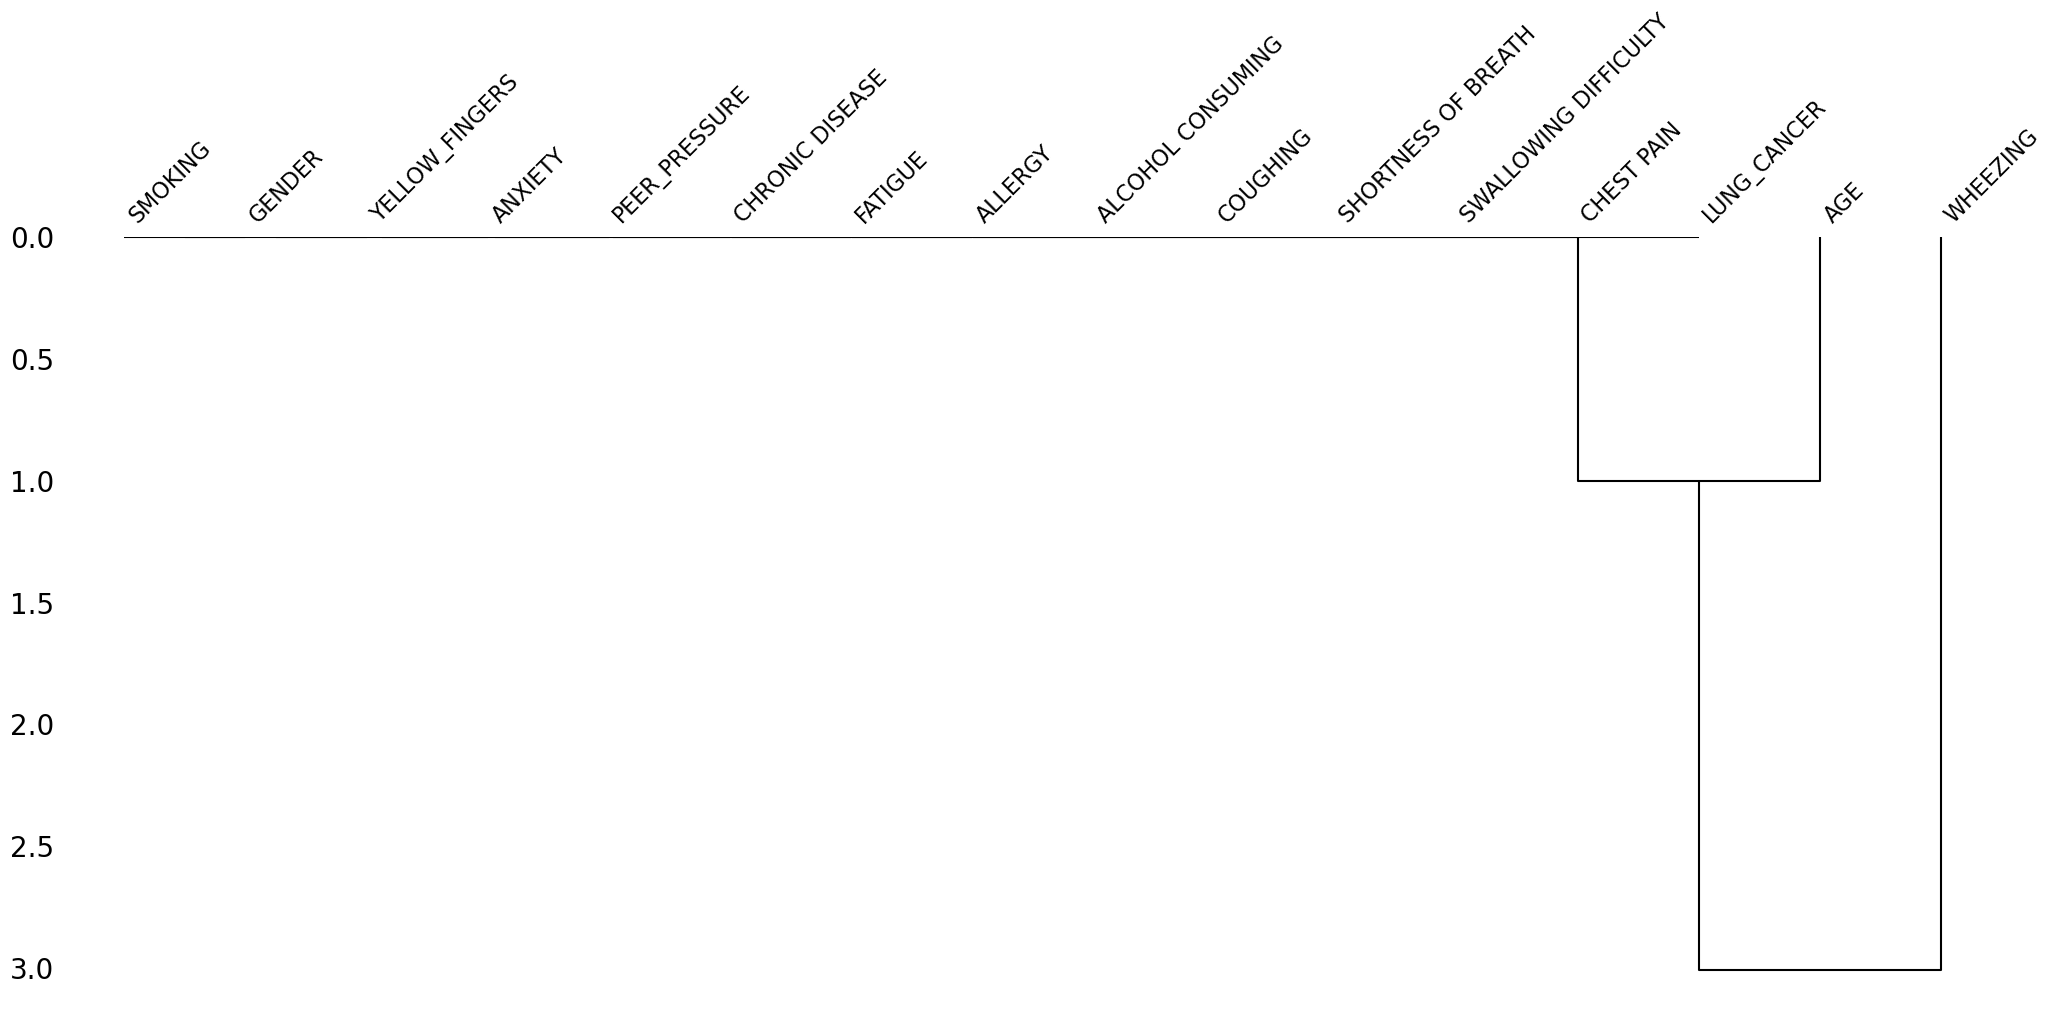

In [22]:
#A Missingno dendogram is a tree diagram of missingness. It groups the highly correlated variables together.


msno.dendrogram(df)

In [23]:
# filling missing values in AGE column

median_age = df['AGE'].median()
df['AGE'].fillna(median_age, inplace=True)
df

C:\Users\pubgp\AppData\Local\Temp\ipykernel_20924\2847113957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE'].fillna(median_age, inplace=True)


GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1  39.0        2               1        1              2   
1         1  44.0        1               2        1              2   
2         0  59.0        1               1        1              2   
3         1  46.0        1               2        2              1   
4         0  63.0        1               2        1              1   
..      ...   ...      ...             ...      ...            ...   
303       1  77.0        1               2        1              2   
305       1  77.0        2               2        2              1   
306       1  78.0        1               2        1              2   
307       1  79.0        2               1        1              1   
308       1  62.0        2               2        2              1   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                  1        2        2       2.0                  2         1   
1                  2        2        1       2.0                  1         1   
2                  1        2        1       2.0                  1         2   
3                  1        1        1       1.0                  1         1   
4                  1        1        1       2.0                  1         2   
..               ...      ...      ...       ...                ...       ...   
303                1        2        2       NaN                  2         2   
305                2        1        2       NaN                  1         1   
306                2        2        1       NaN                  1         1   
307                2        2        2       NaN                  2         2   
308                1        1        1       1.0                  2         1   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                      2                      1           2            1  
1                      2                      2           2            1  
2                      2                      1           2            0  
3                      1                      2           2            0  
4                      2                      1           1            0  
..                   ...                    ...         ...          ...  
303                    1                      1           1            1  
305                    1                      2           2            1  
306                    2                      2           2            1  
307                    2                      2           2            1  
308                    1                      2           2            0  

[276 rows x 16 columns]

In [24]:
# filling missing values in categorical column WHEEZING
mode_category = df['WHEEZING'].mode().iloc[0]

# Fill missing values in the categorical column with the mode
df['WHEEZING'].fillna(mode_category, inplace=True)
df

C:\Users\pubgp\AppData\Local\Temp\ipykernel_20924\512678946.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WHEEZING'].fillna(mode_category, inplace=True)


GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1  39.0        2               1        1              2   
1         1  44.0        1               2        1              2   
2         0  59.0        1               1        1              2   
3         1  46.0        1               2        2              1   
4         0  63.0        1               2        1              1   
..      ...   ...      ...             ...      ...            ...   
303       1  77.0        1               2        1              2   
305       1  77.0        2               2        2              1   
306       1  78.0        1               2        1              2   
307       1  79.0        2               1        1              1   
308       1  62.0        2               2        2              1   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                  1        2        2       2.0                  2         1   
1                  2        2        1       2.0                  1         1   
2                  1        2        1       2.0                  1         2   
3                  1        1        1       1.0                  1         1   
4                  1        1        1       2.0                  1         2   
..               ...      ...      ...       ...                ...       ...   
303                1        2        2       2.0                  2         2   
305                2        1        2       2.0                  1         1   
306                2        2        1       2.0                  1         1   
307                2        2        2       2.0                  2         2   
308                1        1        1       1.0                  2         1   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                      2                      1           2            1  
1                      2                      2           2            1  
2                      2                      1           2            0  
3                      1                      2           2            0  
4                      2                      1           1            0  
..                   ...                    ...         ...          ...  
303                    1                      1           1            1  
305                    1                      2           2            1  
306                    2                      2           2            1  
307                    2                      2           2            1  
308                    1                      2           2            0  

[276 rows x 16 columns]

In [25]:
# converting floats to integer
float_columns = df.select_dtypes(include=['float']).columns

# Convert float columns to integers
df[float_columns] = df[float_columns].astype(int)
df

C:\Users\pubgp\AppData\Local\Temp\ipykernel_20924\687143484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[float_columns] = df[float_columns].astype(int)


GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   39        2               1        1              2   
1         1   44        1               2        1              2   
2         0   59        1               1        1              2   
3         1   46        1               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
303       1   77        1               2        1              2   
305       1   77        2               2        2              1   
306       1   78        1               2        1              2   
307       1   79        2               1        1              1   
308       1   62        2               2        2              1   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                  1        2        2         2                  2         1   
1                  2        2        1         2                  1         1   
2                  1        2        1         2                  1         2   
3                  1        1        1         1                  1         1   
4                  1        1        1         2                  1         2   
..               ...      ...      ...       ...                ...       ...   
303                1        2        2         2                  2         2   
305                2        1        2         2                  1         1   
306                2        2        1         2                  1         1   
307                2        2        2         2                  2         2   
308                1        1        1         1                  2         1   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                      2                      1           2            1  
1                      2                      2           2            1  
2                      2                      1           2            0  
3                      1                      2           2            0  
4                      2                      1           1            0  
..                   ...                    ...         ...          ...  
303                    1                      1           1            1  
305                    1                      2           2            1  
306                    2                      2           2            1  
307                    2                      2           2            1  
308                    1                      2           2            0  

[276 rows x 16 columns]

In [26]:
# Simply Label Encode :) - Easy stuff
df['SMOKING']= le.fit_transform(df['SMOKING'])
df

C:\Users\pubgp\AppData\Local\Temp\ipykernel_20924\1747675234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMOKING']= le.fit_transform(df['SMOKING'])


GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   39        1               1        1              2   
1         1   44        0               2        1              2   
2         0   59        0               1        1              2   
3         1   46        0               2        2              1   
4         0   63        0               2        1              1   
..      ...  ...      ...             ...      ...            ...   
303       1   77        0               2        1              2   
305       1   77        1               2        2              1   
306       1   78        0               2        1              2   
307       1   79        1               1        1              1   
308       1   62        1               2        2              1   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                  1        2        2         2                  2         1   
1                  2        2        1         2                  1         1   
2                  1        2        1         2                  1         2   
3                  1        1        1         1                  1         1   
4                  1        1        1         2                  1         2   
..               ...      ...      ...       ...                ...       ...   
303                1        2        2         2                  2         2   
305                2        1        2         2                  1         1   
306                2        2        1         2                  1         1   
307                2        2        2         2                  2         2   
308                1        1        1         1                  2         1   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                      2                      1           2            1  
1                      2                      2           2            1  
2                      2                      1           2            0  
3                      1                      2           2            0  
4                      2                      1           1            0  
..                   ...                    ...         ...          ...  
303                    1                      1           1            1  
305                    1                      2           2            1  
306                    2                      2           2            1  
307                    2                      2           2            1  
308                    1                      2           2            0  

[276 rows x 16 columns]

In [27]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
                     'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
                     'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    
df

C:\Users\pubgp\AppData\Local\Temp\ipykernel_20924\500289043.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])


GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   39        1               0        0              1   
1         1   44        0               1        0              1   
2         0   59        0               0        0              1   
3         1   46        0               1        1              0   
4         0   63        0               1        0              0   
..      ...  ...      ...             ...      ...            ...   
303       1   77        0               1        0              1   
305       1   77        1               1        1              0   
306       1   78        0               1        0              1   
307       1   79        1               0        0              0   
308       1   62        1               1        1              0   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                  0        1        1         1                  1         0   
1                  1        1        0         1                  0         0   
2                  0        1        0         1                  0         1   
3                  0        0        0         0                  0         0   
4                  0        0        0         1                  0         1   
..               ...      ...      ...       ...                ...       ...   
303                0        1        1         1                  1         1   
305                1        0        1         1                  0         0   
306                1        1        0         1                  0         0   
307                1        1        1         1                  1         1   
308                0        0        0         0                  1         0   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                      1                      0           1            1  
1                      1                      1           1            1  
2                      1                      0           1            0  
3                      0                      1           1            0  
4                      1                      0           0            0  
..                   ...                    ...         ...          ...  
303                    0                      0           0            1  
305                    0                      1           1            1  
306                    1                      1           1            1  
307                    1                      1           1            1  
308                    0                      1           1            0  

[276 rows x 16 columns]

## Outliers

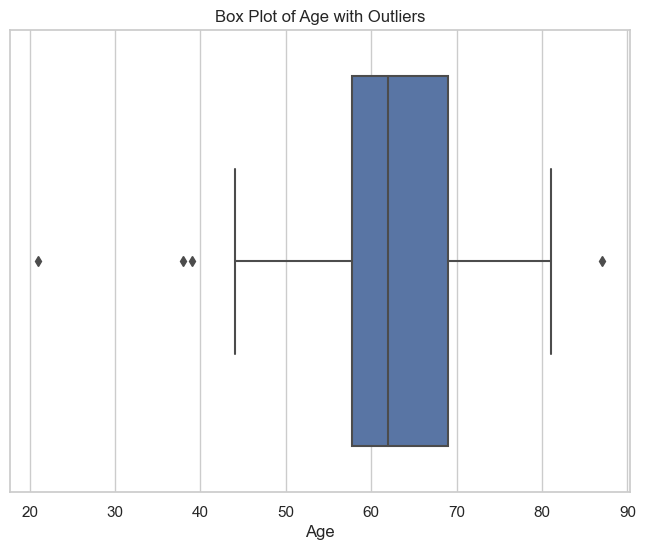

Outlier values in 'AGE' column:
0      39
22     21
238    38
277    87
Name: AGE, dtype: int32


In [28]:
# Finding outliers for Numerical column - 'AGE'

from scipy.stats import iqr

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['AGE'])
plt.xlabel('Age')
plt.title('Box Plot of Age with Outliers')
plt.show()

age_iqr = iqr(df['AGE'])

# Set lower and upper bounds for outliers
lower_bound = df['AGE'].quantile(0.25) - 1.5 * age_iqr
upper_bound = df['AGE'].quantile(0.75) + 1.5 * age_iqr

outliers = df[(df['AGE'] < lower_bound) | (df['AGE'] > upper_bound)]['AGE']
print("Outlier values in 'AGE' column:")
print(outliers)

In [29]:
# Replace outliers with values within the bounds
df.loc[df['AGE'] < lower_bound, 'AGE'] = lower_bound
df.loc[df['AGE'] > upper_bound, 'AGE'] = upper_bound
df

C:\Users\pubgp\AppData\Local\Temp\ipykernel_20924\3045856815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['AGE'] < lower_bound, 'AGE'] = lower_bound


GENDER     AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1  40.875        1               0        0              1   
1         1  44.000        0               1        0              1   
2         0  59.000        0               0        0              1   
3         1  46.000        0               1        1              0   
4         0  63.000        0               1        0              0   
..      ...     ...      ...             ...      ...            ...   
303       1  77.000        0               1        0              1   
305       1  77.000        1               1        1              0   
306       1  78.000        0               1        0              1   
307       1  79.000        1               0        0              0   
308       1  62.000        1               1        1              0   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                  0        1        1         1                  1         0   
1                  1        1        0         1                  0         0   
2                  0        1        0         1                  0         1   
3                  0        0        0         0                  0         0   
4                  0        0        0         1                  0         1   
..               ...      ...      ...       ...                ...       ...   
303                0        1        1         1                  1         1   
305                1        0        1         1                  0         0   
306                1        1        0         1                  0         0   
307                1        1        1         1                  1         1   
308                0        0        0         0                  1         0   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                      1                      0           1            1  
1                      1                      1           1            1  
2                      1                      0           1            0  
3                      0                      1           1            0  
4                      1                      0           0            0  
..                   ...                    ...         ...          ...  
303                    0                      0           0            1  
305                    0                      1           1            1  
306                    1                      1           1            1  
307                    1                      1           1            1  
308                    0                      1           1            0  

[276 rows x 16 columns]

## Skewness

In [30]:
skewness_age = skew(df['AGE'])
print("Skewness of AGE column:", skewness_age)

Skewness of AGE column: -0.061770296169842635


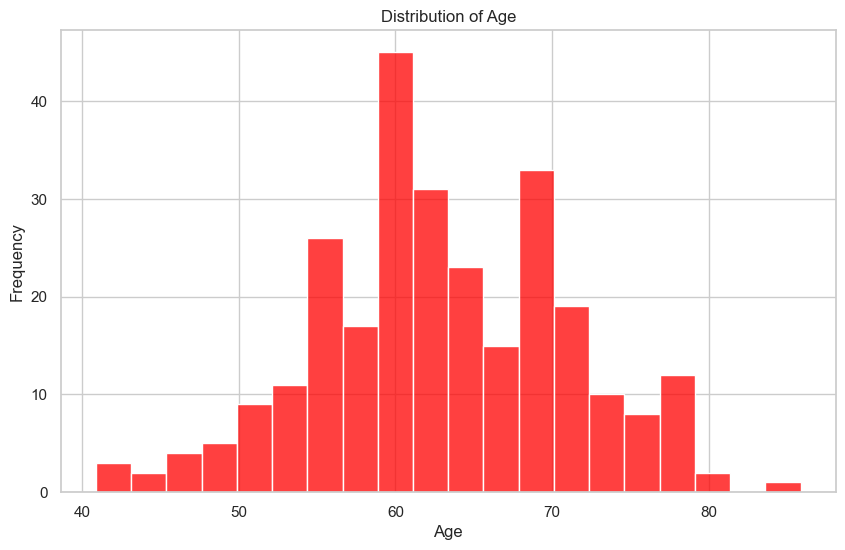

In [31]:
# Distribution of AGE

sns.set(style="whitegrid")  # Optional, for grid lines
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=False, color='red')  # You can adjust the number of bins as needed
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

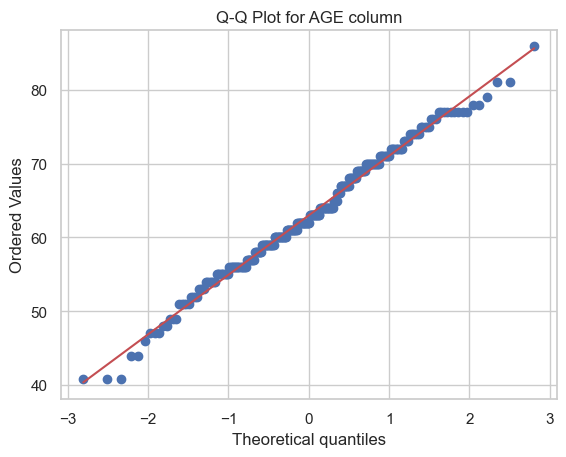

In [32]:
# Create Q-Q plot

probplot(df['AGE'], dist="norm", plot=plt)
plt.title("Q-Q Plot for AGE column")
plt.show()

## Comparing Lung cancer with which its dependent

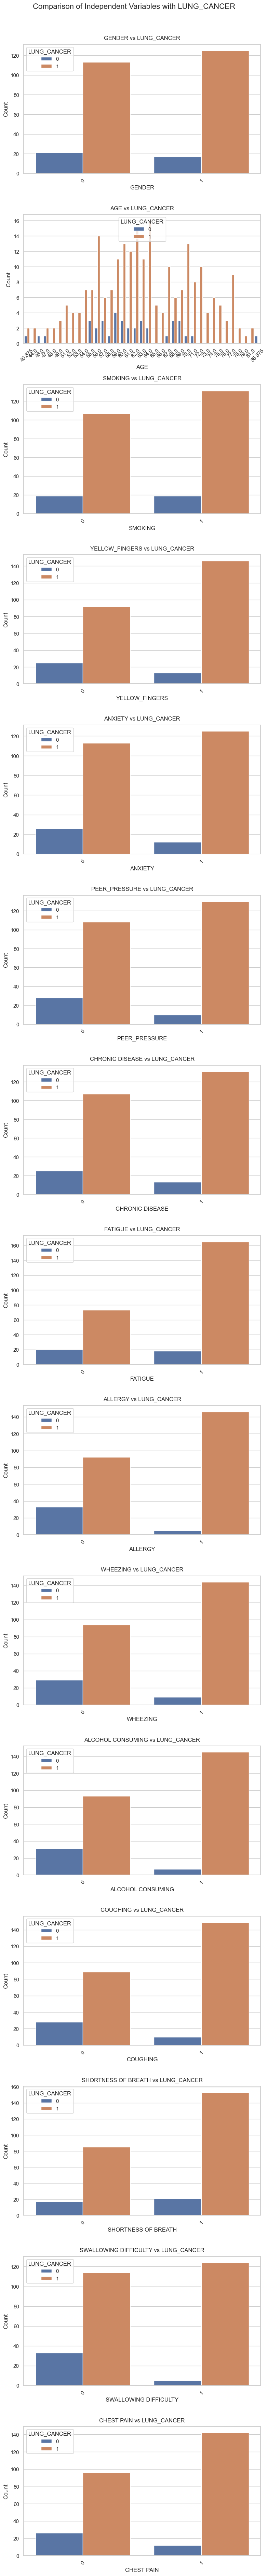

In [33]:
independent_vars = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                    'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING',
                    'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

fig, axes = plt.subplots(nrows=len(independent_vars), ncols=1, figsize=(8, 5 * len(independent_vars) + 2))
fig.tight_layout(h_pad=1.8)  # Adjust the vertical spacing between subplots

# Add space at the top for the overall figure title
plt.subplots_adjust(top=0.95)

# Loop through each independent variable and plot it against the dependent variable
for i, var in enumerate(independent_vars):
    ax = sns.countplot(x=var, hue='LUNG_CANCER', data=df, ax=axes[i])
    ax.set_title(f'{var} vs LUNG_CANCER', pad=10)  # Add padding to the title to prevent overlap
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent x-axis label overlap with the title of the next graph
plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.suptitle('Comparison of Independent Variables with LUNG_CANCER', size=16)
plt.show()

## Correlation

In [34]:
corr=df.corr()
corr

GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000 -0.023349  0.041131       -0.202506 -0.152032   
AGE                   -0.023349  1.000000 -0.068811        0.016739  0.041769   
SMOKING                0.041131 -0.068811  1.000000       -0.020799  0.153389   
YELLOW_FINGERS        -0.202506  0.016739 -0.020799        1.000000  0.558344   
ANXIETY               -0.152032  0.041769  0.153389        0.558344  1.000000   
PEER_PRESSURE         -0.261427  0.030844 -0.030364        0.313067  0.210278   
CHRONIC DISEASE       -0.189925  0.005361 -0.149415        0.015316 -0.006938   
FATIGUE               -0.079020  0.030727 -0.037803       -0.099644 -0.181474   
ALLERGY                0.150174  0.049895 -0.030179       -0.147130 -0.159451   
WHEEZING               0.135389  0.073725 -0.133938       -0.061088 -0.174162   
ALCOHOL CONSUMING      0.434264  0.043811 -0.052771       -0.273643 -0.152228   
COUGHING               0.120228  0.166621 -0.138553        0.020803 -0.218843   
SHORTNESS OF BREATH   -0.052893 -0.000864  0.051761       -0.109959 -0.155678   
SWALLOWING DIFFICULTY -0.048959 -0.007089  0.042152        0.333349  0.478820   
CHEST PAIN             0.361547 -0.045339  0.106984       -0.099169 -0.123182   
LUNG_CANCER            0.053666  0.091629  0.034878        0.189192  0.144322   

                       PEER_PRESSURE  CHRONIC DISEASE   FATIGUE   ALLERGY  \
GENDER                     -0.261427        -0.189925 -0.079020  0.150174   
AGE                         0.030844         0.005361  0.030727  0.049895   
SMOKING                    -0.030364        -0.149415 -0.037803 -0.030179   
YELLOW_FINGERS              0.313067         0.015316 -0.099644 -0.147130   
ANXIETY                     0.210278        -0.006938 -0.181474 -0.159451   
PEER_PRESSURE               1.000000         0.042893  0.094661 -0.066887   
CHRONIC DISEASE             0.042893         1.000000 -0.099411  0.134309   
FATIGUE                     0.094661        -0.099411  1.000000 -0.001841   
ALLERGY                    -0.066887         0.134309 -0.001841  1.000000   
WHEEZING                   -0.038037        -0.026648  0.147348  0.165385   
ALCOHOL CONSUMING          -0.132603         0.010144 -0.181573  0.378125   
COUGHING                   -0.068224        -0.160813  0.148538  0.206367   
SHORTNESS OF BREATH        -0.214115        -0.011760  0.407027 -0.018030   
SWALLOWING DIFFICULTY       0.327764         0.068263 -0.115727 -0.037581   
CHEST PAIN                 -0.074655        -0.048895  0.013757  0.245440   
LUNG_CANCER                 0.195086         0.143692  0.160078  0.333552   

                       WHEEZING  ALCOHOL CONSUMING  COUGHING  \
GENDER                 0.135389           0.434264  0.120228   
AGE                    0.073725           0.043811  0.166621   
SMOKING               -0.133938          -0.052771 -0.138553   
YELLOW_FINGERS        -0.061088          -0.273643  0.020803   
ANXIETY               -0.174162          -0.152228 -0.218843   
PEER_PRESSURE         -0.038037          -0.132603 -0.068224   
CHRONIC DISEASE       -0.026648           0.010144 -0.160813   
FATIGUE                0.147348          -0.181573  0.148538   
ALLERGY                0.165385           0.378125  0.206367   
WHEEZING               1.000000           0.259962  0.351938   
ALCOHOL CONSUMING      0.259962           1.000000  0.198023   
COUGHING               0.351938           0.198023  1.000000   
SHORTNESS OF BREATH    0.038412          -0.163370  0.284968   
SWALLOWING DIFFICULTY  0.109418          -0.000635 -0.136885   
CHEST PAIN             0.156035           0.310767  0.077988   
LUNG_CANCER            0.255250           0.294422  0.253027   

                       SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
GENDER                           -0.052893              -0.048959    0.361547   
AGE                              -0.000864              -0.007089   -0.045339   
SMOKI

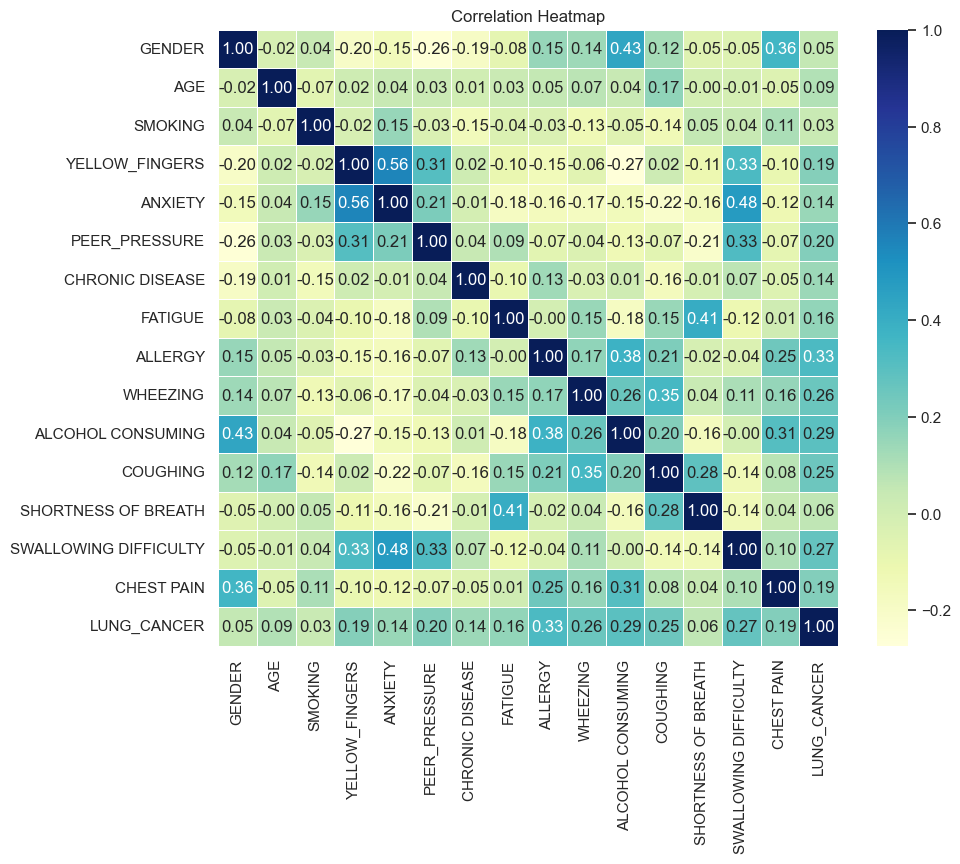

In [35]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [36]:
corr_matrix = df.corr()

# Extract correlation value for ALCOHOL CONSUMING and GENDER
alcohol_gender_corr = corr_matrix.loc['ALCOHOL CONSUMING', 'GENDER']

# Determine which gender has the highest correlation
if alcohol_gender_corr > 0:
    highest_corr_gender = 1
elif alcohol_gender_corr < 0:
    highest_corr_gender = 0
else:
    highest_corr_gender = "No correlation"

# Print the result
print(f"The GENDER with the highest correlation with ALCOHOL CONSUMING is: {highest_corr_gender}")

The GENDER with the highest correlation with ALCOHOL CONSUMING is: 1


In [37]:
corr_matrix = df.corr()

# Extract correlation value for ALCOHOL CONSUMING and GENDER
peerpressure_gender_corr = corr_matrix.loc['PEER_PRESSURE', 'GENDER']

# Determine which gender has the highest correlation
if peerpressure_gender_corr > 0:
    highest_corr_gender = 1
elif peerpressure_gender_corr < 0:
    highest_corr_gender = 0
else:
    highest_corr_gender = "No correlation"

# Print the result
print(f"The GENDER with the highest correlation with PEER_PRESSURE is: {highest_corr_gender}")

The GENDER with the highest correlation with PEER_PRESSURE is: 0


## DRT

In [38]:
input_cols = df.columns[:-1]
target_col =  df.columns[-1]

In [39]:
inputs_df = df[list(input_cols)].copy()
inputs_df.sample(5)

GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
83        0  81.0        0               0        0              1   
268       0  55.0        1               1        1              1   
263       0  71.0        0               1        0              0   
166       0  61.0        0               1        0              1   
88        0  62.0        1               1        1              0   

     CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
83                 1        0        1         0                  1         1   
268                1        1        0         1                  0         1   
263                1        1        1         1                  0         1   
166                0        1        0         0                  0         1   
88                 1        0        1         0                  1         0   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
83                     1                      0           0  
268                    1                      1           0  
263                    1                      0           0  
166                    1                      0           1  
88                     0                      0           0

In [40]:
scaler = MinMaxScaler()
scaler.fit(inputs_df[input_cols])
inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
inputs_df[input_cols].head()

GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0     1.0  0.000000      1.0             0.0      0.0            1.0   
1     1.0  0.069444      0.0             1.0      0.0            1.0   
2     0.0  0.402778      0.0             0.0      0.0            1.0   
3     1.0  0.113889      0.0             1.0      1.0            0.0   
4     0.0  0.491667      0.0             1.0      0.0            0.0   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0              0.0      1.0      1.0       1.0                1.0       0.0   
1              1.0      1.0      0.0       1.0                0.0       0.0   
2              0.0      1.0      0.0       1.0                0.0       1.0   
3              0.0      0.0      0.0       0.0                0.0       0.0   
4              0.0      0.0      0.0       1.0                0.0       1.0   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0                  1.0                    0.0         1.0  
1                  1.0                    1.0         1.0  
2                  1.0                    0.0         1.0  
3                  0.0                    1.0         1.0  
4                  1.0                    0.0         0.0

In [41]:
pca = PCA(n_components=13).fit(inputs_df[input_cols])

explained_variance = pca.explained_variance_ratio_

print(np.cumsum(explained_variance)[-1])

0.9703048789212381


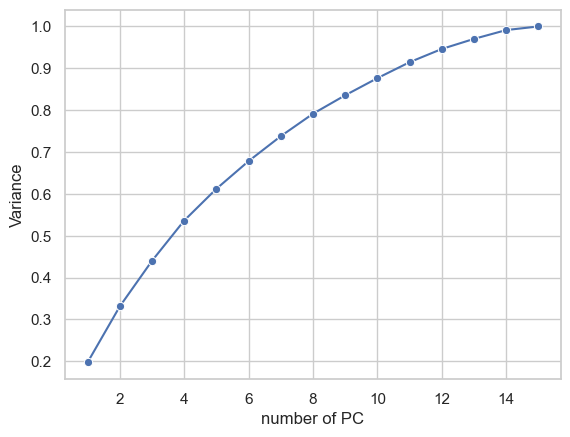

In [42]:

pca = PCA().fit(inputs_df[input_cols])

explained_variance = np.cumsum(pca.explained_variance_ratio_)

components_range = range(1, len(explained_variance) + 1)

sns.lineplot(x=components_range, y=explained_variance, marker='o')
plt.ylabel("Variance")
plt.xlabel("number of PC")
plt.show()

In [43]:
import numpy as np


cumulative_variance = np.cumsum(explained_variance)


n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1  
pca_95 = PCA(n_components=n_components_95)
inputs_pca_95 = pca_95.fit_transform(inputs_df[input_cols])

pca_df_95 = pd.DataFrame(inputs_pca_95, columns=[f'PC{i+1}' for i in range(n_components_95)])
pca_df_95['target'] = df[target_col]

In [44]:
n_components_95

3

In [66]:
# Specify the relevant categories
categories = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
              'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
              'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

# Create a new DataFrame with only the specified columns
lung_cancer_yes = df[df['LUNG_CANCER'] == 1][categories + ['LUNG_CANCER']]

# Filter individuals with a maximum of 3 'YES' in the specified categories
max_yes_threshold = 3
filtered_data = lung_cancer_yes[(lung_cancer_yes == 1).sum(axis=1) <= max_yes_threshold]

# Display the result
print("Columns with a maximum of", max_yes_threshold, "'YES' for individuals with 'YES' in Lung Cancer:")
print(filtered_data)

# Print the 'LUNG_CANCER' column with respect to the filtered columns
lung_cancer_column = filtered_data['LUNG_CANCER']
print("\nLUNG_CANCER column with respect to those columns:")
print(lung_cancer_column)

Columns with a maximum of 3 'YES' for individuals with 'YES' in Lung Cancer:
     SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
38         1               0        0              0                0   
190        0               0        0              0                1   
193        0               0        0              1                1   

     FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
38         1        0         0                  0         0   
190        1        0         0                  0         0   
193        0        0         0                  0         0   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
38                     0                      0           0            1  
190                    0                      0           0            1  
193                    0                      0           0            1  

LUNG_CANCER column with respect to those columns:
38     1
190    1
193 

In [1]:
df.to_csv('LungCancerpreprocessed.csv',index=False)

NameError: name 'df' is not defined